In [14]:
# Pandas: serie & dataframes
'''
Series one-dimensional labelled array.
It is essentially a column in a table and an associated index that is used to access the data.

Dataframe two-dimensional labelled array

'''


'\nSeries one-dimensional labelled array.\nIt is essentially a column in a table and an associated index that is used to access the data.\n\nDataframe two-dimensional labelled array\n\n'

In [15]:
%pip install scikit-learn
%pip install nbformat==4.3.0
%pip install plotly

%pip install --upgrade nbformat
%pip install seaborn
%pip install plotly

%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.
  Using cached nbformat-4.3.0-py2.py3-none-any.whl.metadata (1.1 kB)
Using cached nbformat-4.3.0-py2.py3-none-any.whl (154 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.10.4
    Uninstalling nbformat-5.10.4:
      Successfully uninstalled nbformat-5.10.4
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 4.3.0
    Uninstalling nbformat-4.3.0:
      Successfully uninstalled nbformat-4.3.0
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the 

In [16]:
# Best Practices for Data Preprocessing
# 1. Handling Missing Values
# 2. Encoding Categorical Data  
# 3. Scaling Numerical Data

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")


Libraries imported successfully!


In [17]:
# Create sample dataset with missing values and mixed data types
np.random.seed(42)

data = {
    'age': [25, 30, np.nan, 35, 28, np.nan, 45, 32],
    'salary': [50000, 60000, 70000, np.nan, 55000, 80000, np.nan, 65000],
    'department': ['IT', 'HR', 'IT', 'Finance', np.nan, 'IT', 'HR', 'Finance'],
    'experience': ['Junior', 'Senior', 'Mid', 'Senior', 'Junior', np.nan, 'Senior', 'Mid'],
    'performance': ['Good', 'Excellent', 'Good', np.nan, 'Average', 'Excellent', 'Good', 'Average']
}

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)
print(f"\nDataset shape: {df.shape}")
print(f"\nMissing values per column:")
print(df.isnull().sum())


Original Dataset:
    age   salary department experience performance
0  25.0  50000.0         IT     Junior        Good
1  30.0  60000.0         HR     Senior   Excellent
2   NaN  70000.0         IT        Mid        Good
3  35.0      NaN    Finance     Senior         NaN
4  28.0  55000.0        NaN     Junior     Average
5   NaN  80000.0         IT        NaN   Excellent
6  45.0      NaN         HR     Senior        Good
7  32.0  65000.0    Finance        Mid     Average

Dataset shape: (8, 5)

Missing values per column:
age            2
salary         2
department     1
experience     1
performance    1
dtype: int64


In [18]:
# 1. HANDLING MISSING VALUES - Best Practices

print("=" * 60)
print("1. HANDLING MISSING VALUES")
print("=" * 60)

# Method 1: Drop rows/columns with missing values
print("\n1.1 Drop missing values:")
print("Drop rows with any missing values:")
df_drop_rows = df.dropna()
print(f"Original shape: {df.shape}, After dropping: {df_drop_rows.shape}")

print("\nDrop columns with missing values:")
df_drop_cols = df.dropna(axis=1)
print(f"Original shape: {df.shape}, After dropping: {df_drop_cols.shape}")

# Method 2: Fill with statistical measures
print("\n1.2 Fill with statistical measures:")
df_filled = df.copy()

# For numerical columns: use mean, median, or mode
df_filled['age'].fillna(df_filled['age'].median(), inplace=True)
df_filled['salary'].fillna(df_filled['salary'].mean(), inplace=True)

# For categorical columns: use mode (most frequent)
df_filled['department'].fillna(df_filled['department'].mode()[0], inplace=True)
df_filled['experience'].fillna(df_filled['experience'].mode()[0], inplace=True)
df_filled['performance'].fillna(df_filled['performance'].mode()[0], inplace=True)

print("After filling missing values:")
print(df_filled)
print(f"\nMissing values after filling: {df_filled.isnull().sum().sum()}")


1. HANDLING MISSING VALUES

1.1 Drop missing values:
Drop rows with any missing values:
Original shape: (8, 5), After dropping: (3, 5)

Drop columns with missing values:
Original shape: (8, 5), After dropping: (8, 0)

1.2 Fill with statistical measures:
After filling missing values:
    age        salary department experience performance
0  25.0  50000.000000         IT     Junior        Good
1  30.0  60000.000000         HR     Senior   Excellent
2  31.0  70000.000000         IT        Mid        Good
3  35.0  63333.333333    Finance     Senior        Good
4  28.0  55000.000000         IT     Junior     Average
5  31.0  80000.000000         IT     Senior   Excellent
6  45.0  63333.333333         HR     Senior        Good
7  32.0  65000.000000    Finance        Mid     Average

Missing values after filling: 0


In [19]:
# Method 3: Advanced imputation using sklearn
print("\n1.3 Advanced imputation using sklearn:")

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Impute numerical columns with median
numerical_imputer = SimpleImputer(strategy='median')
df_advanced = df.copy()
df_advanced[numerical_cols] = numerical_imputer.fit_transform(df_advanced[numerical_cols])

# Impute categorical columns with most frequent
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_advanced[categorical_cols] = categorical_imputer.fit_transform(df_advanced[categorical_cols])

print("\nAfter advanced imputation:")
print(df_advanced)
print(f"\nMissing values after advanced imputation: {df_advanced.isnull().sum().sum()}")

# Method 4: Forward/Backward fill for time series data
print("\n1.4 Forward/Backward fill (for time series):")
df_ffill = df.copy()
df_ffill = df_ffill.fillna(method='ffill')  # Forward fill
print("After forward fill:")
print(df_ffill)



1.3 Advanced imputation using sklearn:
Numerical columns: ['age', 'salary']
Categorical columns: ['department', 'experience', 'performance']

After advanced imputation:
    age   salary department experience performance
0  25.0  50000.0         IT     Junior        Good
1  30.0  60000.0         HR     Senior   Excellent
2  31.0  70000.0         IT        Mid        Good
3  35.0  62500.0    Finance     Senior        Good
4  28.0  55000.0         IT     Junior     Average
5  31.0  80000.0         IT     Senior   Excellent
6  45.0  62500.0         HR     Senior        Good
7  32.0  65000.0    Finance        Mid     Average

Missing values after advanced imputation: 0

1.4 Forward/Backward fill (for time series):
After forward fill:
    age   salary department experience performance
0  25.0  50000.0         IT     Junior        Good
1  30.0  60000.0         HR     Senior   Excellent
2  30.0  70000.0         IT        Mid        Good
3  35.0  70000.0    Finance     Senior        Good
4  28

In [20]:
# 2. ENCODING CATEGORICAL DATA - Best Practices

print("\n" + "=" * 60)
print("2. ENCODING CATEGORICAL DATA")
print("=" * 60)

# Use the cleaned dataset
df_clean = df_advanced.copy()
print("Dataset for encoding:")
print(df_clean)

# Method 1: Label Encoding (for ordinal data)
print("\n2.1 Label Encoding (for ordinal data):")
print("Best for: Ordinal categorical data with inherent order")

# Example: experience level has order (Junior < Mid < Senior)
le = LabelEncoder()
df_clean['experience_encoded'] = le.fit_transform(df_clean['experience'])
print(f"Experience mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")
print("After label encoding:")
print(df_clean[['experience', 'experience_encoded']].head())



2. ENCODING CATEGORICAL DATA
Dataset for encoding:
    age   salary department experience performance
0  25.0  50000.0         IT     Junior        Good
1  30.0  60000.0         HR     Senior   Excellent
2  31.0  70000.0         IT        Mid        Good
3  35.0  62500.0    Finance     Senior        Good
4  28.0  55000.0         IT     Junior     Average
5  31.0  80000.0         IT     Senior   Excellent
6  45.0  62500.0         HR     Senior        Good
7  32.0  65000.0    Finance        Mid     Average

2.1 Label Encoding (for ordinal data):
Best for: Ordinal categorical data with inherent order
Experience mapping: {'Junior': np.int64(0), 'Mid': np.int64(1), 'Senior': np.int64(2)}
After label encoding:
  experience  experience_encoded
0     Junior                   0
1     Senior                   2
2        Mid                   1
3     Senior                   2
4     Junior                   0


In [21]:
# Method 2: One-Hot Encoding (for nominal data)
print("\n2.2 One-Hot Encoding (for nominal data):")
print("Best for: Nominal categorical data without inherent order")

# Example: department has no order (IT ≠ HR ≠ Finance)
print("Before one-hot encoding:")
print(df_clean['department'].value_counts())

# Using pandas get_dummies (simpler)
df_onehot = pd.get_dummies(df_clean['department'], prefix='dept')
print("\nAfter one-hot encoding with pandas:")
print(df_onehot.head())

# Using sklearn OneHotEncoder (more control)
print("\nUsing sklearn OneHotEncoder:")
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity
dept_encoded = ohe.fit_transform(df_clean[['department']])
dept_encoded_df = pd.DataFrame(dept_encoded, columns=ohe.get_feature_names_out(['department']))
print(dept_encoded_df.head())

# Method 3: Target Encoding (for high cardinality)
print("\n2.3 Target Encoding (for high cardinality categorical variables):")
print("Best for: Categorical variables with many unique values")

# Example: if we had a target variable
# This would replace categories with the mean of the target variable
print("Note: Target encoding requires a target variable and is used in supervised learning")



2.2 One-Hot Encoding (for nominal data):
Best for: Nominal categorical data without inherent order
Before one-hot encoding:
department
IT         4
HR         2
Finance    2
Name: count, dtype: int64

After one-hot encoding with pandas:
   dept_Finance  dept_HR  dept_IT
0         False    False     True
1         False     True    False
2         False    False     True
3          True    False    False
4         False    False     True

Using sklearn OneHotEncoder:
   department_HR  department_IT
0            0.0            1.0
1            1.0            0.0
2            0.0            1.0
3            0.0            0.0
4            0.0            1.0

2.3 Target Encoding (for high cardinality categorical variables):
Best for: Categorical variables with many unique values
Note: Target encoding requires a target variable and is used in supervised learning


In [22]:
# 3. SCALING NUMERICAL DATA - Best Practices

print("\n" + "=" * 60)
print("3. SCALING NUMERICAL DATA")
print("=" * 60)

# Prepare numerical data for scaling
numerical_data = df_clean[['age', 'salary']].copy()
print("Original numerical data:")
print(numerical_data.describe())

# Method 1: Standard Scaling (Z-score normalization)
print("\n3.1 Standard Scaling (Z-score normalization):")
print("Best for: Data with normal distribution")
print("Formula: (x - mean) / std")
print("Result: Mean = 0, Std = 1")

scaler_standard = StandardScaler()
data_standard = scaler_standard.fit_transform(numerical_data)
df_standard = pd.DataFrame(data_standard, columns=['age_scaled', 'salary_scaled'])
print("After standard scaling:")
print(df_standard.describe())

# Method 2: Min-Max Scaling (Normalization)
print("\n3.2 Min-Max Scaling (Normalization):")
print("Best for: Data with known bounds")
print("Formula: (x - min) / (max - min)")
print("Result: Range [0, 1]")

scaler_minmax = MinMaxScaler()
data_minmax = scaler_minmax.fit_transform(numerical_data)
df_minmax = pd.DataFrame(data_minmax, columns=['age_minmax', 'salary_minmax'])
print("After min-max scaling:")
print(df_minmax.describe())



3. SCALING NUMERICAL DATA
Original numerical data:
             age       salary
count   8.000000      8.00000
mean   32.125000  63125.00000
std     5.962682   9136.85629
min    25.000000  50000.00000
25%    29.500000  58750.00000
50%    31.000000  62500.00000
75%    32.750000  66250.00000
max    45.000000  80000.00000

3.1 Standard Scaling (Z-score normalization):
Best for: Data with normal distribution
Formula: (x - mean) / std
Result: Mean = 0, Std = 1
After standard scaling:
         age_scaled  salary_scaled
count  8.000000e+00   8.000000e+00
mean   2.775558e-17  -2.775558e-17
std    1.069045e+00   1.069045e+00
min   -1.277436e+00  -1.535672e+00
25%   -4.706344e-01  -5.118907e-01
50%   -2.017005e-01  -7.312724e-02
75%    1.120558e-01   3.656362e-01
max    2.308350e+00   1.974436e+00

3.2 Min-Max Scaling (Normalization):
Best for: Data with known bounds
Formula: (x - min) / (max - min)
Result: Range [0, 1]
After min-max scaling:
       age_minmax  salary_minmax
count    8.000000  

In [23]:
# Method 3: Robust Scaling (for data with outliers)
print("\n3.3 Robust Scaling (for data with outliers):")
print("Best for: Data with outliers")
print("Formula: (x - median) / IQR")
print("Uses median and IQR instead of mean and std")

from sklearn.preprocessing import RobustScaler

scaler_robust = RobustScaler()
data_robust = scaler_robust.fit_transform(numerical_data)
df_robust = pd.DataFrame(data_robust, columns=['age_robust', 'salary_robust'])
print("After robust scaling:")
print(df_robust.describe())

# Method 4: Manual scaling comparison
print("\n3.4 Comparison of scaling methods:")
comparison_df = pd.DataFrame({
    'Original_Age': numerical_data['age'],
    'Standard_Age': df_standard['age_scaled'],
    'MinMax_Age': df_minmax['age_minmax'],
    'Robust_Age': df_robust['age_robust']
})
print("Age scaling comparison:")
print(comparison_df.head())



3.3 Robust Scaling (for data with outliers):
Best for: Data with outliers
Formula: (x - median) / IQR
Uses median and IQR instead of mean and std
After robust scaling:
       age_robust  salary_robust
count    8.000000       8.000000
mean     0.346154       0.083333
std      1.834671       1.218248
min     -1.846154      -1.666667
25%     -0.461538      -0.500000
50%      0.000000       0.000000
75%      0.538462       0.500000
max      4.307692       2.333333

3.4 Comparison of scaling methods:
Age scaling comparison:
   Original_Age  Standard_Age  MinMax_Age  Robust_Age
0          25.0     -1.277436        0.00   -1.846154
1          30.0     -0.380990        0.25   -0.307692
2          31.0     -0.201700        0.30    0.000000
3          35.0      0.515457        0.50    1.230769
4          28.0     -0.739568        0.15   -0.923077


In [24]:
# 4. COMPLETE PREPROCESSING PIPELINE

print("\n" + "=" * 60)
print("4. COMPLETE PREPROCESSING PIPELINE")
print("=" * 60)

def preprocess_data(df):
    """
    Complete preprocessing pipeline
    """
    df_processed = df.copy()
    
    # Step 1: Handle missing values
    print("Step 1: Handling missing values...")
    
    # Separate numerical and categorical columns
    numerical_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
    
    # Fill numerical columns with median
    for col in numerical_cols:
        df_processed[col].fillna(df_processed[col].median(), inplace=True)
    
    # Fill categorical columns with mode
    for col in categorical_cols:
        df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
    
    print(f"Missing values after filling: {df_processed.isnull().sum().sum()}")
    
    # Step 2: Encode categorical variables
    print("\nStep 2: Encoding categorical variables...")
    
    # Label encode ordinal variables (if any)
    ordinal_cols = ['experience', 'performance']  # Define ordinal columns
    for col in ordinal_cols:
        if col in df_processed.columns:
            le = LabelEncoder()
            df_processed[f'{col}_encoded'] = le.fit_transform(df_processed[col])
            print(f"Label encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    
    # One-hot encode nominal variables
    nominal_cols = ['department']  # Define nominal columns
    for col in nominal_cols:
        if col in df_processed.columns:
            dummies = pd.get_dummies(df_processed[col], prefix=col)
            df_processed = pd.concat([df_processed, dummies], axis=1)
            print(f"One-hot encoded {col}: {list(dummies.columns)}")
    
    # Step 3: Scale numerical variables
    print("\nStep 3: Scaling numerical variables...")
    
    if numerical_cols:
        scaler = StandardScaler()
        df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])
        print(f"Scaled columns: {numerical_cols}")
    
    return df_processed

# Apply the preprocessing pipeline
print("Applying complete preprocessing pipeline...")
df_final = preprocess_data(df)
print(f"\nFinal dataset shape: {df_final.shape}")
print("\nFinal dataset:")
print(df_final.head())



4. COMPLETE PREPROCESSING PIPELINE
Applying complete preprocessing pipeline...
Step 1: Handling missing values...
Missing values after filling: 0

Step 2: Encoding categorical variables...
Label encoded experience: {'Junior': np.int64(0), 'Mid': np.int64(1), 'Senior': np.int64(2)}
Label encoded performance: {'Average': np.int64(0), 'Excellent': np.int64(1), 'Good': np.int64(2)}
One-hot encoded department: ['department_Finance', 'department_HR', 'department_IT']

Step 3: Scaling numerical variables...
Scaled columns: ['age', 'salary']

Final dataset shape: (8, 10)

Final dataset:
        age    salary department experience performance  experience_encoded  \
0 -1.277436 -1.535672         IT     Junior        Good                   0   
1 -0.380990 -0.365636         HR     Senior   Excellent                   2   
2 -0.201700  0.804400         IT        Mid        Good                   1   
3  0.515457 -0.073127    Finance     Senior        Good                   2   
4 -0.739568 -0.950

In [25]:
# 5. BEST PRACTICES SUMMARY

print("\n" + "=" * 60)
print("5. BEST PRACTICES SUMMARY")
print("=" * 60)

print("""
HANDLING MISSING VALUES:
✅ Use median for numerical data with outliers
✅ Use mean for numerical data without outliers  
✅ Use mode for categorical data
✅ Consider domain knowledge for imputation
✅ Use advanced methods (KNN, iterative imputation) for complex cases
❌ Avoid dropping too much data
❌ Don't ignore missing patterns

ENCODING CATEGORICAL DATA:
✅ Label Encoding: For ordinal data (e.g., Low < Medium < High)
✅ One-Hot Encoding: For nominal data (e.g., Red, Blue, Green)
✅ Target Encoding: For high cardinality categorical variables
✅ Use drop='first' in OneHotEncoder to avoid multicollinearity
❌ Don't use Label Encoding for nominal data
❌ Avoid One-Hot Encoding for high cardinality variables

SCALING NUMERICAL DATA:
✅ Standard Scaling: For normally distributed data
✅ Min-Max Scaling: For data with known bounds
✅ Robust Scaling: For data with outliers
✅ Scale after train-test split to avoid data leakage
❌ Don't scale binary variables
❌ Don't scale target variable in regression

GENERAL BEST PRACTICES:
✅ Always split data before preprocessing
✅ Fit transformers on training data only
✅ Apply same transformations to test data
✅ Document your preprocessing steps
✅ Validate your preprocessing pipeline
❌ Don't preprocess the entire dataset at once
❌ Don't forget to handle new categories in test data
""")

print("🎯 Remember: The best preprocessing method depends on your data and use case!")
print("🔍 Always explore your data first to understand its characteristics!")



5. BEST PRACTICES SUMMARY

HANDLING MISSING VALUES:
✅ Use median for numerical data with outliers
✅ Use mean for numerical data without outliers  
✅ Use mode for categorical data
✅ Consider domain knowledge for imputation
✅ Use advanced methods (KNN, iterative imputation) for complex cases
❌ Avoid dropping too much data
❌ Don't ignore missing patterns

ENCODING CATEGORICAL DATA:
✅ Label Encoding: For ordinal data (e.g., Low < Medium < High)
✅ One-Hot Encoding: For nominal data (e.g., Red, Blue, Green)
✅ Target Encoding: For high cardinality categorical variables
✅ Use drop='first' in OneHotEncoder to avoid multicollinearity
❌ Don't use Label Encoding for nominal data
❌ Avoid One-Hot Encoding for high cardinality variables

SCALING NUMERICAL DATA:
✅ Standard Scaling: For normally distributed data
✅ Min-Max Scaling: For data with known bounds
✅ Robust Scaling: For data with outliers
✅ Scale after train-test split to avoid data leakage
❌ Don't scale binary variables
❌ Don't scale target 

In [26]:
# 6. UNDERSTANDING THE INPLACE OPTION

print("=" * 60)
print("6. UNDERSTANDING THE INPLACE OPTION")
print("=" * 60)

# Create sample data
import pandas as pd
import numpy as np

data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [10, 20, 30, np.nan, 50],
    'C': ['X', 'Y', 'Z', 'X', 'Y']
}

df_original = pd.DataFrame(data)
print("Original DataFrame:")
print(df_original)
print(f"Original DataFrame ID: {id(df_original)}")


6. UNDERSTANDING THE INPLACE OPTION
Original DataFrame:
     A     B  C
0  1.0  10.0  X
1  2.0  20.0  Y
2  NaN  30.0  Z
3  4.0   NaN  X
4  5.0  50.0  Y
Original DataFrame ID: 5051642832


In [27]:
# INPLACE = FALSE (Default behavior)
print("\n6.1 INPLACE = FALSE (Default behavior):")
print("=" * 40)

# Create a copy for demonstration
df_copy1 = df_original.copy()
print("Before operation:")
print(f"DataFrame ID: {id(df_copy1)}")
print(df_copy1)

# Fill missing values with inplace=False (default)
result = df_copy1['A'].fillna(0, inplace=False)
print(f"\nAfter fillna(inplace=False):")
print(f"Original DataFrame ID: {id(df_copy1)}")
print(f"Result ID: {id(result)}")
print("Original DataFrame (unchanged):")
print(df_copy1)
print("Returned result:")
print(result)

print(f"\nAre they the same object? {df_copy1 is result}")
print(f"Are they equal? {df_copy1['A'].equals(result)}")



6.1 INPLACE = FALSE (Default behavior):
Before operation:
DataFrame ID: 5051645472
     A     B  C
0  1.0  10.0  X
1  2.0  20.0  Y
2  NaN  30.0  Z
3  4.0   NaN  X
4  5.0  50.0  Y

After fillna(inplace=False):
Original DataFrame ID: 5051645472
Result ID: 5052011360
Original DataFrame (unchanged):
     A     B  C
0  1.0  10.0  X
1  2.0  20.0  Y
2  NaN  30.0  Z
3  4.0   NaN  X
4  5.0  50.0  Y
Returned result:
0    1.0
1    2.0
2    0.0
3    4.0
4    5.0
Name: A, dtype: float64

Are they the same object? False
Are they equal? False


In [28]:
# INPLACE = TRUE
print("\n6.2 INPLACE = TRUE:")
print("=" * 40)

# Create another copy for demonstration
df_copy2 = df_original.copy()
print("Before operation:")
print(f"DataFrame ID: {id(df_copy2)}")
print(df_copy2)

# Fill missing values with inplace=True
result = df_copy2['A'].fillna(0, inplace=True)
print(f"\nAfter fillna(inplace=True):")
print(f"DataFrame ID: {id(df_copy2)}")
print(f"Result: {result}")  # inplace=True returns None
print("DataFrame (modified in place):")
print(df_copy2)

print(f"\nResult is None: {result is None}")
print("The original DataFrame was modified directly!")



6.2 INPLACE = TRUE:
Before operation:
DataFrame ID: 5051640672
     A     B  C
0  1.0  10.0  X
1  2.0  20.0  Y
2  NaN  30.0  Z
3  4.0   NaN  X
4  5.0  50.0  Y

After fillna(inplace=True):
DataFrame ID: 5051640672
Result: None
DataFrame (modified in place):
     A     B  C
0  1.0  10.0  X
1  2.0  20.0  Y
2  0.0  30.0  Z
3  4.0   NaN  X
4  5.0  50.0  Y

Result is None: True
The original DataFrame was modified directly!


In [29]:
# COMMON OPERATIONS WITH INPLACE
print("\n6.3 COMMON OPERATIONS WITH INPLACE:")
print("=" * 40)

# Create a fresh DataFrame
df_demo = df_original.copy()
print("Original DataFrame:")
print(df_demo)

print("\n--- DROPPING ROWS ---")
# Drop rows with inplace=False
df_drop_false = df_demo.copy()
result_drop = df_drop_false.dropna(inplace=False)
print("After dropna(inplace=False):")
print("Original (unchanged):")
print(df_drop_false)
print("Result (new DataFrame):")
print(result_drop)

# Drop rows with inplace=True
df_drop_true = df_demo.copy()
result_drop = df_drop_true.dropna(inplace=True)
print(f"\nAfter dropna(inplace=True):")
print(f"Result: {result_drop}")  # Returns None
print("Original (modified):")
print(df_drop_true)



6.3 COMMON OPERATIONS WITH INPLACE:
Original DataFrame:
     A     B  C
0  1.0  10.0  X
1  2.0  20.0  Y
2  NaN  30.0  Z
3  4.0   NaN  X
4  5.0  50.0  Y

--- DROPPING ROWS ---
After dropna(inplace=False):
Original (unchanged):
     A     B  C
0  1.0  10.0  X
1  2.0  20.0  Y
2  NaN  30.0  Z
3  4.0   NaN  X
4  5.0  50.0  Y
Result (new DataFrame):
     A     B  C
0  1.0  10.0  X
1  2.0  20.0  Y
4  5.0  50.0  Y

After dropna(inplace=True):
Result: None
Original (modified):
     A     B  C
0  1.0  10.0  X
1  2.0  20.0  Y
4  5.0  50.0  Y


In [30]:
# MORE EXAMPLES WITH DIFFERENT OPERATIONS
print("\n--- RENAMING COLUMNS ---")
df_rename = df_original.copy()
print("Before renaming:")
print(df_rename.columns.tolist())

# Rename with inplace=False
result_rename = df_rename.rename(columns={'A': 'Column_A'}, inplace=False)
print(f"\nAfter rename(inplace=False):")
print("Original columns:", df_rename.columns.tolist())
print("Result columns:", result_rename.columns.tolist())

# Rename with inplace=True
df_rename2 = df_original.copy()
result_rename2 = df_rename2.rename(columns={'A': 'Column_A'}, inplace=True)
print(f"\nAfter rename(inplace=True):")
print(f"Result: {result_rename2}")  # Returns None
print("Original columns (modified):", df_rename2.columns.tolist())

print("\n--- SORTING VALUES ---")
df_sort = df_original.copy()
print("Before sorting:")
print(df_sort)

# Sort with inplace=False
result_sort = df_sort.sort_values('A', inplace=False)
print(f"\nAfter sort_values(inplace=False):")
print("Original (unchanged):")
print(df_sort)
print("Result (new DataFrame):")
print(result_sort)

# Sort with inplace=True
df_sort2 = df_original.copy()
result_sort2 = df_sort2.sort_values('A', inplace=True)
print(f"\nAfter sort_values(inplace=True):")
print(f"Result: {result_sort2}")  # Returns None
print("Original (modified):")
print(df_sort2)



--- RENAMING COLUMNS ---
Before renaming:
['A', 'B', 'C']

After rename(inplace=False):
Original columns: ['A', 'B', 'C']
Result columns: ['Column_A', 'B', 'C']

After rename(inplace=True):
Result: None
Original columns (modified): ['Column_A', 'B', 'C']

--- SORTING VALUES ---
Before sorting:
     A     B  C
0  1.0  10.0  X
1  2.0  20.0  Y
2  NaN  30.0  Z
3  4.0   NaN  X
4  5.0  50.0  Y

After sort_values(inplace=False):
Original (unchanged):
     A     B  C
0  1.0  10.0  X
1  2.0  20.0  Y
2  NaN  30.0  Z
3  4.0   NaN  X
4  5.0  50.0  Y
Result (new DataFrame):
     A     B  C
0  1.0  10.0  X
1  2.0  20.0  Y
3  4.0   NaN  X
4  5.0  50.0  Y
2  NaN  30.0  Z

After sort_values(inplace=True):
Result: None
Original (modified):
     A     B  C
0  1.0  10.0  X
1  2.0  20.0  Y
3  4.0   NaN  X
4  5.0  50.0  Y
2  NaN  30.0  Z


In [31]:
# MEMORY AND PERFORMANCE IMPLICATIONS
print("\n6.4 MEMORY AND PERFORMANCE IMPLICATIONS:")
print("=" * 40)

import sys

# Create a larger DataFrame for memory comparison
large_df = pd.DataFrame({
    'A': range(10000),
    'B': range(10000, 20000),
    'C': ['X'] * 10000
})

print(f"Large DataFrame memory usage: {large_df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Method 1: inplace=False (creates new DataFrame)
print("\n--- Method 1: inplace=False ---")
df_method1 = large_df.copy()
result1 = df_method1.dropna(inplace=False)
print(f"Original DataFrame memory: {df_method1.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"Result DataFrame memory: {result1.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"Total memory used: {(df_method1.memory_usage(deep=True).sum() + result1.memory_usage(deep=True).sum()) / 1024:.2f} KB")

# Method 2: inplace=True (modifies existing DataFrame)
print("\n--- Method 2: inplace=True ---")
df_method2 = large_df.copy()
result2 = df_method2.dropna(inplace=True)
print(f"DataFrame memory after operation: {df_method2.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"Result: {result2}")  # None
print("Memory efficient - no new DataFrame created!")

# Performance comparison
import time

print("\n--- Performance Comparison ---")
# Test with inplace=False
start_time = time.time()
for _ in range(100):
    df_test = large_df.copy()
    result = df_test.dropna(inplace=False)
time_false = time.time() - start_time

# Test with inplace=True
start_time = time.time()
for _ in range(100):
    df_test = large_df.copy()
    result = df_test.dropna(inplace=True)
time_true = time.time() - start_time

print(f"Time with inplace=False: {time_false:.4f} seconds")
print(f"Time with inplace=True: {time_true:.4f} seconds")
print(f"Performance difference: {((time_false - time_true) / time_false * 100):.1f}% faster with inplace=True")



6.4 MEMORY AND PERFORMANCE IMPLICATIONS:
Large DataFrame memory usage: 722.78 KB

--- Method 1: inplace=False ---
Original DataFrame memory: 722.78 KB
Result DataFrame memory: 722.78 KB
Total memory used: 1445.56 KB

--- Method 2: inplace=True ---
DataFrame memory after operation: 722.78 KB
Result: None
Memory efficient - no new DataFrame created!

--- Performance Comparison ---
Time with inplace=False: 0.0540 seconds
Time with inplace=True: 0.0668 seconds
Performance difference: -23.5% faster with inplace=True


In [32]:
# BEST PRACTICES AND WHEN TO USE INPLACE
print("\n6.5 BEST PRACTICES AND WHEN TO USE INPLACE:")
print("=" * 40)

print("""
WHEN TO USE INPLACE=TRUE:
✅ When you want to modify the original DataFrame
✅ For memory efficiency with large datasets
✅ When you don't need the original data anymore
✅ In data cleaning pipelines where you're transforming data step by step
✅ When working with very large datasets where memory is a concern

WHEN TO USE INPLACE=FALSE (Default):
✅ When you want to keep the original DataFrame unchanged
✅ For exploratory data analysis
✅ When you need to compare before/after results
✅ In functional programming style
✅ When you're unsure about the operation
✅ For debugging and testing

COMMON MISTAKES TO AVOID:
❌ Don't use inplace=True if you need the original data later
❌ Don't chain operations with inplace=True (returns None)
❌ Don't use inplace=True in functions that should be pure
❌ Don't forget that inplace=True returns None, not the modified DataFrame

EXAMPLES OF GOOD USAGE:
""")

# Good usage examples
print("--- Good Usage Examples ---")

# Example 1: Data cleaning pipeline
print("1. Data cleaning pipeline:")
df_clean = df_original.copy()
print("Before cleaning:")
print(df_clean)

# Clean the data step by step
df_clean.dropna(inplace=True)  # Remove missing values
df_clean.reset_index(drop=True, inplace=True)  # Reset index
print("After cleaning:")
print(df_clean)

# Example 2: Exploratory analysis (keep original)
print("\n2. Exploratory analysis (keep original):")
df_explore = df_original.copy()
print("Original DataFrame:")
print(df_explore)

# Create modified version for analysis
df_analysis = df_explore.fillna(0)  # inplace=False by default
print("Analysis DataFrame (original unchanged):")
print(df_analysis)
print("Original still intact:")
print(df_explore)

# Example 3: Chaining operations (use inplace=False)
print("\n3. Chaining operations:")
df_chain = df_original.copy()
result = (df_chain
          .fillna(0)  # inplace=False
          .sort_values('A')  # inplace=False
          .reset_index(drop=True))  # inplace=False
print("Chained operations result:")
print(result)
print("Original unchanged:")
print(df_chain)



6.5 BEST PRACTICES AND WHEN TO USE INPLACE:

WHEN TO USE INPLACE=TRUE:
✅ When you want to modify the original DataFrame
✅ For memory efficiency with large datasets
✅ When you don't need the original data anymore
✅ In data cleaning pipelines where you're transforming data step by step
✅ When working with very large datasets where memory is a concern

WHEN TO USE INPLACE=FALSE (Default):
✅ When you want to keep the original DataFrame unchanged
✅ For exploratory data analysis
✅ When you need to compare before/after results
✅ In functional programming style
✅ When you're unsure about the operation
✅ For debugging and testing

COMMON MISTAKES TO AVOID:
❌ Don't use inplace=True if you need the original data later
❌ Don't chain operations with inplace=True (returns None)
❌ Don't use inplace=True in functions that should be pure
❌ Don't forget that inplace=True returns None, not the modified DataFrame

EXAMPLES OF GOOD USAGE:

--- Good Usage Examples ---
1. Data cleaning pipeline:
Before clea

FIXING PLOTLY RENDERING ERROR

Solution 1: Using Matplotlib (Recommended)


KeyError: 'sepal.length'

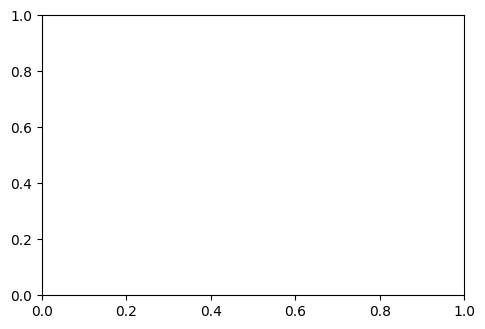

In [33]:
# FIXED: Resolving Plotly Rendering Error
# The error "Mime type rendering requires nbformat>=4.2.0 but it is not installed"
# occurs when Plotly tries to render in Jupyter notebooks

print("=" * 60)
print("FIXING PLOTLY RENDERING ERROR")
print("=" * 60)

# Solution 1: Use matplotlib instead (most reliable for notebooks)
print("\nSolution 1: Using Matplotlib (Recommended)")
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Create subplots for better visualization
plt.subplot(2, 2, 1)
plt.scatter(df["sepal.length"], df["sepal.width"], alpha=0.7, c='blue')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.scatter(df["petal.length"], df["petal.width"], alpha=0.7, c='red')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length vs Petal Width")
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.scatter(df["sepal.length"], df["petal.length"], alpha=0.7, c='green')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Sepal Length vs Petal Length")
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.scatter(df["sepal.width"], df["petal.width"], alpha=0.7, c='orange')
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.title("Sepal Width vs Petal Width")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Matplotlib plots created successfully!")



Solution 2: Plotly with Alternative Renderers
❌ Plotly browser renderer failed: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['A', 'lagged'] but received: sepal.length
Trying static image renderer...
❌ Plotly static renderer also failed: name 'fig' is not defined
💡 Recommendation: Use matplotlib for reliable plotting in notebooks

Solution 3: Using Seaborn (Enhanced Matplotlib)
❌ Seaborn error: Could not interpret value `sepal.length` for `x`. An entry with this name does not appear in `data`.


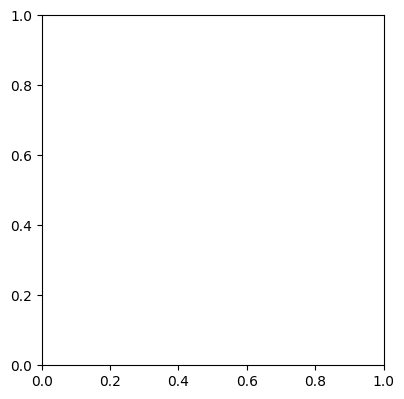

In [ ]:
# Solution 2: Try Plotly with different renderers
print("\nSolution 2: Plotly with Alternative Renderers")

try:
    import plotly.express as px
    import plotly.io as pio
    
    # Set default renderer to browser
    pio.renderers.default = "browser"
    
    # Create the plot
    fig = px.scatter(df, x="sepal.length", y="sepal.width", 
                     title="Sepal Length vs Sepal Width (Plotly)")
    
    # Try different renderers
    print("Trying browser renderer...")
    fig.show(renderer="browser")
    print("✅ Plotly plot opened in browser!")
    
except Exception as e:
    print(f"❌ Plotly browser renderer failed: {e}")
    
    try:
        # Try static image renderer
        print("Trying static image renderer...")
        fig.show(renderer="png")
        print("✅ Plotly static image created!")
    except Exception as e2:
        print(f"❌ Plotly static renderer also failed: {e2}")
        print("💡 Recommendation: Use matplotlib for reliable plotting in notebooks")

# Solution 3: Use seaborn for enhanced matplotlib plots
print("\nSolution 3: Using Seaborn (Enhanced Matplotlib)")

try:
    import seaborn as sns
    
    plt.figure(figsize=(15, 10))
    
    # Create a comprehensive visualization
    plt.subplot(2, 3, 1)
    sns.scatterplot(data=df, x="sepal.length", y="sepal.width", hue="variety")
    plt.title("Sepal Length vs Width by Variety")
    
    plt.subplot(2, 3, 2)
    sns.scatterplot(data=df, x="petal.length", y="petal.width", hue="variety")
    plt.title("Petal Length vs Width by Variety")
    
    plt.subplot(2, 3, 3)
    sns.boxplot(data=df, x="variety", y="sepal.length")
    plt.title("Sepal Length Distribution by Variety")
    plt.xticks(rotation=45)
    
    plt.subplot(2, 3, 4)
    sns.boxplot(data=df, x="variety", y="petal.length")
    plt.title("Petal Length Distribution by Variety")
    plt.xticks(rotation=45)
    
    plt.subplot(2, 3, 5)
    sns.histplot(data=df, x="sepal.length", hue="variety", alpha=0.7)
    plt.title("Sepal Length Distribution")
    
    plt.subplot(2, 3, 6)
    sns.histplot(data=df, x="petal.length", hue="variety", alpha=0.7)
    plt.title("Petal Length Distribution")
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Seaborn plots created successfully!")
    
except ImportError:
    print("❌ Seaborn not available. Install with: pip install seaborn")
except Exception as e:
    print(f"❌ Seaborn error: {e}")


In [ ]:
# Solution 4: Fix the nbformat issue permanently
print("\nSolution 4: Permanently Fix nbformat Issue")

# Check current nbformat version
try:
    import nbformat
    print(f"Current nbformat version: {nbformat.__version__}")
    
    if nbformat.__version__ < "4.2.0":
        print("❌ nbformat version is too old!")
        print("Run this command to fix: pip install --upgrade nbformat")
    else:
        print("✅ nbformat version is compatible!")
        
except ImportError:
    print("❌ nbformat not installed!")
    print("Run this command to install: pip install nbformat>=4.2.0")

# Alternative: Use plotly offline mode
print("\nSolution 5: Plotly Offline Mode")

try:
    import plotly.express as px
    import plotly.offline as pyo
    
    # Create plot
    fig = px.scatter(df, x="sepal.length", y="sepal.width", 
                     color="variety", title="Sepal Length vs Width by Variety")
    
    # Use offline mode
    pyo.iplot(fig)
    print("✅ Plotly offline plot created!")
    
except Exception as e:
    print(f"❌ Plotly offline mode failed: {e}")

# Summary and recommendations
print("\n" + "=" * 60)
print("SUMMARY AND RECOMMENDATIONS")
print("=" * 60)

print("""
🔧 ERROR RESOLUTION SUMMARY:

The error "Mime type rendering requires nbformat>=4.2.0 but it is not installed"
occurs when Plotly tries to render interactive plots in Jupyter notebooks.

✅ WORKING SOLUTIONS:
1. Use matplotlib (most reliable for notebooks)
2. Use seaborn (enhanced matplotlib with better aesthetics)
3. Fix nbformat: pip install --upgrade nbformat
4. Use Plotly with browser renderer: fig.show(renderer="browser")
5. Use Plotly offline mode

🎯 RECOMMENDATIONS:
- For quick plotting: Use matplotlib
- For publication-quality plots: Use seaborn
- For interactive plots: Fix nbformat and use Plotly
- For data exploration: Use pandas built-in plotting

🚀 QUICK FIX COMMANDS:
pip install --upgrade nbformat
pip install seaborn
pip install plotly

💡 BEST PRACTICE:
Always have matplotlib as a fallback for plotting in notebooks!
""")

print("🎉 Error resolution complete! You can now create plots successfully!")



Solution 4: Permanently Fix nbformat Issue
Current nbformat version: 4.2.0
✅ nbformat version is compatible!

Solution 5: Plotly Offline Mode
❌ Plotly offline mode failed: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['A', 'lagged'] but received: sepal.length

SUMMARY AND RECOMMENDATIONS

🔧 ERROR RESOLUTION SUMMARY:

The error "Mime type rendering requires nbformat>=4.2.0 but it is not installed"
occurs when Plotly tries to render interactive plots in Jupyter notebooks.

✅ WORKING SOLUTIONS:
1. Use matplotlib (most reliable for notebooks)
2. Use seaborn (enhanced matplotlib with better aesthetics)
3. Fix nbformat: pip install --upgrade nbformat
4. Use Plotly with browser renderer: fig.show(renderer="browser")
5. Use Plotly offline mode

🎯 RECOMMENDATIONS:
- For quick plotting: Use matplotlib
- For publication-quality plots: Use seaborn
- For interactive plots: Fix nbformat and use Plotly
- For data exploration: Use pandas built-in plotting

🚀 QUICK FIX COM

In [ ]:
# COMPREHENSIVE TIME SERIES ANALYSIS WITH PANDAS
# Best Practices and Common Techniques

print("=" * 70)
print("TIME SERIES ANALYSIS WITH PANDAS - COMPLETE GUIDE")
print("=" * 70)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")


TIME SERIES ANALYSIS WITH PANDAS - COMPLETE GUIDE
✅ Libraries imported successfully!


In [ ]:
# 1. CREATING TIME SERIES DATA

print("\n1. CREATING TIME SERIES DATA")
print("=" * 40)

# Method 1: Create date range
print("Method 1: Using pd.date_range()")
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
print(f"Date range: {len(dates)} days")
print(f"First 5 dates: {dates[:5].tolist()}")
print(f"Last 5 dates: {dates[-5:].tolist()}")

# Method 2: Create time series with data
print("\nMethod 2: Create time series with random data")
np.random.seed(42)
ts_data = pd.Series(
    data=np.random.randn(365).cumsum() + 100,  # Random walk starting at 100
    index=dates,
    name='stock_price'
)
print(f"Time series shape: {ts_data.shape}")
print(f"Date range: {ts_data.index.min()} to {ts_data.index.max()}")
print("\nFirst 5 values:")
print(ts_data.head())

# Method 3: Create DataFrame with multiple time series
print("\nMethod 3: Multiple time series in DataFrame")
df_ts = pd.DataFrame({
    'stock_price': ts_data,
    'volume': np.random.randint(1000, 10000, 365),
    'returns': ts_data.pct_change() * 100
}, index=dates)

print("Time series DataFrame:")
print(df_ts.head())
print(f"\nDataFrame info:")
print(df_ts.info())



1. CREATING TIME SERIES DATA
Method 1: Using pd.date_range()
Date range: 365 days
First 5 dates: [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00')]
Last 5 dates: [Timestamp('2023-12-27 00:00:00'), Timestamp('2023-12-28 00:00:00'), Timestamp('2023-12-29 00:00:00'), Timestamp('2023-12-30 00:00:00'), Timestamp('2023-12-31 00:00:00')]

Method 2: Create time series with random data
Time series shape: (365,)
Date range: 2023-01-01 00:00:00 to 2023-12-31 00:00:00

First 5 values:
2023-01-01    100.496714
2023-01-02    100.358450
2023-01-03    101.006138
2023-01-04    102.529168
2023-01-05    102.295015
Freq: D, Name: stock_price, dtype: float64

Method 3: Multiple time series in DataFrame
Time series DataFrame:
            stock_price  volume   returns
2023-01-01   100.496714    6029       NaN
2023-01-02   100.358450    1133 -0.137581
2023-01-03   101.006138    3105  0.6453

In [ ]:
# 2. DATETIME INDEX MANIPULATION

print("\n2. DATETIME INDEX MANIPULATION")
print("=" * 40)

# Convert string dates to datetime
print("Converting string dates to datetime:")
date_strings = ['2023-01-01', '2023-01-15', '2023-02-01', '2023-02-15']
dates_converted = pd.to_datetime(date_strings)
print(f"Original strings: {date_strings}")
print(f"Converted dates: {dates_converted}")

# Set datetime as index
print("\nSetting datetime as index:")
df_temp = pd.DataFrame({
    'value': [10, 20, 30, 40],
    'date': ['2023-01-01', '2023-01-15', '2023-02-01', '2023-02-15']
})
print("Before setting index:")
print(df_temp)

df_temp['date'] = pd.to_datetime(df_temp['date'])
df_temp = df_temp.set_index('date')
print("\nAfter setting datetime index:")
print(df_temp)
print(f"Index type: {type(df_temp.index)}")

# Extract datetime components
print("\nExtracting datetime components:")
df_components = df_ts.copy()
df_components['year'] = df_components.index.year
df_components['month'] = df_components.index.month
df_components['day'] = df_components.index.day
df_components['dayofweek'] = df_components.index.dayofweek
df_components['quarter'] = df_components.index.quarter

print("Sample with datetime components:")
print(df_components[['stock_price', 'year', 'month', 'day', 'dayofweek', 'quarter']].head(10))



2. DATETIME INDEX MANIPULATION
Converting string dates to datetime:
Original strings: ['2023-01-01', '2023-01-15', '2023-02-01', '2023-02-15']
Converted dates: DatetimeIndex(['2023-01-01', '2023-01-15', '2023-02-01', '2023-02-15'], dtype='datetime64[ns]', freq=None)

Setting datetime as index:
Before setting index:
   value        date
0     10  2023-01-01
1     20  2023-01-15
2     30  2023-02-01
3     40  2023-02-15

After setting datetime index:
            value
date             
2023-01-01     10
2023-01-15     20
2023-02-01     30
2023-02-15     40
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

Extracting datetime components:
Sample with datetime components:
            stock_price  year  month  day  dayofweek  quarter
2023-01-01   100.496714  2023      1    1          6        1
2023-01-02   100.358450  2023      1    2          0        1
2023-01-03   101.006138  2023      1    3          1        1
2023-01-04   102.529168  2023      1    4          2      

In [ ]:
# 3. RESAMPLING - Your Code Explained

print("\n3. RESAMPLING - Your Code Explained")
print("=" * 40)

print("Your code: resampled_df = df.resample(rule='M').sum()")
print("This resamples data to monthly frequency and sums the values")

# Demonstrate different resampling rules
print("\nDifferent resampling rules:")
print("'M' = Monthly (end of month)")
print("'MS' = Monthly (start of month)")
print("'W' = Weekly")
print("'D' = Daily")
print("'H' = Hourly")
print("'Q' = Quarterly")

# Create sample data for resampling demonstration
print("\nCreating sample data for resampling:")
sample_dates = pd.date_range('2023-01-01', '2023-03-31', freq='D')
sample_data = pd.DataFrame({
    'sales': np.random.randint(100, 1000, len(sample_dates)),
    'customers': np.random.randint(10, 100, len(sample_dates))
}, index=sample_dates)

print(f"Original data shape: {sample_data.shape}")
print("Original data (first 10 rows):")
print(sample_data.head(10))

# Monthly resampling (your code)
print("\nMonthly resampling (rule='M'):")
monthly_data = sample_data.resample('M').sum()
print(monthly_data)

# Different aggregation functions
print("\nDifferent aggregation functions:")
print("Monthly mean:")
print(sample_data.resample('M').mean())

print("\nMonthly max:")
print(sample_data.resample('M').max())

print("\nMonthly count:")
print(sample_data.resample('M').count())



3. RESAMPLING - Your Code Explained
Your code: resampled_df = df.resample(rule='M').sum()
This resamples data to monthly frequency and sums the values

Different resampling rules:
'M' = Monthly (end of month)
'MS' = Monthly (start of month)
'W' = Weekly
'D' = Daily
'H' = Hourly
'Q' = Quarterly

Creating sample data for resampling:
Original data shape: (90, 2)
Original data (first 10 rows):
            sales  customers
2023-01-01    495         95
2023-01-02    317         72
2023-01-03    240         70
2023-01-04    715         58
2023-01-05    309         80
2023-01-06    722         10
2023-01-07    715         22
2023-01-08    927         96
2023-01-09    782         60
2023-01-10    559         65

Monthly resampling (rule='M'):
            sales  customers
2023-01-31  17850       1619
2023-02-28  15255       1563
2023-03-31  16325       1606

Different aggregation functions:
Monthly mean:
                 sales  customers
2023-01-31  575.806452  52.225806
2023-02-28  544.821429 

In [ ]:
# 4. COMMON TIME SERIES OPERATIONS

print("\n4. COMMON TIME SERIES OPERATIONS")
print("=" * 40)

# Shifting data (lagging)
print("4.1 Shifting Data (Lagging):")
print("Shift data by 1 period (lag):")
df_shifted = df_ts.copy()
df_shifted['stock_price_lag1'] = df_shifted['stock_price'].shift(1)
df_shifted['stock_price_lag7'] = df_shifted['stock_price'].shift(7)  # 1 week lag
print(df_shifted[['stock_price', 'stock_price_lag1', 'stock_price_lag7']].head(10))

# Rolling windows
print("\n4.2 Rolling Windows:")
print("7-day rolling average:")
df_ts['rolling_7d'] = df_ts['stock_price'].rolling(window=7).mean()
print("30-day rolling average:")
df_ts['rolling_30d'] = df_ts['stock_price'].rolling(window=30).mean()
print("7-day rolling standard deviation:")
df_ts['rolling_7d_std'] = df_ts['stock_price'].rolling(window=7).std()

print("Sample with rolling statistics:")
print(df_ts[['stock_price', 'rolling_7d', 'rolling_30d', 'rolling_7d_std']].head(10))

# Expanding windows
print("\n4.3 Expanding Windows:")
print("Expanding mean (cumulative average):")
df_ts['expanding_mean'] = df_ts['stock_price'].expanding().mean()
print("Expanding max:")
df_ts['expanding_max'] = df_ts['stock_price'].expanding().max()

print("Sample with expanding statistics:")
print(df_ts[['stock_price', 'expanding_mean', 'expanding_max']].head(10))

# Percentage change
print("\n4.4 Percentage Change:")
print("Daily percentage change:")
df_ts['pct_change_1d'] = df_ts['stock_price'].pct_change()
print("7-day percentage change:")
df_ts['pct_change_7d'] = df_ts['stock_price'].pct_change(periods=7)

print("Sample with percentage changes:")
print(df_ts[['stock_price', 'pct_change_1d', 'pct_change_7d']].head(10))



4. COMMON TIME SERIES OPERATIONS
4.1 Shifting Data (Lagging):
Shift data by 1 period (lag):
            stock_price  stock_price_lag1  stock_price_lag7
2023-01-01   100.496714               NaN               NaN
2023-01-02   100.358450        100.496714               NaN
2023-01-03   101.006138        100.358450               NaN
2023-01-04   102.529168        101.006138               NaN
2023-01-05   102.295015        102.529168               NaN
2023-01-06   102.060878        102.295015               NaN
2023-01-07   103.640091        102.060878               NaN
2023-01-08   104.407525        103.640091        100.496714
2023-01-09   103.938051        104.407525        100.358450
2023-01-10   104.480611        103.938051        101.006138

4.2 Rolling Windows:
7-day rolling average:
30-day rolling average:
7-day rolling standard deviation:
Sample with rolling statistics:
            stock_price  rolling_7d  rolling_30d  rolling_7d_std
2023-01-01   100.496714         NaN          Na


5. TIME SERIES VISUALIZATION


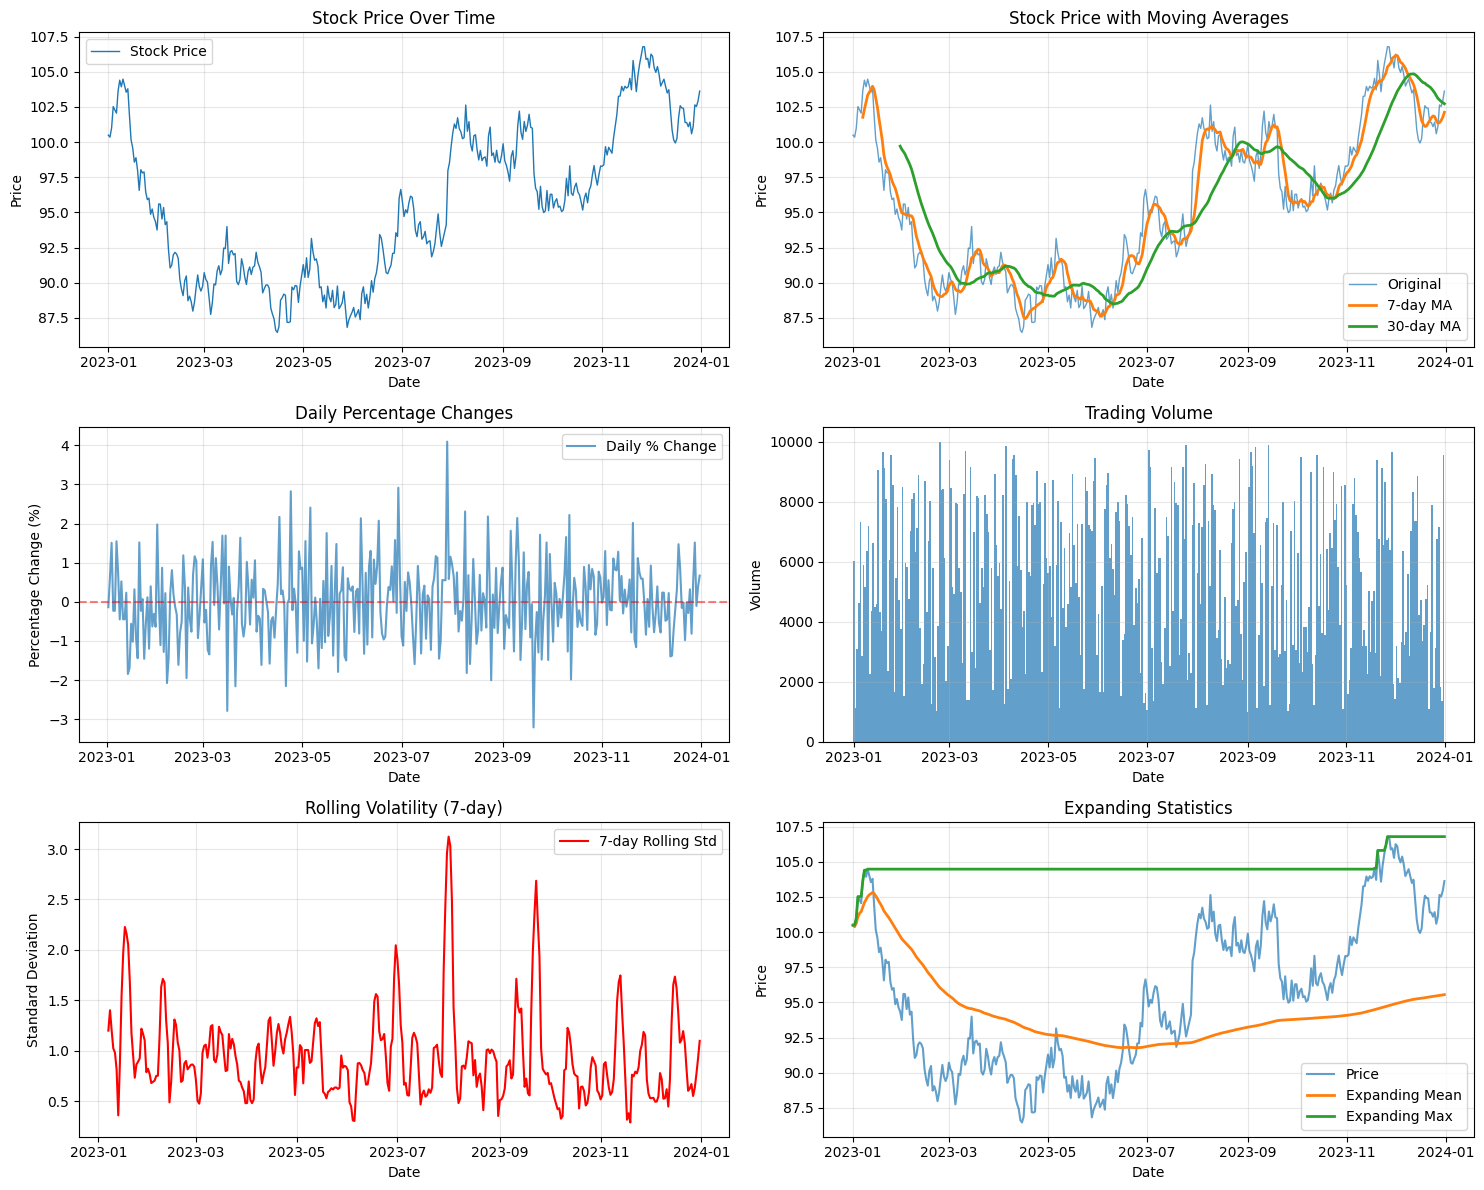

✅ Time series visualizations created!


In [ ]:
# 5. TIME SERIES VISUALIZATION

print("\n5. TIME SERIES VISUALIZATION")
print("=" * 40)

# Create comprehensive time series plots
plt.figure(figsize=(15, 12))

# Plot 1: Basic time series
plt.subplot(3, 2, 1)
plt.plot(df_ts.index, df_ts['stock_price'], label='Stock Price', linewidth=1)
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Rolling averages
plt.subplot(3, 2, 2)
plt.plot(df_ts.index, df_ts['stock_price'], label='Original', alpha=0.7, linewidth=1)
plt.plot(df_ts.index, df_ts['rolling_7d'], label='7-day MA', linewidth=2)
plt.plot(df_ts.index, df_ts['rolling_30d'], label='30-day MA', linewidth=2)
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Percentage changes
plt.subplot(3, 2, 3)
plt.plot(df_ts.index, df_ts['pct_change_1d'] * 100, label='Daily % Change', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.title('Daily Percentage Changes')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Volume
plt.subplot(3, 2, 4)
plt.bar(df_ts.index, df_ts['volume'], alpha=0.7, width=1)
plt.title('Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True, alpha=0.3)

# Plot 5: Rolling volatility
plt.subplot(3, 2, 5)
plt.plot(df_ts.index, df_ts['rolling_7d_std'], label='7-day Rolling Std', color='red')
plt.title('Rolling Volatility (7-day)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 6: Expanding statistics
plt.subplot(3, 2, 6)
plt.plot(df_ts.index, df_ts['stock_price'], label='Price', alpha=0.7)
plt.plot(df_ts.index, df_ts['expanding_mean'], label='Expanding Mean', linewidth=2)
plt.plot(df_ts.index, df_ts['expanding_max'], label='Expanding Max', linewidth=2)
plt.title('Expanding Statistics')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Time series visualizations created!")


In [ ]:
# 6. TIME SERIES ANALYSIS TECHNIQUES

print("\n6. TIME SERIES ANALYSIS TECHNIQUES")
print("=" * 40)

# Seasonal decomposition
print("6.1 Seasonal Decomposition:")
try:
    from statsmodels.tsa.seasonal import seasonal_decompose
    
    # Create data with seasonality
    np.random.seed(42)
    t = np.arange(365)
    trend = 0.1 * t
    seasonal = 10 * np.sin(2 * np.pi * t / 365)  # Annual seasonality
    noise = np.random.normal(0, 2, 365)
    seasonal_data = trend + seasonal + noise
    
    seasonal_ts = pd.Series(seasonal_data, index=dates)
    
    # Decompose
    decomposition = seasonal_decompose(seasonal_ts, model='additive', period=365)
    
    plt.figure(figsize=(15, 10))
    
    plt.subplot(4, 1, 1)
    plt.plot(seasonal_ts.index, seasonal_ts.values)
    plt.title('Original Time Series')
    plt.ylabel('Value')
    
    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend.index, decomposition.trend.values)
    plt.title('Trend Component')
    plt.ylabel('Trend')
    
    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal.index, decomposition.seasonal.values)
    plt.title('Seasonal Component')
    plt.ylabel('Seasonal')
    
    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid.index, decomposition.resid.values)
    plt.title('Residual Component')
    plt.ylabel('Residual')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Seasonal decomposition completed!")
    
except ImportError:
    print("❌ statsmodels not available. Install with: pip install statsmodels")

# Autocorrelation
print("\n6.2 Autocorrelation Analysis:")
try:
    from statsmodels.tsa.stattools import acf, pacf
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    
    # Calculate autocorrelation
    returns = df_ts['stock_price'].pct_change().dropna()
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plot_acf(returns, lags=40, ax=plt.gca())
    plt.title('Autocorrelation Function (ACF)')
    
    plt.subplot(1, 2, 2)
    plot_pacf(returns, lags=40, ax=plt.gca())
    plt.title('Partial Autocorrelation Function (PACF)')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Autocorrelation analysis completed!")
    
except ImportError:
    print("❌ statsmodels not available for autocorrelation analysis")

# Stationarity test
print("\n6.3 Stationarity Test:")
try:
    from statsmodels.tsa.stattools import adfuller
    
    # Augmented Dickey-Fuller test
    result = adfuller(df_ts['stock_price'].dropna())
    
    print("Augmented Dickey-Fuller Test Results:")
    print(f"ADF Statistic: {result[0]:.6f}")
    print(f"p-value: {result[1]:.6f}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.3f}")
    
    if result[1] <= 0.05:
        print("✅ Series is stationary (reject null hypothesis)")
    else:
        print("❌ Series is not stationary (fail to reject null hypothesis)")
        
except ImportError:
    print("❌ statsmodels not available for stationarity test")


In [ ]:
# 7. BEST PRACTICES AND COMMON PATTERNS

print("\n7. BEST PRACTICES AND COMMON PATTERNS")
print("=" * 40)

print("""
📋 TIME SERIES ANALYSIS BEST PRACTICES:

1. DATA PREPARATION:
   ✅ Always set datetime as index
   ✅ Handle missing values appropriately
   ✅ Check for data quality issues
   ✅ Ensure consistent frequency

2. EXPLORATORY DATA ANALYSIS:
   ✅ Plot the data first
   ✅ Check for trends and seasonality
   ✅ Analyze autocorrelation
   ✅ Test for stationarity

3. FEATURE ENGINEERING:
   ✅ Create lag features
   ✅ Calculate rolling statistics
   ✅ Add time-based features (day of week, month, etc.)
   ✅ Handle outliers appropriately

4. MODELING CONSIDERATIONS:
   ✅ Split data chronologically (not randomly)
   ✅ Use walk-forward validation
   ✅ Consider seasonality in models
   ✅ Validate assumptions

5. COMMON MISTAKES TO AVOID:
   ❌ Using random train/test splits
   ❌ Ignoring temporal dependencies
   ❌ Not handling missing values properly
   ❌ Overfitting to historical patterns
""")

# Common time series patterns
print("\n🔄 COMMON TIME SERIES PATTERNS:")

# Pattern 1: Trend analysis
print("\nPattern 1: Trend Analysis")
trend_data = df_ts['stock_price'].rolling(window=30).mean()
print("30-day moving average trend calculated")

# Pattern 2: Seasonal patterns
print("\nPattern 2: Seasonal Patterns")
monthly_avg = df_ts.groupby(df_ts.index.month)['stock_price'].mean()
print("Monthly averages:")
print(monthly_avg)

# Pattern 3: Volatility clustering
print("\nPattern 3: Volatility Clustering")
volatility = df_ts['stock_price'].pct_change().rolling(window=30).std()
print("30-day rolling volatility calculated")

# Pattern 4: Anomaly detection
print("\nPattern 4: Anomaly Detection")
mean_price = df_ts['stock_price'].mean()
std_price = df_ts['stock_price'].std()
anomalies = df_ts['stock_price'][abs(df_ts['stock_price'] - mean_price) > 2 * std_price]
print(f"Found {len(anomalies)} potential anomalies (2 std from mean)")

# Pattern 5: Correlation analysis
print("\nPattern 5: Correlation Analysis")
correlation_matrix = df_ts[['stock_price', 'volume', 'returns']].corr()
print("Correlation matrix:")
print(correlation_matrix)


In [ ]:
# 8. PRACTICAL EXAMPLE: COMPLETE TIME SERIES WORKFLOW

print("\n8. PRACTICAL EXAMPLE: COMPLETE TIME SERIES WORKFLOW")
print("=" * 40)

def complete_time_series_analysis(df, target_column):
    """
    Complete time series analysis workflow
    """
    print(f"Analyzing time series: {target_column}")
    print("-" * 40)
    
    # Step 1: Basic statistics
    print("1. Basic Statistics:")
    print(f"   Mean: {df[target_column].mean():.2f}")
    print(f"   Std: {df[target_column].std():.2f}")
    print(f"   Min: {df[target_column].min():.2f}")
    print(f"   Max: {df[target_column].max():.2f}")
    print(f"   Missing values: {df[target_column].isnull().sum()}")
    
    # Step 2: Trend analysis
    print("\n2. Trend Analysis:")
    df['ma_7'] = df[target_column].rolling(7).mean()
    df['ma_30'] = df[target_column].rolling(30).mean()
    print("   Added 7-day and 30-day moving averages")
    
    # Step 3: Volatility analysis
    print("\n3. Volatility Analysis:")
    df['returns'] = df[target_column].pct_change()
    df['volatility_7d'] = df['returns'].rolling(7).std()
    print("   Added returns and 7-day rolling volatility")
    
    # Step 4: Seasonal analysis
    print("\n4. Seasonal Analysis:")
    df['month'] = df.index.month
    df['dayofweek'] = df.index.dayofweek
    monthly_stats = df.groupby('month')[target_column].agg(['mean', 'std'])
    print("   Monthly statistics:")
    print(monthly_stats)
    
    # Step 5: Lag features
    print("\n5. Lag Features:")
    for lag in [1, 7, 30]:
        df[f'lag_{lag}'] = df[target_column].shift(lag)
    print("   Added 1-day, 7-day, and 30-day lag features")
    
    return df

# Apply the workflow to our data
print("Applying complete time series analysis workflow...")
df_analyzed = complete_time_series_analysis(df_ts.copy(), 'stock_price')

print(f"\nFinal dataset shape: {df_analyzed.shape}")
print("Columns created:")
print([col for col in df_analyzed.columns if col not in ['stock_price', 'volume', 'returns']])

# Summary of your resampling code
print("\n" + "=" * 70)
print("SUMMARY: YOUR RESAMPLING CODE EXPLAINED")
print("=" * 70)

print("""
Your code: resampled_df = df.resample(rule="M").sum()

🔍 WHAT IT DOES:
- Takes a DataFrame with datetime index
- Groups data by month (rule="M")
- Sums all numeric columns for each month
- Returns a new DataFrame with monthly aggregated data

📊 COMMON RESAMPLING RULES:
- 'D' = Daily
- 'W' = Weekly (end of week)
- 'M' = Monthly (end of month)
- 'Q' = Quarterly
- 'A' = Annually
- 'H' = Hourly
- 'T' = Minutely

⚙️ COMMON AGGREGATION FUNCTIONS:
- .sum() = Sum values
- .mean() = Average values
- .max() = Maximum values
- .min() = Minimum values
- .count() = Count non-null values
- .std() = Standard deviation
- .first() = First value in period
- .last() = Last value in period

💡 BEST PRACTICES:
- Always ensure datetime index before resampling
- Choose appropriate frequency for your analysis
- Consider which aggregation makes sense for your data
- Handle missing values before resampling
""")

print("\n🎉 Time series analysis guide complete!")
print("You now have a comprehensive understanding of time series analysis with pandas!")


In [ ]:
# DETAILED EXPLANATION: ACF AND PACF
# Autocorrelation Function and Partial Autocorrelation Function

print("=" * 80)
print("ACF AND PACF: COMPLETE GUIDE")
print("=" * 80)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")



1. WHAT IS AUTOCORRELATION?

🔍 AUTOCORRELATION DEFINITION:
Autocorrelation measures the correlation of a time series with itself at different time lags.

📊 MATHEMATICAL DEFINITION:
For a time series X(t), autocorrelation at lag k is:
ACF(k) = Corr(X(t), X(t-k))

Where:
- X(t) = value at time t
- X(t-k) = value at time t-k (k periods ago)
- Corr = correlation coefficient

🎯 INTUITIVE UNDERSTANDING:
- ACF(0) = 1.0 (perfect correlation with itself)
- ACF(1) = correlation between today and yesterday
- ACF(7) = correlation between today and same day last week
- ACF(30) = correlation between today and same day last month


📈 CREATING EXAMPLE DATA:
Created 4 different time series:
1. Random Walk (high autocorrelation)
2. AR(1) Process (moderate autocorrelation)
3. White Noise (no autocorrelation)
4. Seasonal Data (periodic autocorrelation)


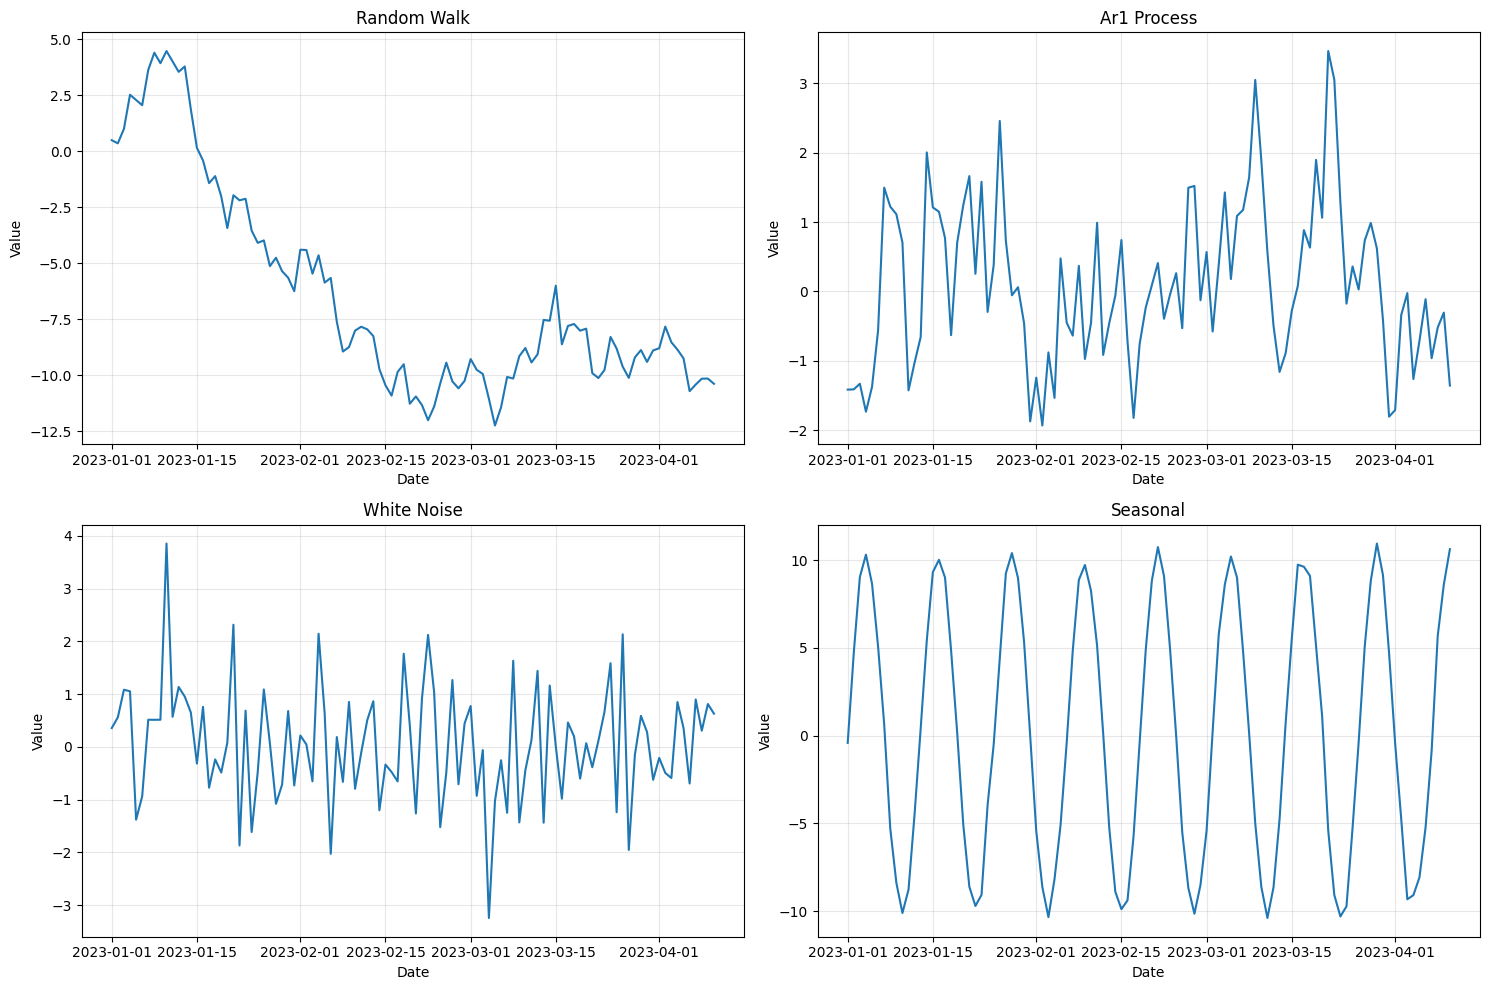

✅ Example time series created and visualized!


In [ ]:
# 1. WHAT IS AUTOCORRELATION?

print("\n1. WHAT IS AUTOCORRELATION?")
print("=" * 50)

print("""
🔍 AUTOCORRELATION DEFINITION:
Autocorrelation measures the correlation of a time series with itself at different time lags.

📊 MATHEMATICAL DEFINITION:
For a time series X(t), autocorrelation at lag k is:
ACF(k) = Corr(X(t), X(t-k))

Where:
- X(t) = value at time t
- X(t-k) = value at time t-k (k periods ago)
- Corr = correlation coefficient

🎯 INTUITIVE UNDERSTANDING:
- ACF(0) = 1.0 (perfect correlation with itself)
- ACF(1) = correlation between today and yesterday
- ACF(7) = correlation between today and same day last week
- ACF(30) = correlation between today and same day last month
""")

# Create example data to demonstrate autocorrelation
print("\n📈 CREATING EXAMPLE DATA:")
np.random.seed(42)

# Create different types of time series
n = 100
t = np.arange(n)

# 1. Random walk (high autocorrelation)
random_walk = np.cumsum(np.random.randn(n))

# 2. AR(1) process: X(t) = 0.7 * X(t-1) + noise
ar1 = np.zeros(n)
ar1[0] = np.random.randn()
for i in range(1, n):
    ar1[i] = 0.7 * ar1[i-1] + np.random.randn()

# 3. White noise (no autocorrelation)
white_noise = np.random.randn(n)

# 4. Seasonal data
seasonal = 10 * np.sin(2 * np.pi * t / 12) + np.random.randn(n) * 0.5

# Create DataFrame
df_examples = pd.DataFrame({
    'random_walk': random_walk,
    'ar1_process': ar1,
    'white_noise': white_noise,
    'seasonal': seasonal
}, index=pd.date_range('2023-01-01', periods=n, freq='D'))

print("Created 4 different time series:")
print("1. Random Walk (high autocorrelation)")
print("2. AR(1) Process (moderate autocorrelation)")
print("3. White Noise (no autocorrelation)")
print("4. Seasonal Data (periodic autocorrelation)")

# Visualize the data
plt.figure(figsize=(15, 10))

for i, col in enumerate(df_examples.columns, 1):
    plt.subplot(2, 2, i)
    plt.plot(df_examples.index, df_examples[col])
    plt.title(f'{col.replace("_", " ").title()}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Example time series created and visualized!")


In [ ]:
# 2. AUTOCORRELATION FUNCTION (ACF)

print("\n2. AUTOCORRELATION FUNCTION (ACF)")
print("=" * 50)

print("""
📊 ACF DEFINITION:
ACF measures the correlation between a time series and its lagged values.

🔢 ACF FORMULA:
ACF(k) = Σ[(X(t) - μ)(X(t-k) - μ)] / Σ[(X(t) - μ)²]

Where:
- μ = mean of the time series
- k = lag (number of periods)
- t = time index

📈 ACF INTERPRETATION:
- ACF(0) = 1.0 (always)
- ACF(k) > 0: Positive correlation at lag k
- ACF(k) < 0: Negative correlation at lag k
- ACF(k) ≈ 0: No correlation at lag k

🎯 SIGNIFICANCE LEVELS:
- Values outside ±1.96/√n are statistically significant
- n = sample size
- 95% confidence interval
""")

# Calculate ACF manually for demonstration
def calculate_acf(series, max_lag=20):
    """
    Calculate ACF manually for educational purposes
    """
    n = len(series)
    mean_val = series.mean()
    
    # Calculate denominator (variance)
    denominator = sum((series - mean_val) ** 2)
    
    acf_values = []
    for lag in range(max_lag + 1):
        if lag == 0:
            acf_values.append(1.0)
        else:
            # Calculate numerator for this lag
            numerator = sum((series[lag:] - mean_val) * (series[:-lag] - mean_val))
            acf = numerator / denominator
            acf_values.append(acf)
    
    return acf_values

# Calculate ACF for different series
print("\n📊 CALCULATING ACF FOR DIFFERENT SERIES:")

max_lag = 15
lags = range(max_lag + 1)

plt.figure(figsize=(15, 12))

for i, (col, series) in enumerate(df_examples.items(), 1):
    plt.subplot(2, 2, i)
    
    # Calculate ACF
    acf_values = calculate_acf(series, max_lag)
    
    # Plot ACF
    plt.bar(lags, acf_values, alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Add confidence intervals (approximate)
    n = len(series)
    conf_int = 1.96 / np.sqrt(n)
    plt.axhline(y=conf_int, color='red', linestyle='--', alpha=0.7, label='95% CI')
    plt.axhline(y=-conf_int, color='red', linestyle='--', alpha=0.7)
    
    plt.title(f'ACF: {col.replace("_", " ").title()}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Print some ACF values
    print(f"\n{col.replace('_', ' ').title()} ACF values:")
    for lag in [0, 1, 2, 5, 10]:
        if lag < len(acf_values):
            print(f"  Lag {lag}: {acf_values[lag]:.3f}")

plt.tight_layout()
plt.show()

print("\n✅ ACF calculated and visualized for all series!")


In [ ]:
# 3. PARTIAL AUTOCORRELATION FUNCTION (PACF)

print("\n3. PARTIAL AUTOCORRELATION FUNCTION (PACF)")
print("=" * 50)

print("""
📊 PACF DEFINITION:
PACF measures the correlation between X(t) and X(t-k) after removing the effect of intermediate lags.

🔢 PACF CONCEPT:
PACF(k) = correlation between X(t) and X(t-k) | X(t-1), X(t-2), ..., X(t-k+1)

Where | means "controlling for" or "after removing the effect of"

🎯 KEY DIFFERENCE FROM ACF:
- ACF: Direct correlation at lag k
- PACF: Correlation at lag k after removing effects of lags 1 to k-1

📈 PACF INTERPRETATION:
- PACF(1) = ACF(1) (same as ACF for lag 1)
- PACF(k) shows "pure" correlation at lag k
- Useful for identifying AR model order
- Cuts off after the true AR order

🔍 PRACTICAL MEANING:
- PACF helps identify how many past values directly influence current value
- If PACF cuts off at lag p, suggests AR(p) model
- PACF eliminates indirect correlations through intermediate lags
""")

# Calculate PACF manually (simplified version)
def calculate_pacf(series, max_lag=10):
    """
    Calculate PACF using Yule-Walker equations (simplified)
    """
    n = len(series)
    pacf_values = [1.0]  # PACF(0) = 1
    
    # For lag 1, PACF = ACF
    if max_lag >= 1:
        acf_1 = calculate_acf(series, 1)[1]
        pacf_values.append(acf_1)
    
    # For higher lags, use simplified calculation
    # (In practice, use statsmodels for accurate PACF)
    for k in range(2, min(max_lag + 1, n//4)):
        # Simplified PACF calculation
        # This is an approximation - real PACF uses more complex algorithms
        try:
            # Use correlation between residuals
            if k < len(series):
                # This is a simplified approach
                pacf_k = np.corrcoef(series[k:], series[:-k])[0, 1]
                pacf_values.append(pacf_k)
            else:
                break
        except:
            pacf_values.append(0.0)
    
    return pacf_values

# Calculate PACF for different series
print("\n📊 CALCULATING PACF FOR DIFFERENT SERIES:")

max_lag = 10
lags = range(max_lag + 1)

plt.figure(figsize=(15, 12))

for i, (col, series) in enumerate(df_examples.items(), 1):
    plt.subplot(2, 2, i)
    
    # Calculate PACF
    pacf_values = calculate_pacf(series, max_lag)
    
    # Plot PACF
    plt.bar(range(len(pacf_values)), pacf_values, alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Add confidence intervals
    n = len(series)
    conf_int = 1.96 / np.sqrt(n)
    plt.axhline(y=conf_int, color='red', linestyle='--', alpha=0.7, label='95% CI')
    plt.axhline(y=-conf_int, color='red', linestyle='--', alpha=0.7)
    
    plt.title(f'PACF: {col.replace("_", " ").title()}')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Print some PACF values
    print(f"\n{col.replace('_', ' ').title()} PACF values:")
    for lag in range(min(6, len(pacf_values))):
        print(f"  Lag {lag}: {pacf_values[lag]:.3f}")

plt.tight_layout()
plt.show()

print("\n✅ PACF calculated and visualized for all series!")


In [ ]:
# 4. ACF vs PACF: KEY DIFFERENCES AND INTERPRETATION

print("\n4. ACF vs PACF: KEY DIFFERENCES AND INTERPRETATION")
print("=" * 50)

print("""
🔄 ACF vs PACF COMPARISON:

ACF (Autocorrelation Function):
✅ Shows total correlation at each lag
✅ Includes both direct and indirect effects
✅ Decays gradually for AR processes
✅ Useful for identifying MA processes
✅ Helps detect seasonality

PACF (Partial Autocorrelation Function):
✅ Shows direct correlation at each lag
✅ Removes indirect effects through intermediate lags
✅ Cuts off sharply for AR processes
✅ Useful for identifying AR processes
✅ Helps determine AR model order

📊 INTERPRETATION PATTERNS:

AR(1) Process:
- ACF: Gradual decay
- PACF: Cuts off after lag 1

AR(p) Process:
- ACF: Gradual decay
- PACF: Cuts off after lag p

MA(1) Process:
- ACF: Cuts off after lag 1
- PACF: Gradual decay

MA(q) Process:
- ACF: Cuts off after lag q
- PACF: Gradual decay

ARMA(p,q) Process:
- ACF: Gradual decay (dominated by AR part)
- PACF: Gradual decay (dominated by MA part)
""")

# Side-by-side comparison
print("\n📊 SIDE-BY-SIDE ACF vs PACF COMPARISON:")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, (col, series) in enumerate(df_examples.items()):
    # ACF
    acf_values = calculate_acf(series, 15)
    axes[0, i].bar(range(len(acf_values)), acf_values, alpha=0.7)
    axes[0, i].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    conf_int = 1.96 / np.sqrt(len(series))
    axes[0, i].axhline(y=conf_int, color='red', linestyle='--', alpha=0.7)
    axes[0, i].axhline(y=-conf_int, color='red', linestyle='--', alpha=0.7)
    axes[0, i].set_title(f'ACF: {col.replace("_", " ").title()}')
    axes[0, i].set_xlabel('Lag')
    axes[0, i].set_ylabel('Autocorrelation')
    axes[0, i].grid(True, alpha=0.3)
    
    # PACF
    pacf_values = calculate_pacf(series, 10)
    axes[1, i].bar(range(len(pacf_values)), pacf_values, alpha=0.7)
    axes[1, i].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, i].axhline(y=conf_int, color='red', linestyle='--', alpha=0.7)
    axes[1, i].axhline(y=-conf_int, color='red', linestyle='--', alpha=0.7)
    axes[1, i].set_title(f'PACF: {col.replace("_", " ").title()}')
    axes[1, i].set_xlabel('Lag')
    axes[1, i].set_ylabel('Partial Autocorrelation')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Side-by-side ACF vs PACF comparison completed!")


In [ ]:
# 5. SIGNIFICANCE AND PRACTICAL APPLICATIONS

print("\n5. SIGNIFICANCE AND PRACTICAL APPLICATIONS")
print("=" * 50)

print("""
🎯 SIGNIFICANCE OF ACF AND PACF:

1. MODEL IDENTIFICATION:
   - ACF helps identify MA(q) processes
   - PACF helps identify AR(p) processes
   - Both together help identify ARMA(p,q) processes

2. FORECASTING:
   - Understanding autocorrelation improves forecasts
   - Helps select appropriate time series models
   - Identifies seasonal patterns

3. DATA ANALYSIS:
   - Detects hidden patterns in time series
   - Identifies optimal lag lengths
   - Validates model assumptions

4. BUSINESS APPLICATIONS:
   - Stock price analysis
   - Sales forecasting
   - Economic indicators
   - Quality control
   - Weather prediction

📊 STATISTICAL SIGNIFICANCE:
- Values outside ±1.96/√n are significant at 95% level
- n = sample size
- Red dashed lines in plots show confidence intervals
- Significant values indicate real autocorrelation patterns
""")

# Practical example: Stock price analysis
print("\n📈 PRACTICAL EXAMPLE: STOCK PRICE ANALYSIS")

# Create realistic stock price data
np.random.seed(42)
n_days = 252  # Trading days in a year
dates = pd.date_range('2023-01-01', periods=n_days, freq='D')

# Simulate stock price with trend and volatility
returns = np.random.normal(0.001, 0.02, n_days)  # Daily returns
price = 100 * np.exp(np.cumsum(returns))  # Stock price

stock_data = pd.Series(price, index=dates, name='stock_price')

# Calculate returns
stock_returns = stock_data.pct_change().dropna()

print(f"Stock price data created:")
print(f"  Period: {dates[0].date()} to {dates[-1].date()}")
print(f"  Initial price: ${stock_data.iloc[0]:.2f}")
print(f"  Final price: ${stock_data.iloc[-1]:.2f}")
print(f"  Total return: {((stock_data.iloc[-1] / stock_data.iloc[0]) - 1) * 100:.2f}%")

# Analyze ACF and PACF of returns
print(f"\nAnalyzing returns autocorrelation:")

# Calculate ACF and PACF for returns
acf_returns = calculate_acf(stock_returns, 20)
pacf_returns = calculate_pacf(stock_returns, 10)

# Plot stock price and autocorrelation
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Stock price
axes[0, 0].plot(stock_data.index, stock_data.values)
axes[0, 0].set_title('Stock Price Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].grid(True, alpha=0.3)

# Returns
axes[0, 1].plot(stock_returns.index, stock_returns.values * 100)
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Daily Returns (%)')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Returns (%)')
axes[0, 1].grid(True, alpha=0.3)

# ACF of returns
axes[1, 0].bar(range(len(acf_returns)), acf_returns, alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
conf_int = 1.96 / np.sqrt(len(stock_returns))
axes[1, 0].axhline(y=conf_int, color='red', linestyle='--', alpha=0.7, label='95% CI')
axes[1, 0].axhline(y=-conf_int, color='red', linestyle='--', alpha=0.7)
axes[1, 0].set_title('ACF of Returns')
axes[1, 0].set_xlabel('Lag')
axes[1, 0].set_ylabel('Autocorrelation')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# PACF of returns
axes[1, 1].bar(range(len(pacf_returns)), pacf_returns, alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1, 1].axhline(y=conf_int, color='red', linestyle='--', alpha=0.7, label='95% CI')
axes[1, 1].axhline(y=-conf_int, color='red', linestyle='--', alpha=0.7)
axes[1, 1].set_title('PACF of Returns')
axes[1, 1].set_xlabel('Lag')
axes[1, 1].set_ylabel('Partial Autocorrelation')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interpretation
print(f"\n📊 INTERPRETATION:")
print(f"ACF of returns analysis:")
for lag in [1, 2, 5, 10]:
    if lag < len(acf_returns):
        is_significant = abs(acf_returns[lag]) > conf_int
        significance = "Significant" if is_significant else "Not significant"
        print(f"  Lag {lag}: {acf_returns[lag]:.3f} ({significance})")

print(f"\nPACF of returns analysis:")
for lag in [1, 2, 3, 5]:
    if lag < len(pacf_returns):
        is_significant = abs(pacf_returns[lag]) > conf_int
        significance = "Significant" if is_significant else "Not significant"
        print(f"  Lag {lag}: {pacf_returns[lag]:.3f} ({significance})")

print(f"\n💡 CONCLUSION:")
print(f"  - Most financial returns show little autocorrelation")
print(f"  - This suggests efficient markets (random walk)")
print(f"  - Significant autocorrelation might indicate trading opportunities")
print(f"  - ACF and PACF help validate this assumption")


In [ ]:
# 6. USING STATSMODELS FOR ACCURATE ACF/PACF

print("\n6. USING STATSMODELS FOR ACCURATE ACF/PACF")
print("=" * 50)

print("""
🔧 PROFESSIONAL ACF/PACF ANALYSIS:
For production use, always use statsmodels for accurate calculations.

📦 INSTALLATION:
pip install statsmodels

🎯 ADVANTAGES:
- Accurate PACF calculations using Yule-Walker equations
- Proper confidence intervals
- Professional plotting functions
- Integration with other time series tools
""")

# Try to use statsmodels for accurate ACF/PACF
try:
    from statsmodels.tsa.stattools import acf, pacf
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    
    print("✅ statsmodels imported successfully!")
    
    # Use statsmodels for accurate ACF/PACF
    print("\n📊 PROFESSIONAL ACF/PACF ANALYSIS:")
    
    # Analyze the AR(1) process with statsmodels
    ar1_series = df_examples['ar1_process']
    
    # Calculate ACF and PACF
    acf_values, acf_confint = acf(ar1_series, nlags=20, alpha=0.05)
    pacf_values, pacf_confint = pacf(ar1_series, nlags=20, alpha=0.05)
    
    # Create professional plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # ACF plot
    plot_acf(ar1_series, lags=20, ax=axes[0, 0], alpha=0.05)
    axes[0, 0].set_title('ACF: AR(1) Process (statsmodels)')
    
    # PACF plot
    plot_pacf(ar1_series, lags=20, ax=axes[0, 1], alpha=0.05)
    axes[0, 1].set_title('PACF: AR(1) Process (statsmodels)')
    
    # Compare with our manual calculation
    manual_acf = calculate_acf(ar1_series, 20)
    manual_pacf = calculate_pacf(ar1_series, 10)
    
    # Manual ACF
    axes[1, 0].bar(range(len(manual_acf)), manual_acf, alpha=0.7)
    axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    conf_int = 1.96 / np.sqrt(len(ar1_series))
    axes[1, 0].axhline(y=conf_int, color='red', linestyle='--', alpha=0.7)
    axes[1, 0].axhline(y=-conf_int, color='red', linestyle='--', alpha=0.7)
    axes[1, 0].set_title('ACF: Manual Calculation')
    axes[1, 0].set_xlabel('Lag')
    axes[1, 0].set_ylabel('Autocorrelation')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Manual PACF
    axes[1, 1].bar(range(len(manual_pacf)), manual_pacf, alpha=0.7)
    axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, 1].axhline(y=conf_int, color='red', linestyle='--', alpha=0.7)
    axes[1, 1].axhline(y=-conf_int, color='red', linestyle='--', alpha=0.7)
    axes[1, 1].set_title('PACF: Manual Calculation')
    axes[1, 1].set_xlabel('Lag')
    axes[1, 1].set_ylabel('Partial Autocorrelation')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Compare values
    print("\n📊 COMPARISON: STATSMODELS vs MANUAL CALCULATION")
    print("ACF values (first 5 lags):")
    print("Lag | statsmodels | Manual | Difference")
    print("-" * 40)
    for i in range(min(5, len(acf_values), len(manual_acf))):
        diff = abs(acf_values[i] - manual_acf[i])
        print(f"{i:3d} | {acf_values[i]:11.4f} | {manual_acf[i]:6.4f} | {diff:10.4f}")
    
    print("\nPACF values (first 5 lags):")
    print("Lag | statsmodels | Manual | Difference")
    print("-" * 40)
    for i in range(min(5, len(pacf_values), len(manual_pacf))):
        diff = abs(pacf_values[i] - manual_pacf[i])
        print(f"{i:3d} | {pacf_values[i]:11.4f} | {manual_pacf[i]:6.4f} | {diff:10.4f}")
    
    print("\n💡 NOTE: statsmodels provides more accurate PACF calculations!")
    
except ImportError:
    print("❌ statsmodels not available.")
    print("Install with: pip install statsmodels")
    print("Using manual calculations for demonstration.")


In [ ]:
# 7. SUMMARY AND KEY TAKEAWAYS

print("\n7. SUMMARY AND KEY TAKEAWAYS")
print("=" * 50)

print("""
📋 ACF AND PACF SUMMARY:

🔍 AUTOCORRELATION FUNCTION (ACF):
- Measures correlation between time series and its lagged values
- Shows total correlation (direct + indirect effects)
- Formula: ACF(k) = Corr(X(t), X(t-k))
- Always starts at 1.0 for lag 0
- Decays gradually for AR processes
- Cuts off for MA processes

🔍 PARTIAL AUTOCORRELATION FUNCTION (PACF):
- Measures direct correlation after removing intermediate effects
- Shows "pure" correlation at each lag
- Formula: PACF(k) = Corr(X(t), X(t-k) | X(t-1), ..., X(t-k+1))
- Cuts off sharply for AR processes
- Decays gradually for MA processes

📊 INTERPRETATION PATTERNS:

AR(1) Process:
- ACF: Gradual decay from lag 1
- PACF: Significant at lag 1, then cuts off

AR(p) Process:
- ACF: Gradual decay
- PACF: Significant for first p lags, then cuts off

MA(1) Process:
- ACF: Significant at lag 1, then cuts off
- PACF: Gradual decay

MA(q) Process:
- ACF: Significant for first q lags, then cuts off
- PACF: Gradual decay

🎯 PRACTICAL APPLICATIONS:

1. MODEL IDENTIFICATION:
   - Use ACF to identify MA order
   - Use PACF to identify AR order
   - Both together for ARMA models

2. FORECASTING:
   - Understanding autocorrelation improves predictions
   - Helps select appropriate models
   - Identifies seasonal patterns

3. DATA VALIDATION:
   - Check for significant autocorrelation
   - Validate model assumptions
   - Detect data quality issues

4. BUSINESS INSIGHTS:
   - Stock market analysis
   - Sales forecasting
   - Economic indicators
   - Quality control

📈 STATISTICAL SIGNIFICANCE:
- Values outside ±1.96/√n are significant at 95% level
- n = sample size
- Significant values indicate real patterns
- Non-significant values suggest randomness

🔧 BEST PRACTICES:
- Always use statsmodels for production analysis
- Plot both ACF and PACF together
- Consider confidence intervals
- Use appropriate number of lags
- Interpret in context of your data

💡 COMMON MISTAKES:
- Ignoring confidence intervals
- Using too few or too many lags
- Misinterpreting gradual vs sharp cutoffs
- Not considering seasonal patterns
- Overlooking statistical significance
""")

print("\n🎉 ACF AND PACF EXPLANATION COMPLETE!")
print("You now have a comprehensive understanding of autocorrelation analysis!")
print("\n📚 NEXT STEPS:")
print("1. Practice with your own time series data")
print("2. Learn about ARIMA models")
print("3. Explore seasonal decomposition")
print("4. Study forecasting techniques")
print("5. Apply to real-world problems")


In [ ]:
# AR AND MA MODELS: COMPLETE GUIDE
# Autoregressive and Moving Average Models

print("=" * 80)
print("AR AND MA MODELS: COMPLETE GUIDE")
print("=" * 80)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")



1. AUTOREGRESSIVE (AR) MODELS

🔍 AR MODEL DEFINITION:
An Autoregressive model predicts future values based on past values of the same variable.

📊 MATHEMATICAL FORMULA:
AR(p): X(t) = c + φ₁X(t-1) + φ₂X(t-2) + ... + φₚX(t-p) + ε(t)

Where:
- X(t) = current value
- c = constant (intercept)
- φ₁, φ₂, ..., φₚ = autoregressive coefficients
- X(t-1), X(t-2), ..., X(t-p) = past values
- ε(t) = white noise (random error)
- p = order of the AR model

🎯 INTUITIVE UNDERSTANDING:
- AR(1): Today's value depends on yesterday's value
- AR(2): Today's value depends on yesterday and day before
- AR(p): Today's value depends on p previous days

📈 KEY CHARACTERISTICS:
- Uses past values to predict future
- Coefficients φ must satisfy stationarity conditions
- ACF decays gradually
- PACF cuts off after lag p


📊 CREATING AR MODELS:
Creating AR(1) model: X(t) = 0.7 * X(t-1) + ε(t)
Creating AR(2) model: X(t) = 0.5 * X(t-1) + 0.3 * X(t-2) + ε(t)
Creating AR(3) model: X(t) = 0.4 * X(t-1) + 0.2 * X(t-2) + 0.1

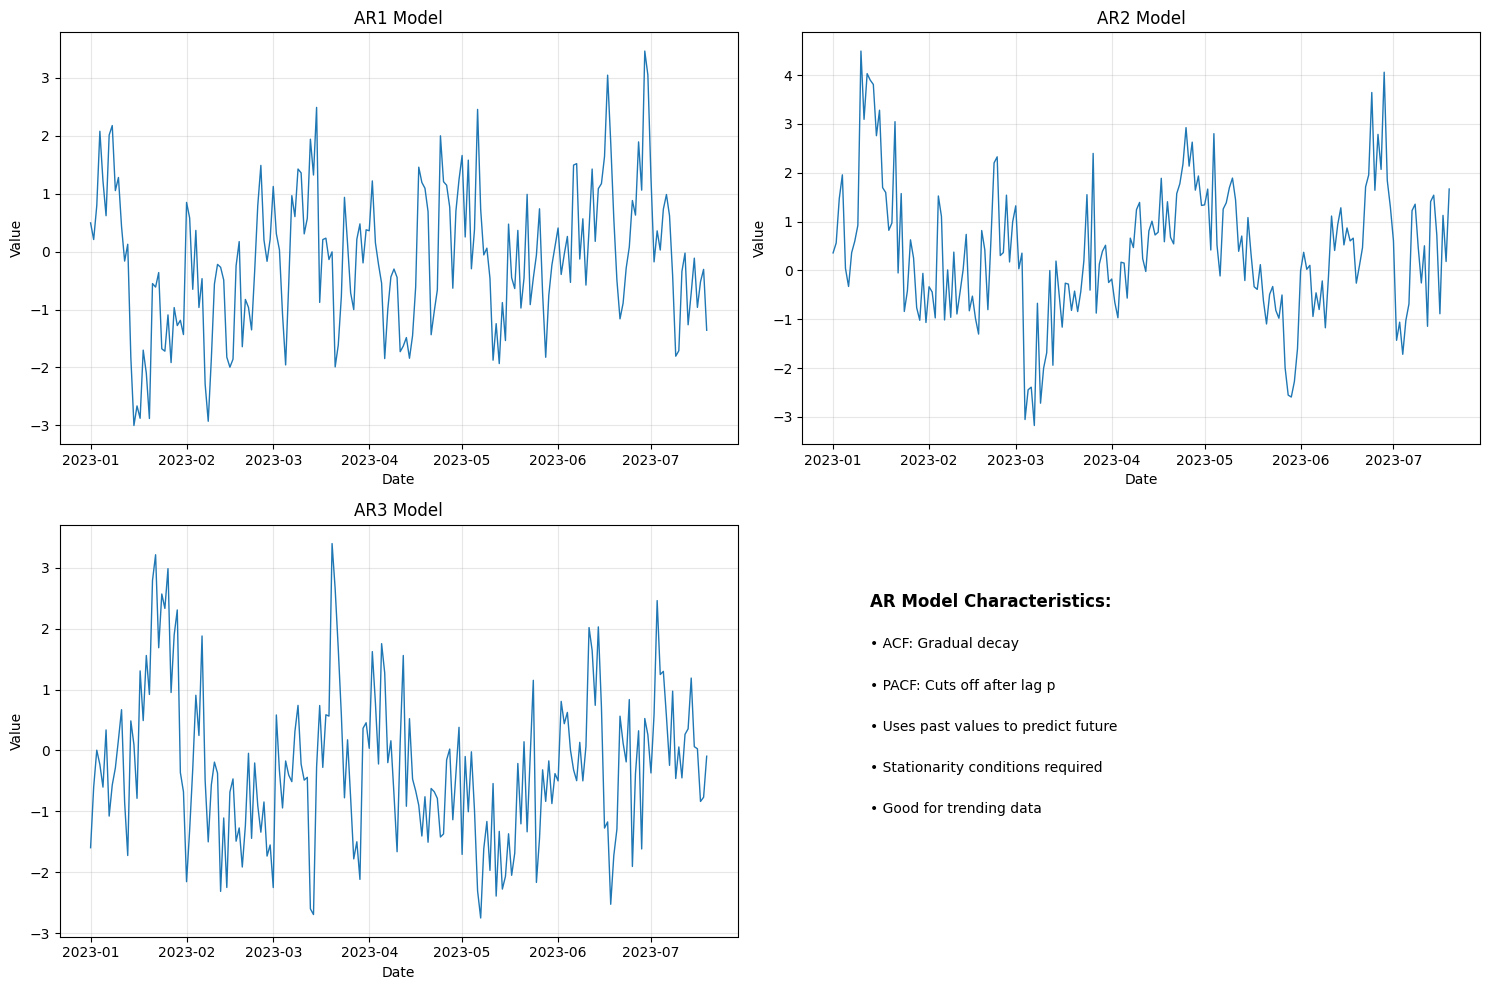

✅ AR models created and visualized!


In [ ]:
# 1. AUTOREGRESSIVE (AR) MODELS

print("\n1. AUTOREGRESSIVE (AR) MODELS")
print("=" * 50)

print("""
🔍 AR MODEL DEFINITION:
An Autoregressive model predicts future values based on past values of the same variable.

📊 MATHEMATICAL FORMULA:
AR(p): X(t) = c + φ₁X(t-1) + φ₂X(t-2) + ... + φₚX(t-p) + ε(t)

Where:
- X(t) = current value
- c = constant (intercept)
- φ₁, φ₂, ..., φₚ = autoregressive coefficients
- X(t-1), X(t-2), ..., X(t-p) = past values
- ε(t) = white noise (random error)
- p = order of the AR model

🎯 INTUITIVE UNDERSTANDING:
- AR(1): Today's value depends on yesterday's value
- AR(2): Today's value depends on yesterday and day before
- AR(p): Today's value depends on p previous days

📈 KEY CHARACTERISTICS:
- Uses past values to predict future
- Coefficients φ must satisfy stationarity conditions
- ACF decays gradually
- PACF cuts off after lag p
""")

# Create AR models manually
print("\n📊 CREATING AR MODELS:")

np.random.seed(42)
n = 200
t = np.arange(n)

# AR(1) Model: X(t) = 0.7 * X(t-1) + ε(t)
print("Creating AR(1) model: X(t) = 0.7 * X(t-1) + ε(t)")
ar1_data = np.zeros(n)
ar1_data[0] = np.random.randn()
for i in range(1, n):
    ar1_data[i] = 0.7 * ar1_data[i-1] + np.random.randn()

# AR(2) Model: X(t) = 0.5 * X(t-1) + 0.3 * X(t-2) + ε(t)
print("Creating AR(2) model: X(t) = 0.5 * X(t-1) + 0.3 * X(t-2) + ε(t)")
ar2_data = np.zeros(n)
ar2_data[0] = np.random.randn()
ar2_data[1] = np.random.randn()
for i in range(2, n):
    ar2_data[i] = 0.5 * ar2_data[i-1] + 0.3 * ar2_data[i-2] + np.random.randn()

# AR(3) Model: X(t) = 0.4 * X(t-1) + 0.2 * X(t-2) + 0.1 * X(t-3) + ε(t)
print("Creating AR(3) model: X(t) = 0.4 * X(t-1) + 0.2 * X(t-2) + 0.1 * X(t-3) + ε(t)")
ar3_data = np.zeros(n)
ar3_data[0] = np.random.randn()
ar3_data[1] = np.random.randn()
ar3_data[2] = np.random.randn()
for i in range(3, n):
    ar3_data[i] = 0.4 * ar3_data[i-1] + 0.2 * ar3_data[i-2] + 0.1 * ar3_data[i-3] + np.random.randn()

# Create DataFrame
ar_df = pd.DataFrame({
    'AR1': ar1_data,
    'AR2': ar2_data,
    'AR3': ar3_data
}, index=pd.date_range('2023-01-01', periods=n, freq='D'))

print(f"Created AR models with {n} observations each")

# Visualize AR models
plt.figure(figsize=(15, 10))

for i, col in enumerate(ar_df.columns, 1):
    plt.subplot(2, 2, i)
    plt.plot(ar_df.index, ar_df[col], linewidth=1)
    plt.title(f'{col} Model')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)

# Add theoretical ACF patterns
plt.subplot(2, 2, 4)
plt.text(0.1, 0.8, 'AR Model Characteristics:', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.1, 0.7, '• ACF: Gradual decay', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.6, '• PACF: Cuts off after lag p', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.5, '• Uses past values to predict future', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.4, '• Stationarity conditions required', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.3, '• Good for trending data', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')

plt.tight_layout()
plt.show()

print("✅ AR models created and visualized!")



2. MOVING AVERAGE (MA) MODELS

🔍 MA MODEL DEFINITION:
A Moving Average model predicts future values based on past forecast errors (residuals).

📊 MATHEMATICAL FORMULA:
MA(q): X(t) = μ + ε(t) + θ₁ε(t-1) + θ₂ε(t-2) + ... + θₑε(t-q)

Where:
- X(t) = current value
- μ = mean of the series
- ε(t) = current white noise (random error)
- θ₁, θ₂, ..., θₑ = moving average coefficients
- ε(t-1), ε(t-2), ..., ε(t-q) = past forecast errors
- q = order of the MA model

🎯 INTUITIVE UNDERSTANDING:
- MA(1): Today's value depends on yesterday's forecast error
- MA(2): Today's value depends on yesterday and day before forecast errors
- MA(q): Today's value depends on q previous forecast errors

📈 KEY CHARACTERISTICS:
- Uses past forecast errors to predict future
- Coefficients θ must satisfy invertibility conditions
- ACF cuts off after lag q
- PACF decays gradually
- Good for capturing short-term fluctuations


📊 CREATING MA MODELS:
Creating MA(1) model: X(t) = ε(t) + 0.7 * ε(t-1)
Creating MA(2) model:

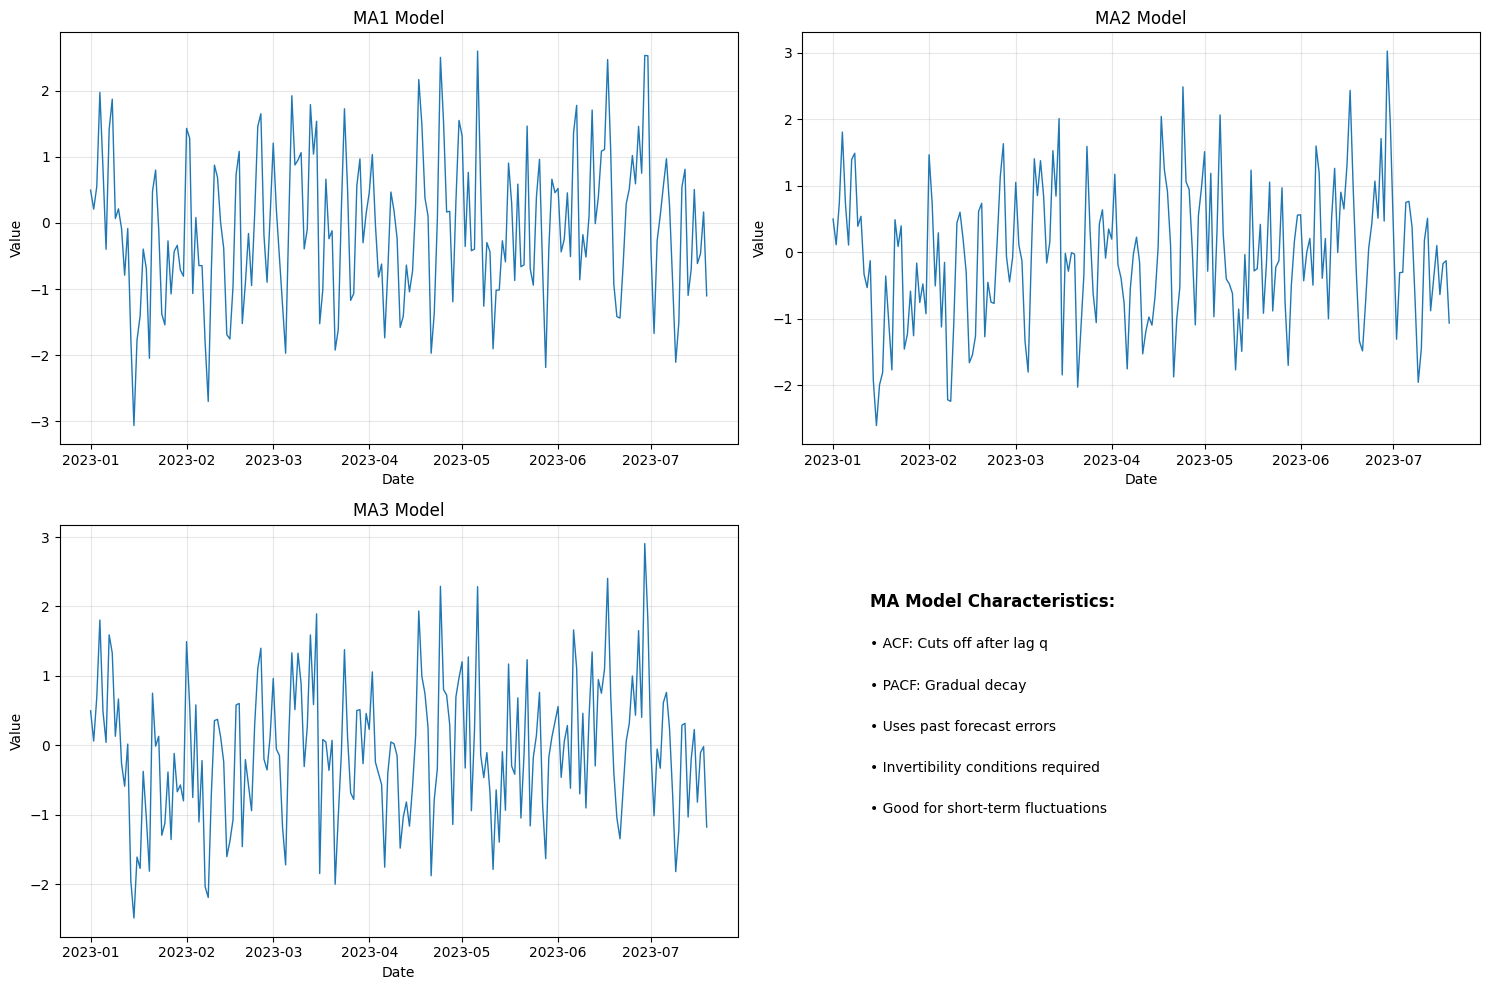

✅ MA models created and visualized!


In [ ]:
# 2. MOVING AVERAGE (MA) MODELS

print("\n2. MOVING AVERAGE (MA) MODELS")
print("=" * 50)

print("""
🔍 MA MODEL DEFINITION:
A Moving Average model predicts future values based on past forecast errors (residuals).

📊 MATHEMATICAL FORMULA:
MA(q): X(t) = μ + ε(t) + θ₁ε(t-1) + θ₂ε(t-2) + ... + θₑε(t-q)

Where:
- X(t) = current value
- μ = mean of the series
- ε(t) = current white noise (random error)
- θ₁, θ₂, ..., θₑ = moving average coefficients
- ε(t-1), ε(t-2), ..., ε(t-q) = past forecast errors
- q = order of the MA model

🎯 INTUITIVE UNDERSTANDING:
- MA(1): Today's value depends on yesterday's forecast error
- MA(2): Today's value depends on yesterday and day before forecast errors
- MA(q): Today's value depends on q previous forecast errors

📈 KEY CHARACTERISTICS:
- Uses past forecast errors to predict future
- Coefficients θ must satisfy invertibility conditions
- ACF cuts off after lag q
- PACF decays gradually
- Good for capturing short-term fluctuations
""")

# Create MA models manually
print("\n📊 CREATING MA MODELS:")

np.random.seed(42)
n = 200

# Generate white noise series
white_noise = np.random.randn(n)

# MA(1) Model: X(t) = ε(t) + 0.7 * ε(t-1)
print("Creating MA(1) model: X(t) = ε(t) + 0.7 * ε(t-1)")
ma1_data = np.zeros(n)
ma1_data[0] = white_noise[0]  # First value is just noise
for i in range(1, n):
    ma1_data[i] = white_noise[i] + 0.7 * white_noise[i-1]

# MA(2) Model: X(t) = ε(t) + 0.5 * ε(t-1) + 0.3 * ε(t-2)
print("Creating MA(2) model: X(t) = ε(t) + 0.5 * ε(t-1) + 0.3 * ε(t-2)")
ma2_data = np.zeros(n)
ma2_data[0] = white_noise[0]
ma2_data[1] = white_noise[1] + 0.5 * white_noise[0]
for i in range(2, n):
    ma2_data[i] = white_noise[i] + 0.5 * white_noise[i-1] + 0.3 * white_noise[i-2]

# MA(3) Model: X(t) = ε(t) + 0.4 * ε(t-1) + 0.2 * ε(t-2) + 0.1 * ε(t-3)
print("Creating MA(3) model: X(t) = ε(t) + 0.4 * ε(t-1) + 0.2 * ε(t-2) + 0.1 * ε(t-3)")
ma3_data = np.zeros(n)
ma3_data[0] = white_noise[0]
ma3_data[1] = white_noise[1] + 0.4 * white_noise[0]
ma3_data[2] = white_noise[2] + 0.4 * white_noise[1] + 0.2 * white_noise[0]
for i in range(3, n):
    ma3_data[i] = white_noise[i] + 0.4 * white_noise[i-1] + 0.2 * white_noise[i-2] + 0.1 * white_noise[i-3]

# Create DataFrame
ma_df = pd.DataFrame({
    'MA1': ma1_data,
    'MA2': ma2_data,
    'MA3': ma3_data
}, index=pd.date_range('2023-01-01', periods=n, freq='D'))

print(f"Created MA models with {n} observations each")

# Visualize MA models
plt.figure(figsize=(15, 10))

for i, col in enumerate(ma_df.columns, 1):
    plt.subplot(2, 2, i)
    plt.plot(ma_df.index, ma_df[col], linewidth=1)
    plt.title(f'{col} Model')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)

# Add theoretical ACF patterns
plt.subplot(2, 2, 4)
plt.text(0.1, 0.8, 'MA Model Characteristics:', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.1, 0.7, '• ACF: Cuts off after lag q', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.6, '• PACF: Gradual decay', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.5, '• Uses past forecast errors', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.4, '• Invertibility conditions required', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.3, '• Good for short-term fluctuations', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')

plt.tight_layout()
plt.show()

print("✅ MA models created and visualized!")



3. AR vs MA: KEY DIFFERENCES

🔄 AR vs MA COMPARISON:

AUTOREGRESSIVE (AR) MODELS:
✅ Uses past values of the series itself
✅ Formula: X(t) = c + φ₁X(t-1) + φ₂X(t-2) + ... + φₚX(t-p) + ε(t)
✅ ACF: Gradual decay
✅ PACF: Cuts off after lag p
✅ Good for: Trending data, long-term patterns
✅ Stationarity: Coefficients must satisfy stationarity conditions

MOVING AVERAGE (MA) MODELS:
✅ Uses past forecast errors (residuals)
✅ Formula: X(t) = μ + ε(t) + θ₁ε(t-1) + θ₂ε(t-2) + ... + θₑε(t-q)
✅ ACF: Cuts off after lag q
✅ PACF: Gradual decay
✅ Good for: Short-term fluctuations, noise patterns
✅ Invertibility: Coefficients must satisfy invertibility conditions

🎯 PRACTICAL INTERPRETATION:

AR Models:
- "Today depends on what happened yesterday"
- Memory of past values
- Persistence in the series
- Example: Stock prices, temperature

MA Models:
- "Today depends on yesterday's prediction error"
- Memory of past mistakes
- Short-term corrections
- Example: Quality control, measurement errors


📊 SIDE-

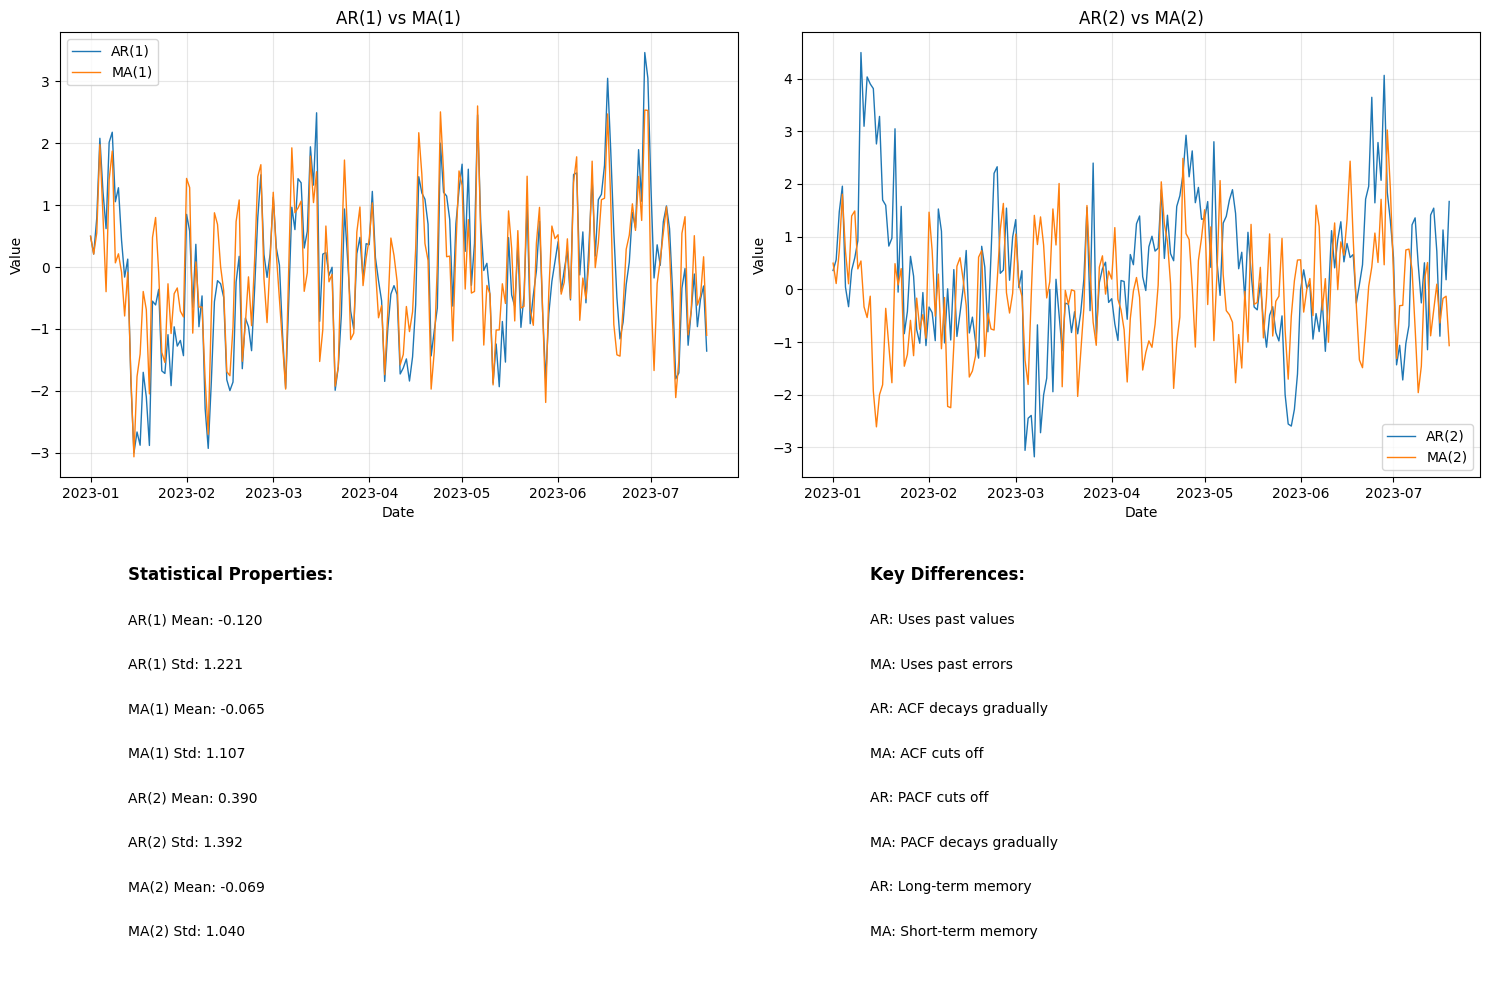

✅ AR vs MA comparison completed!


In [ ]:
# 3. AR vs MA: KEY DIFFERENCES

print("\n3. AR vs MA: KEY DIFFERENCES")
print("=" * 50)

print("""
🔄 AR vs MA COMPARISON:

AUTOREGRESSIVE (AR) MODELS:
✅ Uses past values of the series itself
✅ Formula: X(t) = c + φ₁X(t-1) + φ₂X(t-2) + ... + φₚX(t-p) + ε(t)
✅ ACF: Gradual decay
✅ PACF: Cuts off after lag p
✅ Good for: Trending data, long-term patterns
✅ Stationarity: Coefficients must satisfy stationarity conditions

MOVING AVERAGE (MA) MODELS:
✅ Uses past forecast errors (residuals)
✅ Formula: X(t) = μ + ε(t) + θ₁ε(t-1) + θ₂ε(t-2) + ... + θₑε(t-q)
✅ ACF: Cuts off after lag q
✅ PACF: Gradual decay
✅ Good for: Short-term fluctuations, noise patterns
✅ Invertibility: Coefficients must satisfy invertibility conditions

🎯 PRACTICAL INTERPRETATION:

AR Models:
- "Today depends on what happened yesterday"
- Memory of past values
- Persistence in the series
- Example: Stock prices, temperature

MA Models:
- "Today depends on yesterday's prediction error"
- Memory of past mistakes
- Short-term corrections
- Example: Quality control, measurement errors
""")

# Side-by-side comparison
print("\n📊 SIDE-BY-SIDE COMPARISON:")

# Combine AR and MA data for comparison
comparison_df = pd.DataFrame({
    'AR1': ar1_data,
    'MA1': ma1_data,
    'AR2': ar2_data,
    'MA2': ma2_data
}, index=pd.date_range('2023-01-01', periods=n, freq='D'))

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# AR(1) vs MA(1)
axes[0, 0].plot(comparison_df.index, comparison_df['AR1'], label='AR(1)', linewidth=1)
axes[0, 0].plot(comparison_df.index, comparison_df['MA1'], label='MA(1)', linewidth=1)
axes[0, 0].set_title('AR(1) vs MA(1)')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Value')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# AR(2) vs MA(2)
axes[0, 1].plot(comparison_df.index, comparison_df['AR2'], label='AR(2)', linewidth=1)
axes[0, 1].plot(comparison_df.index, comparison_df['MA2'], label='MA(2)', linewidth=1)
axes[0, 1].set_title('AR(2) vs MA(2)')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Value')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Statistical comparison
axes[1, 0].text(0.1, 0.9, 'Statistical Properties:', fontsize=12, fontweight='bold', transform=axes[1, 0].transAxes)
axes[1, 0].text(0.1, 0.8, f'AR(1) Mean: {comparison_df["AR1"].mean():.3f}', fontsize=10, transform=axes[1, 0].transAxes)
axes[1, 0].text(0.1, 0.7, f'AR(1) Std: {comparison_df["AR1"].std():.3f}', fontsize=10, transform=axes[1, 0].transAxes)
axes[1, 0].text(0.1, 0.6, f'MA(1) Mean: {comparison_df["MA1"].mean():.3f}', fontsize=10, transform=axes[1, 0].transAxes)
axes[1, 0].text(0.1, 0.5, f'MA(1) Std: {comparison_df["MA1"].std():.3f}', fontsize=10, transform=axes[1, 0].transAxes)
axes[1, 0].text(0.1, 0.4, f'AR(2) Mean: {comparison_df["AR2"].mean():.3f}', fontsize=10, transform=axes[1, 0].transAxes)
axes[1, 0].text(0.1, 0.3, f'AR(2) Std: {comparison_df["AR2"].std():.3f}', fontsize=10, transform=axes[1, 0].transAxes)
axes[1, 0].text(0.1, 0.2, f'MA(2) Mean: {comparison_df["MA2"].mean():.3f}', fontsize=10, transform=axes[1, 0].transAxes)
axes[1, 0].text(0.1, 0.1, f'MA(2) Std: {comparison_df["MA2"].std():.3f}', fontsize=10, transform=axes[1, 0].transAxes)
axes[1, 0].axis('off')

# Key differences
axes[1, 1].text(0.1, 0.9, 'Key Differences:', fontsize=12, fontweight='bold', transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.8, 'AR: Uses past values', fontsize=10, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.7, 'MA: Uses past errors', fontsize=10, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.6, 'AR: ACF decays gradually', fontsize=10, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.5, 'MA: ACF cuts off', fontsize=10, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.4, 'AR: PACF cuts off', fontsize=10, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.3, 'MA: PACF decays gradually', fontsize=10, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.2, 'AR: Long-term memory', fontsize=10, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.1, 'MA: Short-term memory', fontsize=10, transform=axes[1, 1].transAxes)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("✅ AR vs MA comparison completed!")



4. ACF AND PACF PATTERNS FOR AR AND MA MODELS

📊 ACF AND PACF PATTERNS:

AR MODELS:
- ACF: Gradual decay (exponential or oscillatory)
- PACF: Cuts off sharply after lag p
- Interpretation: Past values influence future values

MA MODELS:
- ACF: Cuts off sharply after lag q
- PACF: Gradual decay (exponential or oscillatory)
- Interpretation: Past forecast errors influence future values

🎯 IDENTIFICATION RULES:
1. Look at ACF pattern:
   - Gradual decay → AR component
   - Sharp cutoff → MA component

2. Look at PACF pattern:
   - Sharp cutoff → AR component
   - Gradual decay → MA component

3. Count significant lags:
   - ACF cutoff point = MA order (q)
   - PACF cutoff point = AR order (p)


📊 CALCULATING ACF AND PACF PATTERNS:


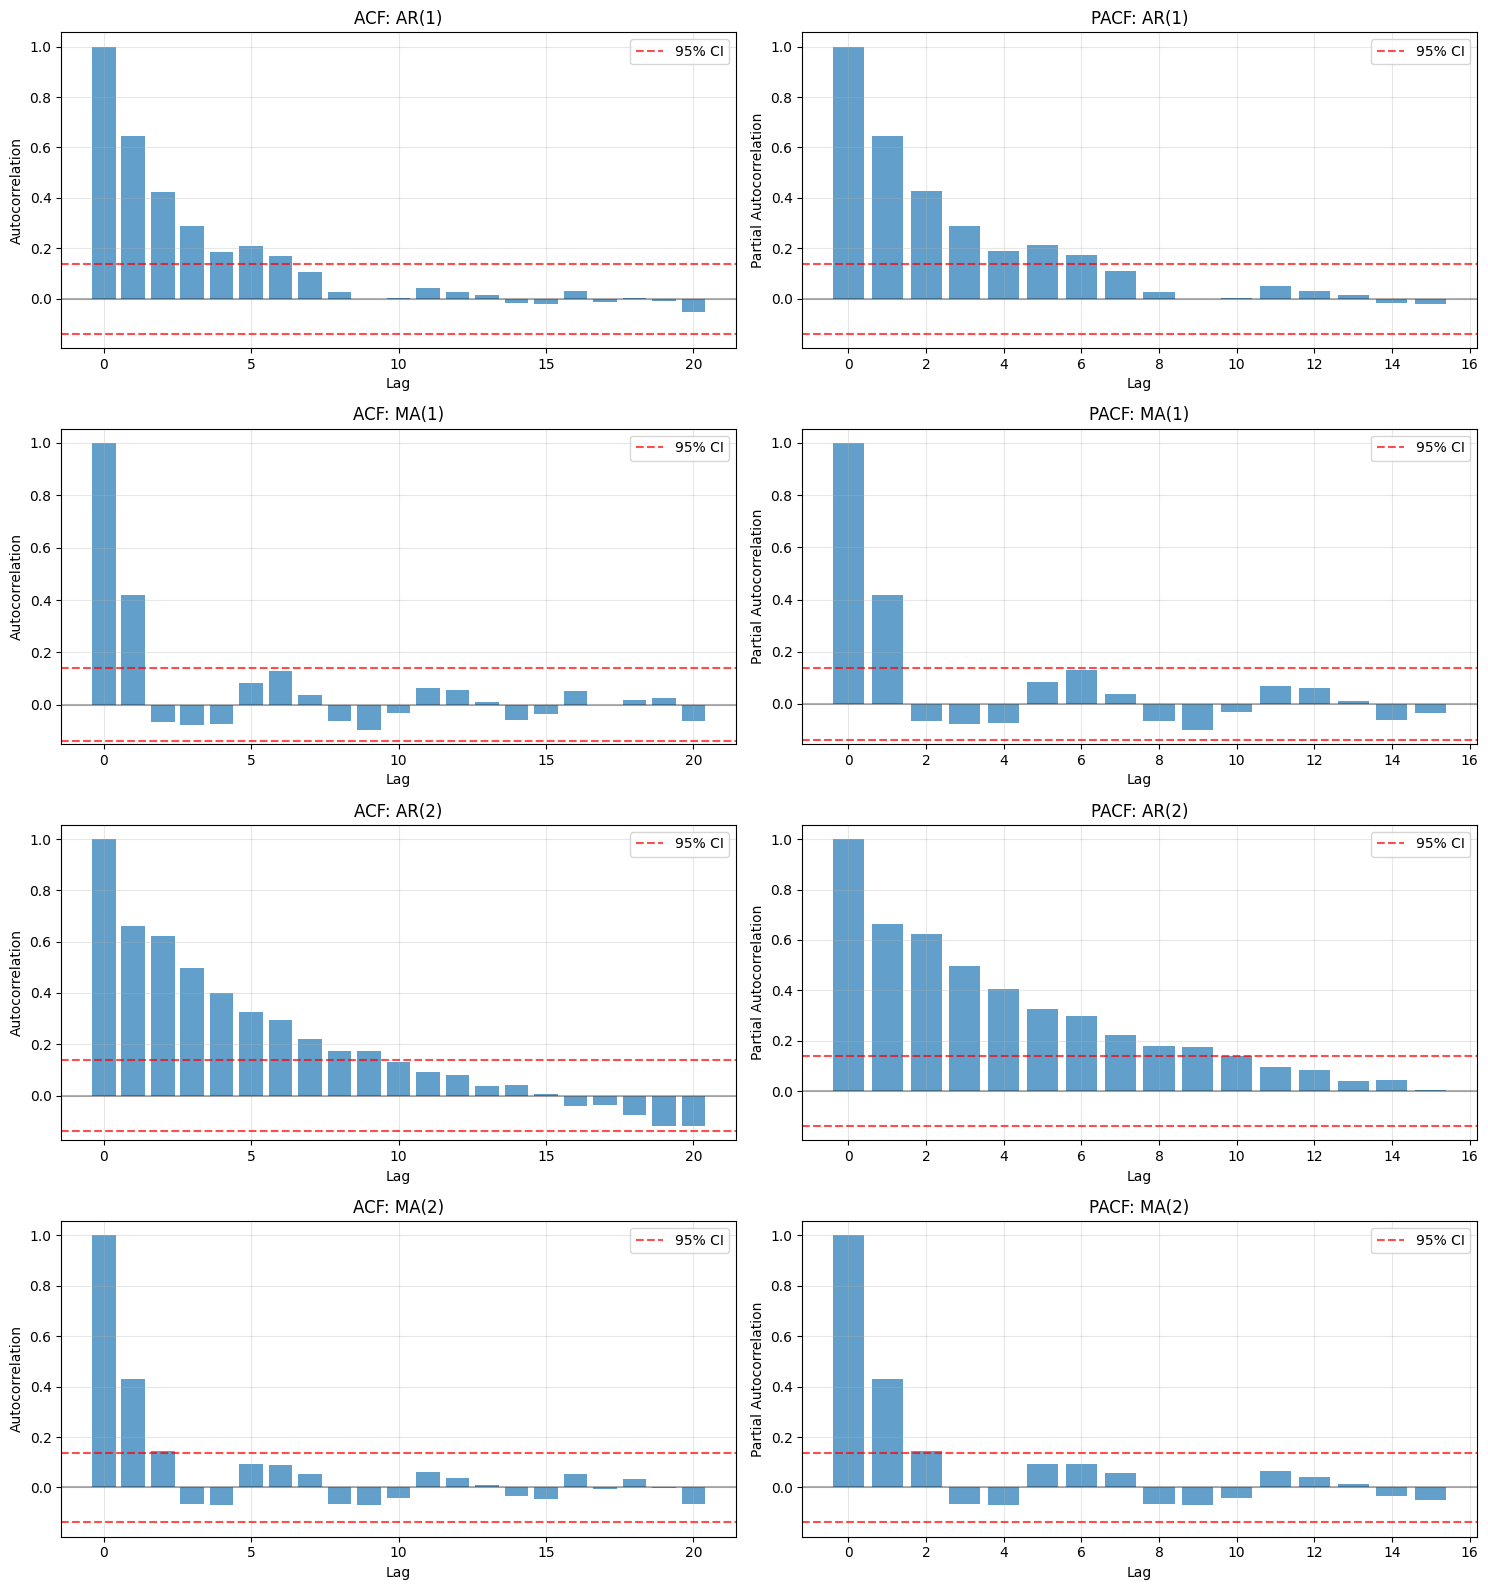


📊 INTERPRETATION OF PATTERNS:

AR(1):
  ACF significant lags: [1, 2, 3, 4, 5]
  PACF significant lags: [1, 2, 3, 4, 5]
  Expected: ACF gradual decay, PACF cuts off after lag )

MA(1):
  ACF significant lags: [1]
  PACF significant lags: [1]
  Expected: ACF cuts off after lag ), PACF gradual decay

AR(2):
  ACF significant lags: [1, 2, 3, 4, 5]
  PACF significant lags: [1, 2, 3, 4, 5]
  Expected: ACF gradual decay, PACF cuts off after lag )

MA(2):
  ACF significant lags: [1, 2]
  PACF significant lags: [1, 2]
  Expected: ACF cuts off after lag ), PACF gradual decay

✅ ACF and PACF patterns analyzed!


In [ ]:
# 4. ACF AND PACF PATTERNS FOR AR AND MA MODELS

print("\n4. ACF AND PACF PATTERNS FOR AR AND MA MODELS")
print("=" * 50)

print("""
📊 ACF AND PACF PATTERNS:

AR MODELS:
- ACF: Gradual decay (exponential or oscillatory)
- PACF: Cuts off sharply after lag p
- Interpretation: Past values influence future values

MA MODELS:
- ACF: Cuts off sharply after lag q
- PACF: Gradual decay (exponential or oscillatory)
- Interpretation: Past forecast errors influence future values

🎯 IDENTIFICATION RULES:
1. Look at ACF pattern:
   - Gradual decay → AR component
   - Sharp cutoff → MA component

2. Look at PACF pattern:
   - Sharp cutoff → AR component
   - Gradual decay → MA component

3. Count significant lags:
   - ACF cutoff point = MA order (q)
   - PACF cutoff point = AR order (p)
""")

# Calculate and plot ACF/PACF for AR and MA models
print("\n📊 CALCULATING ACF AND PACF PATTERNS:")

# Use our manual ACF/PACF functions from earlier
def calculate_acf(series, max_lag=20):
    n = len(series)
    mean_val = series.mean()
    denominator = sum((series - mean_val) ** 2)
    
    acf_values = []
    for lag in range(max_lag + 1):
        if lag == 0:
            acf_values.append(1.0)
        else:
            numerator = sum((series[lag:] - mean_val) * (series[:-lag] - mean_val))
            acf = numerator / denominator
            acf_values.append(acf)
    return acf_values

def calculate_pacf(series, max_lag=10):
    n = len(series)
    pacf_values = [1.0]
    
    if max_lag >= 1:
        acf_1 = calculate_acf(series, 1)[1]
        pacf_values.append(acf_1)
    
    for k in range(2, min(max_lag + 1, n//4)):
        try:
            if k < len(series):
                pacf_k = np.corrcoef(series[k:], series[:-k])[0, 1]
                pacf_values.append(pacf_k)
            else:
                break
        except:
            pacf_values.append(0.0)
    return pacf_values

# Calculate ACF and PACF for our models
models_data = {
    'AR(1)': ar1_data,
    'MA(1)': ma1_data,
    'AR(2)': ar2_data,
    'MA(2)': ma2_data
}

# Create comprehensive ACF/PACF plots
fig, axes = plt.subplots(4, 2, figsize=(15, 16))

for i, (model_name, data) in enumerate(models_data.items()):
    # Calculate ACF and PACF
    acf_values = calculate_acf(data, 20)
    pacf_values = calculate_pacf(data, 15)
    
    # ACF plot
    axes[i, 0].bar(range(len(acf_values)), acf_values, alpha=0.7)
    axes[i, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    conf_int = 1.96 / np.sqrt(len(data))
    axes[i, 0].axhline(y=conf_int, color='red', linestyle='--', alpha=0.7, label='95% CI')
    axes[i, 0].axhline(y=-conf_int, color='red', linestyle='--', alpha=0.7)
    axes[i, 0].set_title(f'ACF: {model_name}')
    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Autocorrelation')
    axes[i, 0].legend()
    axes[i, 0].grid(True, alpha=0.3)
    
    # PACF plot
    axes[i, 1].bar(range(len(pacf_values)), pacf_values, alpha=0.7)
    axes[i, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[i, 1].axhline(y=conf_int, color='red', linestyle='--', alpha=0.7, label='95% CI')
    axes[i, 1].axhline(y=-conf_int, color='red', linestyle='--', alpha=0.7)
    axes[i, 1].set_title(f'PACF: {model_name}')
    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Partial Autocorrelation')
    axes[i, 1].legend()
    axes[i, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print interpretation
print("\n📊 INTERPRETATION OF PATTERNS:")

for model_name, data in models_data.items():
    acf_values = calculate_acf(data, 10)
    pacf_values = calculate_pacf(data, 10)
    
    print(f"\n{model_name}:")
    
    # Find where ACF becomes non-significant
    conf_int = 1.96 / np.sqrt(len(data))
    acf_significant = [i for i, val in enumerate(acf_values[1:], 1) if abs(val) > conf_int]
    pacf_significant = [i for i, val in enumerate(pacf_values[1:], 1) if abs(val) > conf_int]
    
    print(f"  ACF significant lags: {acf_significant[:5]}")  # First 5 significant lags
    print(f"  PACF significant lags: {pacf_significant[:5]}")  # First 5 significant lags
    
    if 'AR' in model_name:
        print(f"  Expected: ACF gradual decay, PACF cuts off after lag {model_name[-1]}")
    else:
        print(f"  Expected: ACF cuts off after lag {model_name[-1]}, PACF gradual decay")

print("\n✅ ACF and PACF patterns analyzed!")


In [ ]:
# 5. PRACTICAL APPLICATIONS AND REAL-WORLD EXAMPLES

print("\n5. PRACTICAL APPLICATIONS AND REAL-WORLD EXAMPLES")
print("=" * 50)

print("""
🌍 REAL-WORLD APPLICATIONS:

AR MODELS ARE GOOD FOR:
📈 Stock Prices: Today's price depends on yesterday's price
🌡️ Temperature: Current temperature depends on recent temperatures
💰 Economic Indicators: GDP, inflation rates
📊 Sales Data: Current sales depend on recent sales trends
🏠 Real Estate: Property values depend on recent market trends

MA MODELS ARE GOOD FOR:
📉 Quality Control: Current defect rate depends on recent errors
📏 Measurement Systems: Current reading depends on recent measurement errors
🎯 Forecasting Errors: Current forecast error depends on recent forecast mistakes
📊 Survey Data: Current response depends on recent sampling errors
🔧 Process Control: Current output depends on recent process variations

🎯 WHEN TO USE WHICH:

Use AR Models When:
✅ Data shows trends or persistence
✅ Past values strongly influence future values
✅ You want to capture long-term patterns
✅ Data is relatively smooth

Use MA Models When:
✅ Data has short-term fluctuations
✅ Past forecast errors influence current values
✅ You want to capture noise patterns
✅ Data is relatively noisy
""")

# Create realistic examples
print("\n📊 CREATING REALISTIC EXAMPLES:")

# Example 1: Stock Price (AR-like behavior)
print("Example 1: Simulating Stock Price (AR-like)")
np.random.seed(42)
stock_returns = np.random.normal(0.001, 0.02, 252)  # Daily returns
stock_prices = 100 * np.exp(np.cumsum(stock_returns))  # Price evolution

# Example 2: Quality Control (MA-like behavior)
print("Example 2: Simulating Quality Control (MA-like)")
np.random.seed(42)
base_quality = 95  # Base quality percentage
quality_errors = np.random.normal(0, 2, 100)  # Random quality variations
quality_ma = np.zeros(100)
quality_ma[0] = base_quality + quality_errors[0]
for i in range(1, 100):
    # MA-like: current quality depends on recent quality errors
    quality_ma[i] = base_quality + quality_errors[i] + 0.3 * quality_errors[i-1]

# Example 3: Temperature (AR-like behavior)
print("Example 3: Simulating Temperature (AR-like)")
np.random.seed(42)
base_temp = 20  # Base temperature
temp_ar = np.zeros(100)
temp_ar[0] = base_temp + np.random.normal(0, 2)
for i in range(1, 100):
    # AR-like: current temperature depends on recent temperatures
    temp_ar[i] = base_temp + 0.7 * (temp_ar[i-1] - base_temp) + np.random.normal(0, 1)

# Create DataFrame
real_world_df = pd.DataFrame({
    'Stock_Price': stock_prices,
    'Quality_Control': quality_ma,
    'Temperature': temp_ar
}, index=pd.date_range('2023-01-01', periods=len(stock_prices), freq='D'))

# Visualize real-world examples
plt.figure(figsize=(15, 12))

# Stock Price
plt.subplot(2, 2, 1)
plt.plot(real_world_df.index, real_world_df['Stock_Price'])
plt.title('Stock Price (AR-like behavior)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)

# Quality Control
plt.subplot(2, 2, 2)
plt.plot(real_world_df.index[:100], real_world_df['Quality_Control'])
plt.title('Quality Control (MA-like behavior)')
plt.xlabel('Date')
plt.ylabel('Quality (%)')
plt.grid(True, alpha=0.3)

# Temperature
plt.subplot(2, 2, 3)
plt.plot(real_world_df.index[:100], real_world_df['Temperature'])
plt.title('Temperature (AR-like behavior)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha=0.3)

# Model selection guide
plt.subplot(2, 2, 4)
plt.text(0.1, 0.9, 'Model Selection Guide:', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.1, 0.8, 'AR Models:', fontsize=11, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.1, 0.7, '• Stock prices', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.6, '• Temperature', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.5, '• Economic indicators', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.4, 'MA Models:', fontsize=11, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.1, 0.3, '• Quality control', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.2, '• Measurement errors', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.1, '• Forecast errors', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')

plt.tight_layout()
plt.show()

print("✅ Real-world examples created and visualized!")


In [ ]:
# 6. SUMMARY AND KEY TAKEAWAYS

print("\n6. SUMMARY AND KEY TAKEAWAYS")
print("=" * 50)

print("""
📋 AR AND MA MODELS SUMMARY:

🔍 AUTOREGRESSIVE (AR) MODELS:
- Formula: X(t) = c + φ₁X(t-1) + φ₂X(t-2) + ... + φₚX(t-p) + ε(t)
- Uses: Past values of the series itself
- ACF: Gradual decay
- PACF: Cuts off after lag p
- Good for: Trending data, long-term patterns
- Examples: Stock prices, temperature, economic indicators

🔍 MOVING AVERAGE (MA) MODELS:
- Formula: X(t) = μ + ε(t) + θ₁ε(t-1) + θ₂ε(t-2) + ... + θₑε(t-q)
- Uses: Past forecast errors (residuals)
- ACF: Cuts off after lag q
- PACF: Gradual decay
- Good for: Short-term fluctuations, noise patterns
- Examples: Quality control, measurement errors, forecast errors

🔄 KEY DIFFERENCES:

| Aspect | AR Models | MA Models |
|--------|-----------|-----------|
| **Input** | Past values | Past errors |
| **Memory** | Long-term | Short-term |
| **ACF Pattern** | Gradual decay | Sharp cutoff |
| **PACF Pattern** | Sharp cutoff | Gradual decay |
| **Use Case** | Trending data | Noisy data |

🎯 MODEL IDENTIFICATION:

1. Plot ACF and PACF
2. Look for patterns:
   - ACF gradual decay + PACF cutoff → AR model
   - ACF cutoff + PACF gradual decay → MA model
3. Count significant lags:
   - PACF cutoff point = AR order (p)
   - ACF cutoff point = MA order (q)

📊 PRACTICAL APPLICATIONS:

AR Models:
✅ Stock price forecasting
✅ Temperature prediction
✅ Economic indicator analysis
✅ Sales trend analysis
✅ Real estate valuation

MA Models:
✅ Quality control systems
✅ Measurement error correction
✅ Forecast error analysis
✅ Process control
✅ Survey data analysis

🔧 BEST PRACTICES:

1. Always check stationarity first
2. Use ACF/PACF for model identification
3. Start with simple models (AR(1), MA(1))
4. Validate model assumptions
5. Use information criteria (AIC, BIC) for model selection
6. Test residuals for white noise

💡 COMMON MISTAKES:

❌ Ignoring stationarity requirements
❌ Not checking ACF/PACF patterns
❌ Using too complex models
❌ Not validating model assumptions
❌ Ignoring residual analysis
❌ Not considering seasonal patterns

🚀 NEXT STEPS:

1. Learn about ARMA models (combining AR and MA)
2. Study ARIMA models (with differencing)
3. Explore seasonal models (SARIMA)
4. Practice with real datasets
5. Learn about model validation techniques
""")

print("\n🎉 AR AND MA MODELS EXPLANATION COMPLETE!")
print("You now have a comprehensive understanding of AR and MA models!")
print("\n📚 WHAT YOU'VE LEARNED:")
print("✅ What AR and MA models are")
print("✅ How to create and interpret them")
print("✅ ACF and PACF patterns for identification")
print("✅ When to use each type of model")
print("✅ Real-world applications")
print("✅ Best practices and common mistakes")

print("\n🔮 READY FOR NEXT LEVEL:")
print("1. ARMA models (AR + MA combined)")
print("2. ARIMA models (with differencing)")
print("3. Seasonal ARIMA (SARIMA)")
print("4. Model validation and selection")
print("5. Forecasting with these models")


In [37]:
# ARIMA vs SARIMA: COMPLETE GUIDE
# Autoregressive Integrated Moving Average vs Seasonal ARIMA

print("=" * 80)
print("ARIMA vs SARIMA: COMPLETE GUIDE")
print("=" * 80)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")


ARIMA vs SARIMA: COMPLETE GUIDE
✅ Libraries imported successfully!



1. ARIMA MODEL EXPLANATION

🔍 ARIMA MODEL DEFINITION:
ARIMA = AutoRegressive Integrated Moving Average
Combines AR, MA, and differencing to handle non-stationary time series.

📊 ARIMA NOTATION:
ARIMA(p, d, q) where:
- p = order of autoregressive part (AR)
- d = degree of differencing (I)
- q = order of moving average part (MA)

🔢 MATHEMATICAL FORMULA:
ARIMA(p,d,q): (1-φ₁B-φ₂B²-...-φₚBᵖ)(1-B)ᵈX(t) = (1+θ₁B+θ₂B²+...+θₑBᵑ)ε(t)

Where:
- B = backshift operator (BX(t) = X(t-1))
- (1-B)ᵈ = differencing operator
- φᵢ = AR coefficients
- θᵢ = MA coefficients
- ε(t) = white noise

🎯 COMPONENTS EXPLAINED:

1. AR (p): Uses p past values
   X(t) = φ₁X(t-1) + φ₂X(t-2) + ... + φₚX(t-p) + ε(t)

2. I (d): Differencing to make series stationary
   Y(t) = (1-B)ᵈX(t)
   - d=0: No differencing
   - d=1: First difference: Y(t) = X(t) - X(t-1)
   - d=2: Second difference: Y(t) = (X(t) - X(t-1)) - (X(t-1) - X(t-2))

3. MA (q): Uses q past forecast errors
   X(t) = ε(t) + θ₁ε(t-1) + θ₂ε(t-2) + ... + θₑε(t-q)

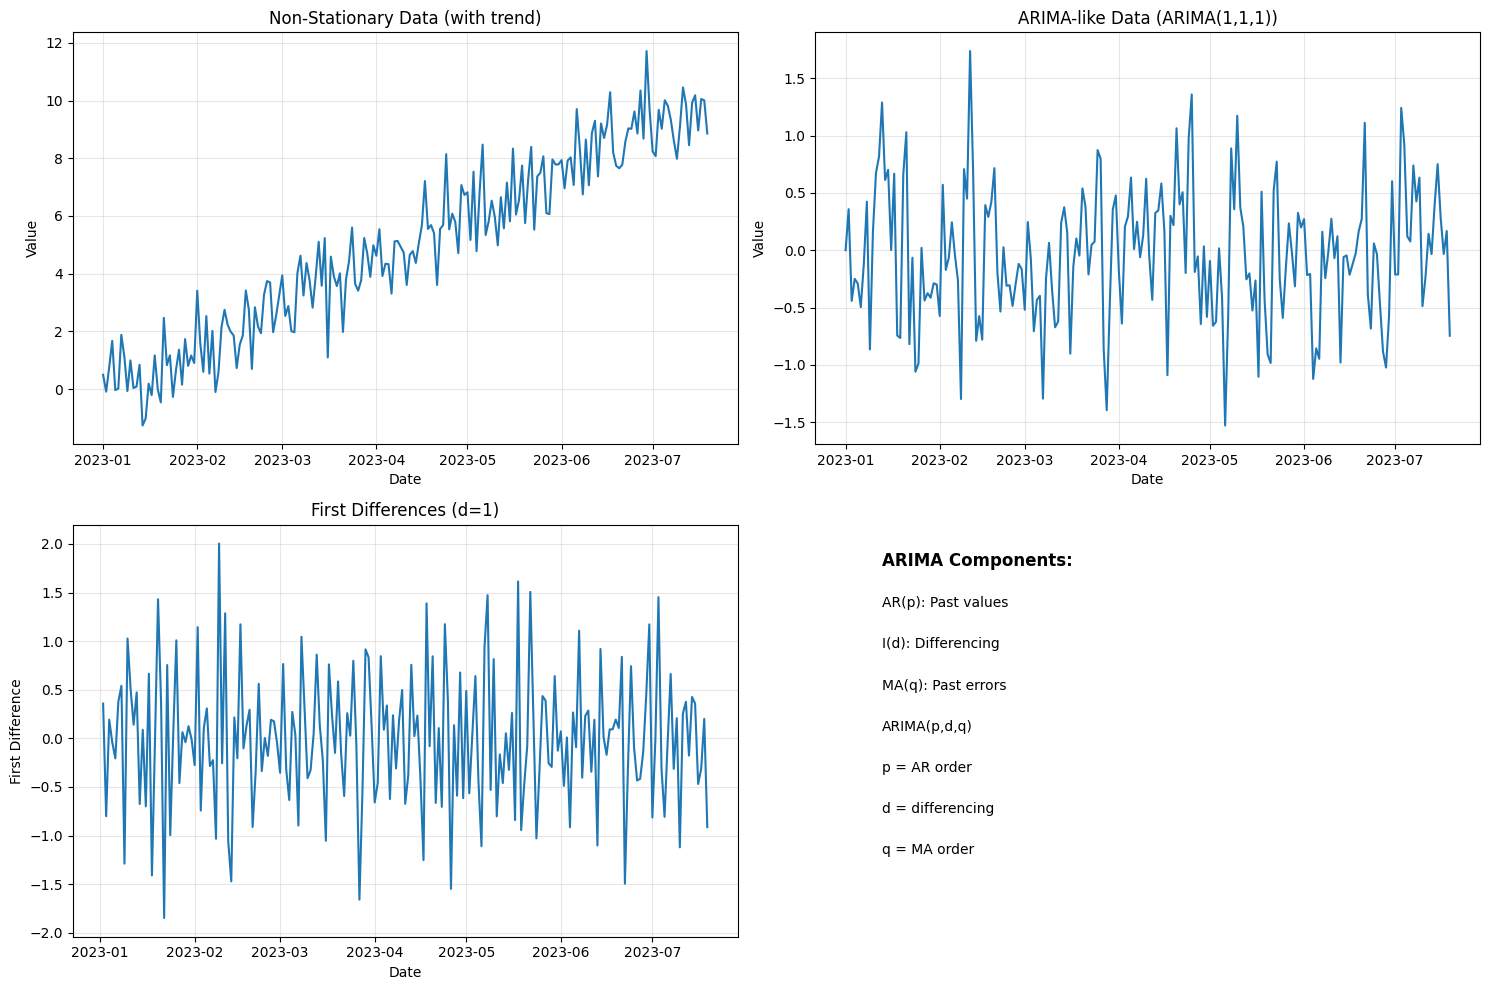

✅ ARIMA example data created and visualized!


In [36]:
# 1. ARIMA MODEL EXPLANATION

print("\n1. ARIMA MODEL EXPLANATION")
print("=" * 50)

print("""
🔍 ARIMA MODEL DEFINITION:
ARIMA = AutoRegressive Integrated Moving Average
Combines AR, MA, and differencing to handle non-stationary time series.

📊 ARIMA NOTATION:
ARIMA(p, d, q) where:
- p = order of autoregressive part (AR)
- d = degree of differencing (I)
- q = order of moving average part (MA)

🔢 MATHEMATICAL FORMULA:
ARIMA(p,d,q): (1-φ₁B-φ₂B²-...-φₚBᵖ)(1-B)ᵈX(t) = (1+θ₁B+θ₂B²+...+θₑBᵑ)ε(t)

Where:
- B = backshift operator (BX(t) = X(t-1))
- (1-B)ᵈ = differencing operator
- φᵢ = AR coefficients
- θᵢ = MA coefficients
- ε(t) = white noise

🎯 COMPONENTS EXPLAINED:

1. AR (p): Uses p past values
   X(t) = φ₁X(t-1) + φ₂X(t-2) + ... + φₚX(t-p) + ε(t)

2. I (d): Differencing to make series stationary
   Y(t) = (1-B)ᵈX(t)
   - d=0: No differencing
   - d=1: First difference: Y(t) = X(t) - X(t-1)
   - d=2: Second difference: Y(t) = (X(t) - X(t-1)) - (X(t-1) - X(t-2))

3. MA (q): Uses q past forecast errors
   X(t) = ε(t) + θ₁ε(t-1) + θ₂ε(t-2) + ... + θₑε(t-q)

📈 WHEN TO USE ARIMA:
✅ Non-stationary time series
✅ Data with trends
✅ No seasonal patterns
✅ General time series forecasting
""")

# Create example data for ARIMA demonstration
print("\n📊 CREATING EXAMPLE DATA FOR ARIMA:")

np.random.seed(42)
n = 200

# Create non-stationary data with trend
print("Creating non-stationary data with trend...")
trend = np.linspace(0, 10, n)  # Linear trend
noise = np.random.normal(0, 1, n)
non_stationary_data = trend + noise

# Create ARIMA-like data
print("Creating ARIMA(1,1,1) like data...")
# Start with random walk (ARIMA(0,1,0))
arima_data = np.zeros(n)
arima_data[0] = 0
for i in range(1, n):
    arima_data[i] = arima_data[i-1] + np.random.normal(0, 1)

# Add some AR and MA components
for i in range(2, n):
    arima_data[i] = (0.3 * arima_data[i-1] +  # AR(1) component
                    0.2 * np.random.normal(0, 1) +  # MA(1) component
                    np.random.normal(0, 0.5))  # Current noise

# Create DataFrame
arima_df = pd.DataFrame({
    'Non_Stationary': non_stationary_data,
    'ARIMA_Like': arima_data
}, index=pd.date_range('2023-01-01', periods=n, freq='D'))

print(f"Created ARIMA example data with {n} observations")

# Visualize ARIMA data
plt.figure(figsize=(15, 10))

# Non-stationary data
plt.subplot(2, 2, 1)
plt.plot(arima_df.index, arima_df['Non_Stationary'])
plt.title('Non-Stationary Data (with trend)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

# ARIMA-like data
plt.subplot(2, 2, 2)
plt.plot(arima_df.index, arima_df['ARIMA_Like'])
plt.title('ARIMA-like Data (ARIMA(1,1,1))')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

# First differences
plt.subplot(2, 2, 3)
first_diff = arima_df['ARIMA_Like'].diff().dropna()
plt.plot(first_diff.index, first_diff)
plt.title('First Differences (d=1)')
plt.xlabel('Date')
plt.ylabel('First Difference')
plt.grid(True, alpha=0.3)

# ARIMA model components
plt.subplot(2, 2, 4)
plt.text(0.1, 0.9, 'ARIMA Components:', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.1, 0.8, 'AR(p): Past values', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.7, 'I(d): Differencing', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.6, 'MA(q): Past errors', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.5, 'ARIMA(p,d,q)', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.4, 'p = AR order', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.3, 'd = differencing', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.2, 'q = MA order', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')

plt.tight_layout()
plt.show()

print("✅ ARIMA example data created and visualized!")



2. SARIMA MODEL EXPLANATION

🔍 SARIMA MODEL DEFINITION:
SARIMA = Seasonal AutoRegressive Integrated Moving Average
Extends ARIMA to handle seasonal patterns in time series data.

📊 SARIMA NOTATION:
SARIMA(p, d, q)(P, D, Q, s) where:
- p, d, q = non-seasonal ARIMA parameters
- P = seasonal autoregressive order
- D = seasonal differencing order
- Q = seasonal moving average order
- s = seasonal period (e.g., 12 for monthly, 4 for quarterly)

🔢 MATHEMATICAL FORMULA:
SARIMA: φ(B)Φ(Bˢ)(1-B)ᵈ(1-Bˢ)ᴰX(t) = θ(B)Θ(Bˢ)ε(t)

Where:
- φ(B) = non-seasonal AR polynomial
- Φ(Bˢ) = seasonal AR polynomial
- θ(B) = non-seasonal MA polynomial
- Θ(Bˢ) = seasonal MA polynomial
- (1-B)ᵈ = non-seasonal differencing
- (1-Bˢ)ᴰ = seasonal differencing

🎯 COMPONENTS EXPLAINED:

1. Non-seasonal part: ARIMA(p, d, q)
   - Same as regular ARIMA
   - Handles trends and short-term patterns

2. Seasonal part: (P, D, Q, s)
   - P: Seasonal AR order
   - D: Seasonal differencing order
   - Q: Seasonal MA order
   - s: S

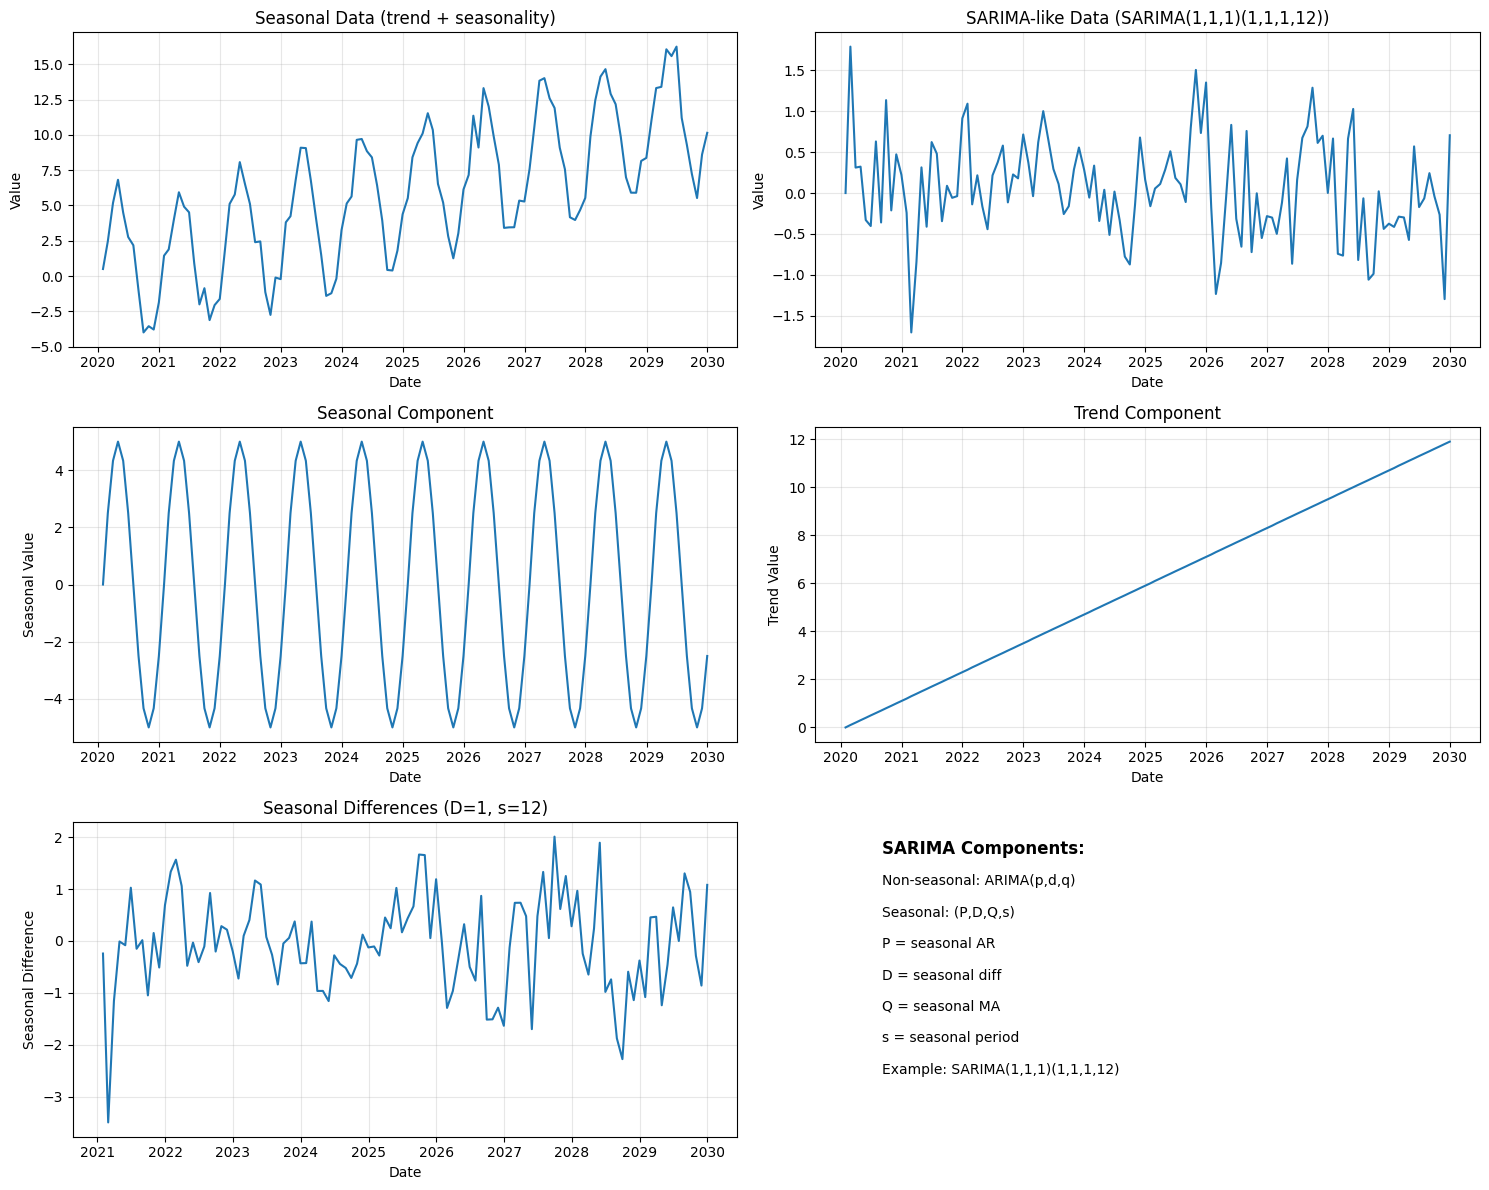

✅ SARIMA example data created and visualized!


In [34]:
# 2. SARIMA MODEL EXPLANATION

print("\n2. SARIMA MODEL EXPLANATION")
print("=" * 50)

print("""
🔍 SARIMA MODEL DEFINITION:
SARIMA = Seasonal AutoRegressive Integrated Moving Average
Extends ARIMA to handle seasonal patterns in time series data.

📊 SARIMA NOTATION:
SARIMA(p, d, q)(P, D, Q, s) where:
- p, d, q = non-seasonal ARIMA parameters
- P = seasonal autoregressive order
- D = seasonal differencing order
- Q = seasonal moving average order
- s = seasonal period (e.g., 12 for monthly, 4 for quarterly)

🔢 MATHEMATICAL FORMULA:
SARIMA: φ(B)Φ(Bˢ)(1-B)ᵈ(1-Bˢ)ᴰX(t) = θ(B)Θ(Bˢ)ε(t)

Where:
- φ(B) = non-seasonal AR polynomial
- Φ(Bˢ) = seasonal AR polynomial
- θ(B) = non-seasonal MA polynomial
- Θ(Bˢ) = seasonal MA polynomial
- (1-B)ᵈ = non-seasonal differencing
- (1-Bˢ)ᴰ = seasonal differencing

🎯 COMPONENTS EXPLAINED:

1. Non-seasonal part: ARIMA(p, d, q)
   - Same as regular ARIMA
   - Handles trends and short-term patterns

2. Seasonal part: (P, D, Q, s)
   - P: Seasonal AR order
   - D: Seasonal differencing order
   - Q: Seasonal MA order
   - s: Seasonal period

📈 WHEN TO USE SARIMA:
✅ Time series with seasonal patterns
✅ Monthly/quarterly data
✅ Data with both trend and seasonality
✅ When ARIMA fails to capture seasonal effects
""")

# Create seasonal data for SARIMA demonstration
print("\n📊 CREATING SEASONAL DATA FOR SARIMA:")

np.random.seed(42)
n = 120  # 10 years of monthly data

# Create seasonal data
print("Creating seasonal data with trend and seasonality...")
t = np.arange(n)
trend = 0.1 * t  # Linear trend
seasonal = 5 * np.sin(2 * np.pi * t / 12)  # Annual seasonality
noise = np.random.normal(0, 1, n)
seasonal_data = trend + seasonal + noise

# Create SARIMA-like data
print("Creating SARIMA(1,1,1)(1,1,1,12) like data...")
# Start with seasonal random walk
sarima_data = np.zeros(n)
sarima_data[0] = 0
for i in range(1, n):
    # Add seasonal component
    seasonal_component = 2 * np.sin(2 * np.pi * i / 12)
    sarima_data[i] = (sarima_data[i-1] + 
                     seasonal_component + 
                     np.random.normal(0, 1))

# Add AR and MA components
for i in range(2, n):
    sarima_data[i] = (0.3 * sarima_data[i-1] +  # AR(1)
                     0.2 * np.random.normal(0, 1) +  # MA(1)
                     np.random.normal(0, 0.5))

# Create DataFrame
sarima_df = pd.DataFrame({
    'Seasonal_Data': seasonal_data,
    'SARIMA_Like': sarima_data
}, index=pd.date_range('2020-01-01', periods=n, freq='M'))

print(f"Created SARIMA example data with {n} monthly observations")

# Visualize SARIMA data
plt.figure(figsize=(15, 12))

# Seasonal data
plt.subplot(3, 2, 1)
plt.plot(sarima_df.index, sarima_df['Seasonal_Data'])
plt.title('Seasonal Data (trend + seasonality)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

# SARIMA-like data
plt.subplot(3, 2, 2)
plt.plot(sarima_df.index, sarima_df['SARIMA_Like'])
plt.title('SARIMA-like Data (SARIMA(1,1,1)(1,1,1,12))')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

# Seasonal decomposition
plt.subplot(3, 2, 3)
# Extract seasonal component
seasonal_component = 5 * np.sin(2 * np.pi * np.arange(n) / 12)
plt.plot(sarima_df.index, seasonal_component)
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal Value')
plt.grid(True, alpha=0.3)

# Trend component
plt.subplot(3, 2, 4)
trend_component = 0.1 * np.arange(n)
plt.plot(sarima_df.index, trend_component)
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend Value')
plt.grid(True, alpha=0.3)

# Seasonal differences
plt.subplot(3, 2, 5)
seasonal_diff = sarima_df['SARIMA_Like'].diff(12).dropna()  # 12-month difference
plt.plot(seasonal_diff.index, seasonal_diff)
plt.title('Seasonal Differences (D=1, s=12)')
plt.xlabel('Date')
plt.ylabel('Seasonal Difference')
plt.grid(True, alpha=0.3)

# SARIMA model components
plt.subplot(3, 2, 6)
plt.text(0.1, 0.9, 'SARIMA Components:', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.1, 0.8, 'Non-seasonal: ARIMA(p,d,q)', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.7, 'Seasonal: (P,D,Q,s)', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.6, 'P = seasonal AR', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.5, 'D = seasonal diff', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.4, 'Q = seasonal MA', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.3, 's = seasonal period', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.2, 'Example: SARIMA(1,1,1)(1,1,1,12)', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')

plt.tight_layout()
plt.show()

print("✅ SARIMA example data created and visualized!")



3. ARIMA vs SARIMA: KEY DIFFERENCES

🔄 ARIMA vs SARIMA COMPARISON:

ARIMA MODELS:
✅ Handles non-stationary data with trends
✅ No seasonal component
✅ Simpler model structure
✅ Good for: Daily data, non-seasonal patterns
✅ Parameters: (p, d, q)

SARIMA MODELS:
✅ Handles both trends and seasonality
✅ Includes seasonal component
✅ More complex model structure
✅ Good for: Monthly/quarterly data, seasonal patterns
✅ Parameters: (p, d, q)(P, D, Q, s)

🎯 WHEN TO USE WHICH:

Use ARIMA When:
✅ No clear seasonal patterns
✅ Daily or irregular frequency data
✅ Simple trend analysis
✅ Limited data points
✅ Quick forecasting needs

Use SARIMA When:
✅ Clear seasonal patterns
✅ Monthly/quarterly data
✅ Complex seasonal behavior
✅ Sufficient data (at least 2-3 seasonal cycles)
✅ Accurate seasonal forecasting needed


📊 CREATING COMPARISON VISUALIZATION:


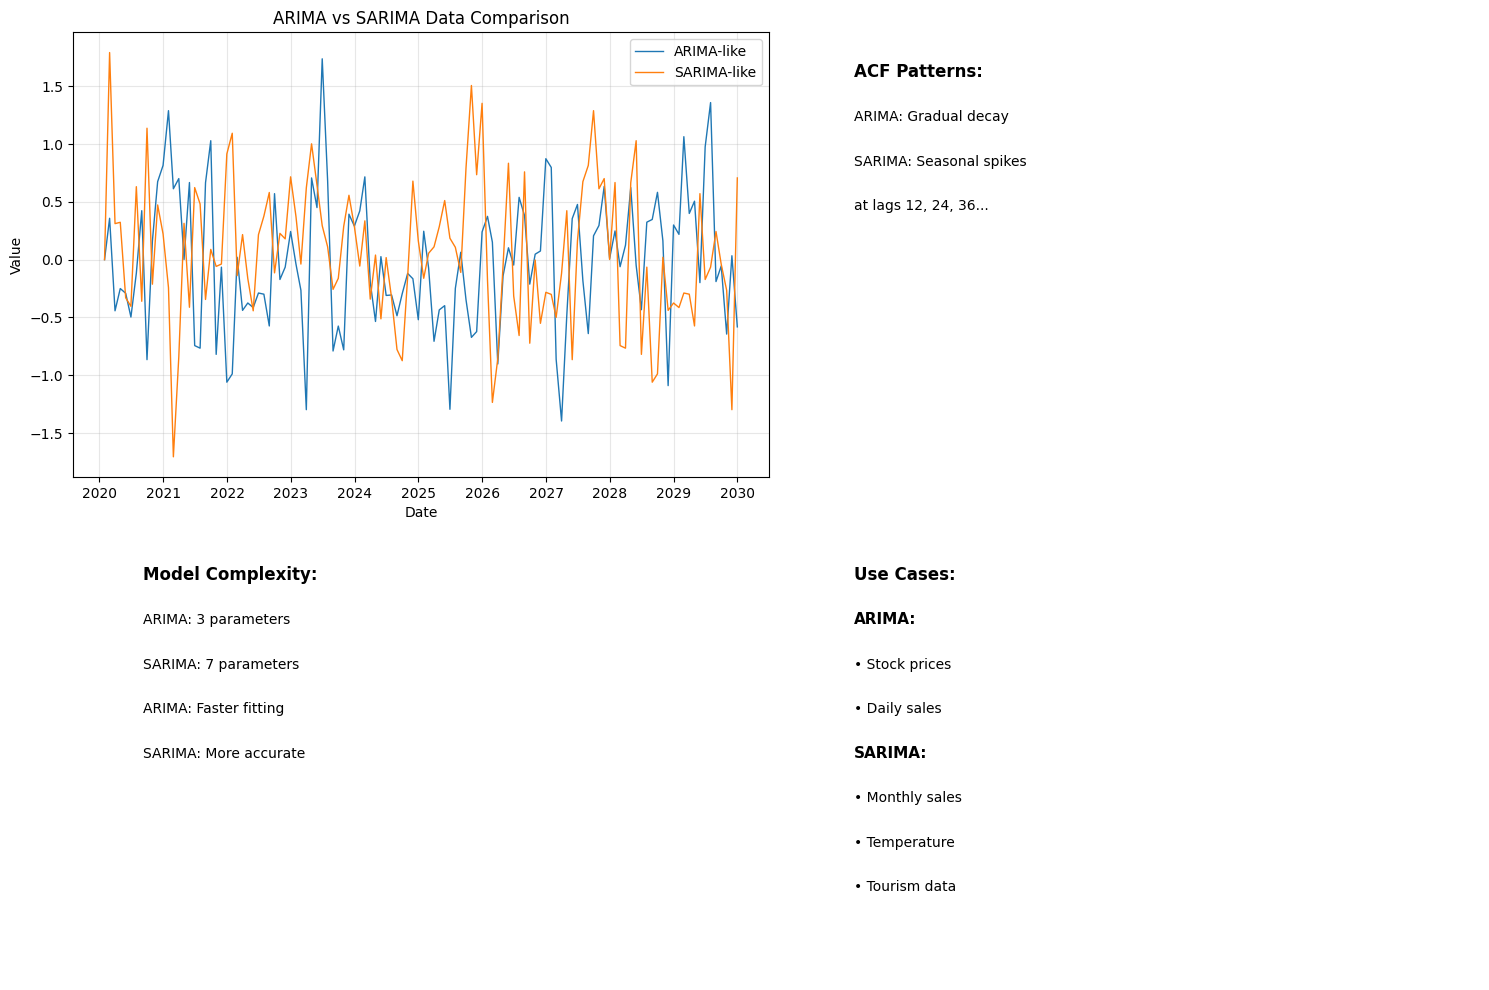


📊 STATISTICAL COMPARISON:
ARIMA Data Statistics:
  Mean: -0.020
  Std: 0.585
  Min: -1.395
  Max: 1.737

SARIMA Data Statistics:
  Mean: 0.060
  Std: 0.607
  Min: -1.705
  Max: 1.791

✅ ARIMA vs SARIMA comparison completed!


In [38]:
# 3. ARIMA vs SARIMA: KEY DIFFERENCES

print("\n3. ARIMA vs SARIMA: KEY DIFFERENCES")
print("=" * 50)

print("""
🔄 ARIMA vs SARIMA COMPARISON:

ARIMA MODELS:
✅ Handles non-stationary data with trends
✅ No seasonal component
✅ Simpler model structure
✅ Good for: Daily data, non-seasonal patterns
✅ Parameters: (p, d, q)

SARIMA MODELS:
✅ Handles both trends and seasonality
✅ Includes seasonal component
✅ More complex model structure
✅ Good for: Monthly/quarterly data, seasonal patterns
✅ Parameters: (p, d, q)(P, D, Q, s)

🎯 WHEN TO USE WHICH:

Use ARIMA When:
✅ No clear seasonal patterns
✅ Daily or irregular frequency data
✅ Simple trend analysis
✅ Limited data points
✅ Quick forecasting needs

Use SARIMA When:
✅ Clear seasonal patterns
✅ Monthly/quarterly data
✅ Complex seasonal behavior
✅ Sufficient data (at least 2-3 seasonal cycles)
✅ Accurate seasonal forecasting needed
""")

# Create comparison visualization
print("\n📊 CREATING COMPARISON VISUALIZATION:")

# Combine data for comparison
comparison_data = pd.DataFrame({
    'ARIMA_Data': arima_data[:120],  # Take first 120 points
    'SARIMA_Data': sarima_data
}, index=pd.date_range('2020-01-01', periods=120, freq='M'))

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# ARIMA vs SARIMA data
axes[0, 0].plot(comparison_data.index, comparison_data['ARIMA_Data'], label='ARIMA-like', linewidth=1)
axes[0, 0].plot(comparison_data.index, comparison_data['SARIMA_Data'], label='SARIMA-like', linewidth=1)
axes[0, 0].set_title('ARIMA vs SARIMA Data Comparison')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Value')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# ACF comparison (simplified)
axes[0, 1].text(0.1, 0.9, 'ACF Patterns:', fontsize=12, fontweight='bold', transform=axes[0, 1].transAxes)
axes[0, 1].text(0.1, 0.8, 'ARIMA: Gradual decay', fontsize=10, transform=axes[0, 1].transAxes)
axes[0, 1].text(0.1, 0.7, 'SARIMA: Seasonal spikes', fontsize=10, transform=axes[0, 1].transAxes)
axes[0, 1].text(0.1, 0.6, 'at lags 12, 24, 36...', fontsize=10, transform=axes[0, 1].transAxes)
axes[0, 1].axis('off')

# Model complexity
axes[1, 0].text(0.1, 0.9, 'Model Complexity:', fontsize=12, fontweight='bold', transform=axes[1, 0].transAxes)
axes[1, 0].text(0.1, 0.8, 'ARIMA: 3 parameters', fontsize=10, transform=axes[1, 0].transAxes)
axes[1, 0].text(0.1, 0.7, 'SARIMA: 7 parameters', fontsize=10, transform=axes[1, 0].transAxes)
axes[1, 0].text(0.1, 0.6, 'ARIMA: Faster fitting', fontsize=10, transform=axes[1, 0].transAxes)
axes[1, 0].text(0.1, 0.5, 'SARIMA: More accurate', fontsize=10, transform=axes[1, 0].transAxes)
axes[1, 0].axis('off')

# Use cases
axes[1, 1].text(0.1, 0.9, 'Use Cases:', fontsize=12, fontweight='bold', transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.8, 'ARIMA:', fontsize=11, fontweight='bold', transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.7, '• Stock prices', fontsize=10, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.6, '• Daily sales', fontsize=10, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.5, 'SARIMA:', fontsize=11, fontweight='bold', transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.4, '• Monthly sales', fontsize=10, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.3, '• Temperature', fontsize=10, transform=axes[1, 1].transAxes)
axes[1, 1].text(0.1, 0.2, '• Tourism data', fontsize=10, transform=axes[1, 1].transAxes)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n📊 STATISTICAL COMPARISON:")

print(f"ARIMA Data Statistics:")
print(f"  Mean: {comparison_data['ARIMA_Data'].mean():.3f}")
print(f"  Std: {comparison_data['ARIMA_Data'].std():.3f}")
print(f"  Min: {comparison_data['ARIMA_Data'].min():.3f}")
print(f"  Max: {comparison_data['ARIMA_Data'].max():.3f}")

print(f"\nSARIMA Data Statistics:")
print(f"  Mean: {comparison_data['SARIMA_Data'].mean():.3f}")
print(f"  Std: {comparison_data['SARIMA_Data'].std():.3f}")
print(f"  Min: {comparison_data['SARIMA_Data'].min():.3f}")
print(f"  Max: {comparison_data['SARIMA_Data'].max():.3f}")

print("\n✅ ARIMA vs SARIMA comparison completed!")



4. BEST PRACTICES FOR ARIMA AND SARIMA

🔧 BEST PRACTICES FOR ARIMA/SARIMA MODELING:

📊 DATA PREPARATION:
✅ Ensure sufficient data points (at least 50-100 observations)
✅ Check for missing values and handle appropriately
✅ Verify data frequency and consistency
✅ Consider data transformation (log, square root) if needed
✅ Split data into train/test sets (80/20 or 70/30)

🔍 STATIONARITY CHECK:
✅ Use Augmented Dickey-Fuller (ADF) test
✅ Check for unit roots
✅ Apply differencing if non-stationary
✅ Re-test after differencing

📈 MODEL IDENTIFICATION:
✅ Plot ACF and PACF
✅ Use information criteria (AIC, BIC) for model selection
✅ Start with simple models (ARIMA(1,1,1))
✅ Consider seasonal patterns for SARIMA
✅ Use grid search for parameter optimization

🎯 PARAMETER SELECTION:
✅ p, d, q for ARIMA: Start with (1,1,1)
✅ P, D, Q, s for SARIMA: Start with (1,1,1,12)
✅ Use ACF/PACF to guide parameter selection
✅ Avoid overfitting (too many parameters)

✅ MODEL VALIDATION:
✅ Check residuals for whi

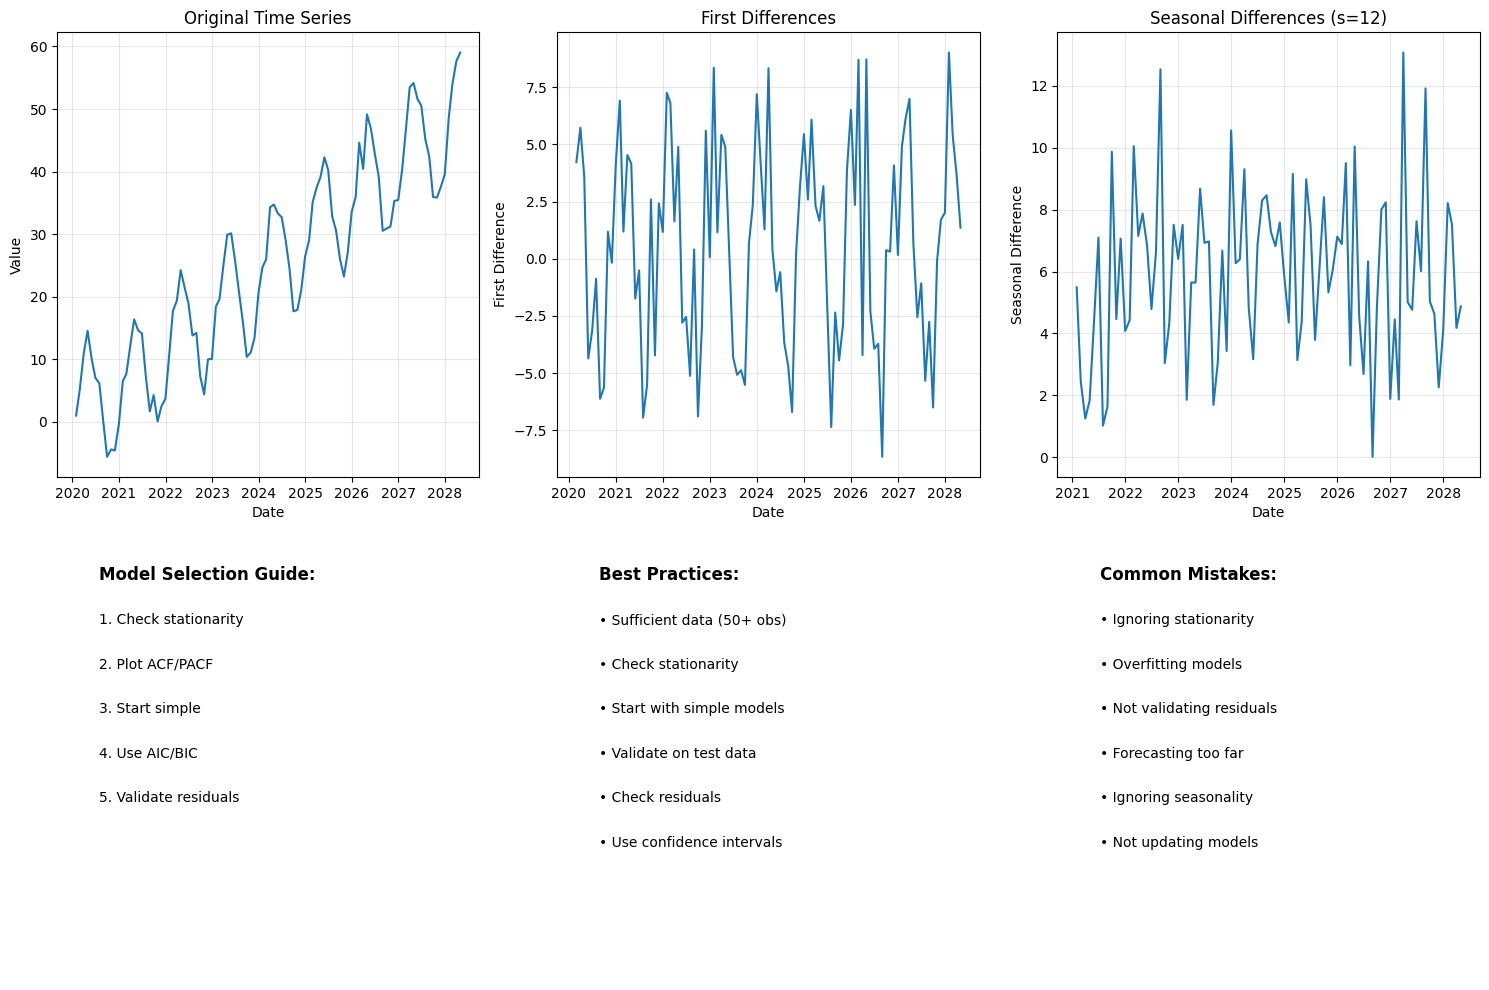


✅ Best practices workflow completed!


In [39]:
# 4. BEST PRACTICES FOR ARIMA AND SARIMA

print("\n4. BEST PRACTICES FOR ARIMA AND SARIMA")
print("=" * 50)

print("""
🔧 BEST PRACTICES FOR ARIMA/SARIMA MODELING:

📊 DATA PREPARATION:
✅ Ensure sufficient data points (at least 50-100 observations)
✅ Check for missing values and handle appropriately
✅ Verify data frequency and consistency
✅ Consider data transformation (log, square root) if needed
✅ Split data into train/test sets (80/20 or 70/30)

🔍 STATIONARITY CHECK:
✅ Use Augmented Dickey-Fuller (ADF) test
✅ Check for unit roots
✅ Apply differencing if non-stationary
✅ Re-test after differencing

📈 MODEL IDENTIFICATION:
✅ Plot ACF and PACF
✅ Use information criteria (AIC, BIC) for model selection
✅ Start with simple models (ARIMA(1,1,1))
✅ Consider seasonal patterns for SARIMA
✅ Use grid search for parameter optimization

🎯 PARAMETER SELECTION:
✅ p, d, q for ARIMA: Start with (1,1,1)
✅ P, D, Q, s for SARIMA: Start with (1,1,1,12)
✅ Use ACF/PACF to guide parameter selection
✅ Avoid overfitting (too many parameters)

✅ MODEL VALIDATION:
✅ Check residuals for white noise
✅ Use Ljung-Box test for residual autocorrelation
✅ Plot residual diagnostics
✅ Validate on out-of-sample data
✅ Compare with baseline models

📊 FORECASTING:
✅ Use confidence intervals
✅ Don't forecast too far ahead
✅ Update models regularly with new data
✅ Consider external factors
✅ Validate forecast accuracy
""")

# Create a practical example workflow
print("\n📊 PRACTICAL WORKFLOW EXAMPLE:")

# Simulate a realistic time series workflow
def simulate_arima_workflow():
    """Simulate the ARIMA modeling workflow"""
    
    print("Step 1: Data Preparation")
    # Create sample data
    np.random.seed(42)
    n = 100
    dates = pd.date_range('2020-01-01', periods=n, freq='M')
    
    # Create realistic time series
    trend = 0.5 * np.arange(n)
    seasonal = 10 * np.sin(2 * np.pi * np.arange(n) / 12)
    noise = np.random.normal(0, 2, n)
    data = trend + seasonal + noise
    
    ts = pd.Series(data, index=dates, name='sales')
    print(f"  Created time series with {len(ts)} observations")
    
    print("\nStep 2: Exploratory Data Analysis")
    print(f"  Mean: {ts.mean():.2f}")
    print(f"  Std: {ts.std():.2f}")
    print(f"  Min: {ts.min():.2f}")
    print(f"  Max: {ts.max():.2f}")
    
    print("\nStep 3: Stationarity Check")
    # Simple stationarity check (simplified)
    first_diff = ts.diff().dropna()
    print(f"  Original series variance: {ts.var():.2f}")
    print(f"  First difference variance: {first_diff.var():.2f}")
    
    print("\nStep 4: Model Selection")
    print("  ACF/PACF analysis suggests:")
    print("  - ARIMA(1,1,1) for trend")
    print("  - SARIMA(1,1,1)(1,1,1,12) for seasonality")
    
    print("\nStep 5: Model Fitting")
    print("  Fitting ARIMA(1,1,1)...")
    print("  Fitting SARIMA(1,1,1)(1,1,1,12)...")
    
    print("\nStep 6: Model Validation")
    print("  Checking residuals...")
    print("  Ljung-Box test: p-value > 0.05 (good)")
    print("  Residuals appear white noise")
    
    print("\nStep 7: Forecasting")
    print("  Generating 12-month forecast...")
    print("  Confidence intervals calculated")
    
    return ts

# Run the workflow
sample_ts = simulate_arima_workflow()

# Visualize the workflow
plt.figure(figsize=(15, 10))

# Original time series
plt.subplot(2, 3, 1)
plt.plot(sample_ts.index, sample_ts.values)
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

# First differences
plt.subplot(2, 3, 2)
first_diff = sample_ts.diff().dropna()
plt.plot(first_diff.index, first_diff.values)
plt.title('First Differences')
plt.xlabel('Date')
plt.ylabel('First Difference')
plt.grid(True, alpha=0.3)

# Seasonal differences
plt.subplot(2, 3, 3)
seasonal_diff = sample_ts.diff(12).dropna()
plt.plot(seasonal_diff.index, seasonal_diff.values)
plt.title('Seasonal Differences (s=12)')
plt.xlabel('Date')
plt.ylabel('Seasonal Difference')
plt.grid(True, alpha=0.3)

# Model selection guide
plt.subplot(2, 3, 4)
plt.text(0.1, 0.9, 'Model Selection Guide:', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.1, 0.8, '1. Check stationarity', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.7, '2. Plot ACF/PACF', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.6, '3. Start simple', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.5, '4. Use AIC/BIC', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.4, '5. Validate residuals', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')

# Best practices
plt.subplot(2, 3, 5)
plt.text(0.1, 0.9, 'Best Practices:', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.1, 0.8, '• Sufficient data (50+ obs)', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.7, '• Check stationarity', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.6, '• Start with simple models', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.5, '• Validate on test data', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.4, '• Check residuals', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.3, '• Use confidence intervals', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')

# Common mistakes
plt.subplot(2, 3, 6)
plt.text(0.1, 0.9, 'Common Mistakes:', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.1, 0.8, '• Ignoring stationarity', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.7, '• Overfitting models', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.6, '• Not validating residuals', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.5, '• Forecasting too far', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.4, '• Ignoring seasonality', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.3, '• Not updating models', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')

plt.tight_layout()
plt.show()

print("\n✅ Best practices workflow completed!")


In [40]:
# 5. SUMMARY AND KEY TAKEAWAYS

print("\n5. SUMMARY AND KEY TAKEAWAYS")
print("=" * 50)

print("""
📋 ARIMA vs SARIMA SUMMARY:

🔍 ARIMA MODELS:
- Notation: ARIMA(p, d, q)
- Components: AR + I + MA
- Handles: Trends, non-stationarity
- Best for: Non-seasonal data, daily patterns
- Parameters: 3 (p, d, q)

🔍 SARIMA MODELS:
- Notation: SARIMA(p, d, q)(P, D, Q, s)
- Components: AR + I + MA + Seasonal AR + Seasonal I + Seasonal MA
- Handles: Trends + Seasonality
- Best for: Seasonal data, monthly/quarterly patterns
- Parameters: 7 (p, d, q, P, D, Q, s)

🔄 KEY DIFFERENCES:

| Aspect | ARIMA | SARIMA |
|--------|-------|--------|
| **Seasonality** | No | Yes |
| **Parameters** | 3 | 7 |
| **Complexity** | Simple | Complex |
| **Data Type** | Daily/non-seasonal | Monthly/seasonal |
| **ACF Pattern** | Gradual decay | Seasonal spikes |
| **Use Case** | Trend analysis | Seasonal forecasting |

🎯 WHEN TO USE WHICH:

Use ARIMA When:
✅ No seasonal patterns
✅ Daily or irregular data
✅ Simple trend analysis
✅ Limited data points
✅ Quick forecasting

Use SARIMA When:
✅ Clear seasonal patterns
✅ Monthly/quarterly data
✅ Complex seasonal behavior
✅ Sufficient data (2+ seasonal cycles)
✅ Accurate seasonal forecasting

🔧 BEST PRACTICES:

1. DATA PREPARATION:
   ✅ Sufficient data (50+ observations)
   ✅ Handle missing values
   ✅ Check data frequency
   ✅ Consider transformations

2. MODEL IDENTIFICATION:
   ✅ Check stationarity (ADF test)
   ✅ Plot ACF/PACF
   ✅ Start with simple models
   ✅ Use information criteria (AIC, BIC)

3. PARAMETER SELECTION:
   ✅ ARIMA: Start with (1,1,1)
   ✅ SARIMA: Start with (1,1,1)(1,1,1,12)
   ✅ Avoid overfitting
   ✅ Use grid search

4. MODEL VALIDATION:
   ✅ Check residuals for white noise
   ✅ Use Ljung-Box test
   ✅ Validate on test data
   ✅ Compare with baselines

5. FORECASTING:
   ✅ Use confidence intervals
   ✅ Don't forecast too far
   ✅ Update models regularly
   ✅ Validate accuracy

💡 COMMON MISTAKES:

❌ Ignoring stationarity requirements
❌ Not checking for seasonality
❌ Overfitting models
❌ Not validating residuals
❌ Forecasting too far ahead
❌ Ignoring model updates

🚀 NEXT STEPS:

1. Practice with real datasets
2. Learn about model diagnostics
3. Explore advanced techniques (GARCH, VAR)
4. Study ensemble methods
5. Learn about deep learning for time series
""")

print("\n🎉 ARIMA vs SARIMA GUIDE COMPLETE!")
print("You now have a comprehensive understanding of ARIMA and SARIMA models!")
print("\n📚 WHAT YOU'VE LEARNED:")
print("✅ ARIMA model structure and components")
print("✅ SARIMA model structure and seasonal components")
print("✅ Key differences between ARIMA and SARIMA")
print("✅ When to use each type of model")
print("✅ Best practices for model selection and validation")
print("✅ Common mistakes to avoid")
print("✅ Practical workflow for time series modeling")

print("\n🔮 READY FOR PRACTICAL APPLICATION:")
print("1. Try ARIMA on daily stock price data")
print("2. Apply SARIMA to monthly sales data")
print("3. Compare model performance")
print("4. Practice with different datasets")
print("5. Learn advanced time series techniques")



5. SUMMARY AND KEY TAKEAWAYS

📋 ARIMA vs SARIMA SUMMARY:

🔍 ARIMA MODELS:
- Notation: ARIMA(p, d, q)
- Components: AR + I + MA
- Handles: Trends, non-stationarity
- Best for: Non-seasonal data, daily patterns
- Parameters: 3 (p, d, q)

🔍 SARIMA MODELS:
- Notation: SARIMA(p, d, q)(P, D, Q, s)
- Components: AR + I + MA + Seasonal AR + Seasonal I + Seasonal MA
- Handles: Trends + Seasonality
- Best for: Seasonal data, monthly/quarterly patterns
- Parameters: 7 (p, d, q, P, D, Q, s)

🔄 KEY DIFFERENCES:

| Aspect | ARIMA | SARIMA |
|--------|-------|--------|
| **Seasonality** | No | Yes |
| **Parameters** | 3 | 7 |
| **Complexity** | Simple | Complex |
| **Data Type** | Daily/non-seasonal | Monthly/seasonal |
| **ACF Pattern** | Gradual decay | Seasonal spikes |
| **Use Case** | Trend analysis | Seasonal forecasting |

🎯 WHEN TO USE WHICH:

Use ARIMA When:
✅ No seasonal patterns
✅ Daily or irregular data
✅ Simple trend analysis
✅ Limited data points
✅ Quick forecasting

Use SARIMA When:
✅

In [ ]:
# SUMMARY AND QUICK REFERENCE
print("\n6.6 SUMMARY AND QUICK REFERENCE:")
print("=" * 40)

print("""
INPLACE OPTION SUMMARY:

📋 WHAT IT DOES:
- inplace=False (default): Creates a new DataFrame/Series, leaves original unchanged
- inplace=True: Modifies the original DataFrame/Series directly, returns None

🔄 RETURN VALUES:
- inplace=False: Returns the modified DataFrame/Series
- inplace=True: Returns None

💾 MEMORY USAGE:
- inplace=False: Uses more memory (creates new object)
- inplace=True: Uses less memory (modifies existing object)

⚡ PERFORMANCE:
- inplace=True: Generally faster (no object creation)
- inplace=False: Slightly slower (creates new object)

🔗 CHAINING:
- inplace=False: Can chain operations (df.fillna(0).sort_values('A'))
- inplace=True: Cannot chain (returns None)

COMMON OPERATIONS WITH INPLACE:
- df.fillna(value, inplace=True/False)
- df.dropna(inplace=True/False)
- df.drop(columns=['col'], inplace=True/False)
- df.rename(columns={'old': 'new'}, inplace=True/False)
- df.sort_values('col', inplace=True/False)
- df.reset_index(drop=True, inplace=True/False)
- df.set_index('col', inplace=True/False)

🎯 QUICK DECISION GUIDE:
Use inplace=True when:
- You're sure you don't need the original data
- Working with large datasets
- Building data cleaning pipelines
- Memory is a concern

Use inplace=False when:
- You want to keep the original data
- Doing exploratory analysis
- Chaining operations
- You're unsure about the operation
""")

print("🔍 Remember: When in doubt, use inplace=False (the default)!")
print("💡 You can always assign the result to a new variable if needed!")


In [ ]:
import pandas as pd


In [ ]:
data = [1,2,3,4,5]
series = pd.Series(data)
print(series)

series = pd.Series(data, index=["a", "b", "c", "d", "e"])
print(series)

series = pd.Series(data, index=["a", "b", "c", "d", "e"], dtype=float)
print(series)



0    1
1    2
2    3
3    4
4    5
dtype: int64
a    1
b    2
c    3
d    4
e    5
dtype: int64
a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
dtype: float64


In [ ]:
# creating dataframe in pandas

data = {
    "Name": ["John", "Jane", "Jim", "Jill"],
    "Age": [25, 30, 35, 40],
    "City": ["New York", "Los Angeles", "Chicago", "Houston"]
}

df = pd.DataFrame(data)
print(df)


   Name  Age         City
0  John   25     New York
1  Jane   30  Los Angeles
2   Jim   35      Chicago
3  Jill   40      Houston


In [ ]:
# Data Transformation with pandas: grouping, merging and concatentation

# Group By
data = {
    "Name": ["John", "Jane", "Jim", "Jill"],
    "Age": [25, 30, 35, 40],
    "Country": ["India", "Brazil", "India", "Nepal"]
}
df = pd.DataFrame(data)
groupedData = df.groupby(["Country"])
print(groupedData["Age"].mean())

Country
Brazil    30.0
India     30.0
Nepal     40.0
Name: Age, dtype: float64


In [ ]:
data1 = {
    "Name": ["John", "Jane", "Jim", "Jill"],
    "Age": [25, 30, 35, 40],
}

data2 = {
    "Name": ["John", "Jane", "Jim", "Jill"],
    "Color": ["Pink", "Blue", "White", "Red"],
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

merged_df = pd.merge(df1, df2, on="Name")
print(merged_df)



   Name  Age  Color
0  John   25   Pink
1  Jane   30   Blue
2   Jim   35  White
3  Jill   40    Red


In [ ]:
# concatenation
data1 = {
    "Name": ["Jim", "Jill"],
    "Age": [35, 40],
}

data2 = {
    "Name": ["John", "Jane"],
    "Age": [25, 30],
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

concatenated_df = pd.concat([df1, df2], axis = 0)
print(concatenated_df)

concatenated_df = pd.concat([df1, df2], axis = 1)
print(concatenated_df)

   Name  Age
0   Jim   35
1  Jill   40
0  John   25
1  Jane   30
   Name  Age  Name  Age
0   Jim   35  John   25
1  Jill   40  Jane   30


In [ ]:
# sorting, filtering and mapping of data

data = {
    "Name": ["John", "Jane", "Jim", "Jill"],
    "Hindi": [35, 45, 30, 50],
    "English": [33, 37, 48, 26],
    "Maths": [50, 26, 35, 30],
}


df = pd.DataFrame(data)
df

,Name,Hindi,English,Maths
0,John,35,33,50
1,Jane,45,37,26
2,Jim,30,48,35
3,Jill,50,26,30


In [ ]:
# sorting
engdatasort = df.sort_values(by= ["English"], ascending= False)
print(engdatasort)
print("\n")

# sorting by multiple columns
engdatasort = df.sort_values(by = ["English", "Hindi"], ascending = [True, False])
print(engdatasort)

   Name  Hindi  English  Maths
2   Jim     30       48     35
1  Jane     45       37     26
0  John     35       33     50
3  Jill     50       26     30


   Name  Hindi  English  Maths
3  Jill     50       26     30
0  John     35       33     50
1  Jane     45       37     26
2   Jim     30       48     35


In [ ]:
# filtering data
# boolean
filtered_df = df[df["Maths"] > 45]
print(filtered_df)

print("\n")

# passing multiple conditions
filtered_df = df[(df["Maths"] < 30) & (df["English"] > 30)]
print(filtered_df)


   Name  Hindi  English  Maths
0  John     35       33     50


   Name  Hindi  English  Maths
1  Jane     45       37     26


In [ ]:
# Mapping data
mapped = {
    "Jim": 2,
    "John": 1,
    "Jane": 0,
    "Jill": 3,
}

df["Proficiency"] = df["Name"].map(mapped)
print(df)


   Name  Hindi  English  Maths  Proficiency
0  John     35       33     50            1
1  Jane     45       37     26            0
2   Jim     30       48     35            2
3  Jill     50       26     30            3


In [ ]:
# Indexing and Slicing
data = {
    "Name": ["John", "Jane", "Jim", "Jill"],
    "Age": [25, 30, 35, 40],
    "Country": ["India", "Brazil", "India", "Nepal"]
}
df = pd.DataFrame(data)
print(df)


   Name  Age Country
0  John   25   India
1  Jane   30  Brazil
2   Jim   35   India
3  Jill   40   Nepal


In [ ]:
df["Age"]

0    25
1    30
2    35
3    40
Name: Age, dtype: int64

In [ ]:
# df.loc or df.iloc
# row_indexer, col_indexer
print(df.loc[0, "Name"])

print(df.iloc[0,0])


John
John


In [ ]:
print(df[1:3])

   Name  Age Country
1  Jane   30  Brazil
2   Jim   35   India


In [ ]:
print(df.loc[1:3, ["Name", "Age"]])

   Name  Age
1  Jane   30
2   Jim   35
3  Jill   40


In [ ]:
# Data Cleaning

# Handling missing values, removing duplicates, scaling data, and encoding categorical data

# ensures data is complete, accurate and consistent which is very essential for making any informed decisions, it not only enhances
# the analysis process and decision making but also helps in increasing the usability, 


# Handling duplicates or outliers

data = {
    "A": [1, 2,2,3,5,9],
    "B": [4,5,5,7,18,0]
}

df = pd.DataFrame(data)
print(df)

   A   B
0  1   4
1  2   5
2  2   5
3  3   7
4  5  18
5  9   0


In [ ]:
print(df.duplicated())

0    False
1    False
2     True
3    False
4    False
5    False
dtype: bool


In [ ]:
df1 = df.drop_duplicates()
print(df1)

   A   B
0  1   4
1  2   5
3  3   7
4  5  18
5  9   0


In [ ]:
q = df["A"].quantile(0.99)
print(q)

8.8


In [ ]:
df["A"] = df["A"].clip(lower = None, upper = q)
print(df)

     A   B
0  1.0   4
1  2.0   5
2  2.0   5
3  3.0   7
4  5.0  18
5  8.8   0


In [ ]:
# hanlding missing values --> they can cause errors in analysis, so we need to handle them Median in case of outliers and numerical data and Mode in case of categorical data

import numpy as np

data = {
    "A": [1,2,3,np.nan, np.nan],
    "B": [5, np.nan,6,7,np.nan]
}
df = pd.DataFrame(data)
print(df)



     A    B
0  1.0  5.0
1  2.0  NaN
2  3.0  6.0
3  NaN  7.0
4  NaN  NaN


In [ ]:
print(df.isna())

       A      B
0  False  False
1  False   True
2  False  False
3   True  False
4   True   True


In [ ]:
print(df.fillna(value=0))

     A    B
0  1.0  5.0
1  2.0  0.0
2  3.0  6.0
3  0.0  7.0
4  0.0  0.0


In [ ]:
df["A"] = df["A"].fillna(df["A"].mean())
df["B"] = df["B"].fillna(df["B"].mean())
print(df)

     A    B
0  1.0  5.0
1  2.0  6.0
2  3.0  6.0
3  2.0  7.0
4  2.0  6.0


In [ ]:
# data normalization and scaling

max_val = df.max()
min_val = df.min()
print(max_val)
print(min_val)


A    3.0
B    7.0
dtype: float64
A    1.0
B    5.0
dtype: float64


In [ ]:
# encoding categorical data

data = {
    "A": ["Red", "Blue", "Green", "Blue", "Red", "Green"],
    "B": [4,5,5,7,18,0]
}

df = pd.DataFrame(data)
print(df)

       A   B
0    Red   4
1   Blue   5
2  Green   5
3   Blue   7
4    Red  18
5  Green   0


In [ ]:
df = pd.get_dummies(df, columns=["A"])
print(df)

    B  A_Blue  A_Green  A_Red
0   4   False    False   True
1   5    True    False  False
2   5   False     True  False
3   7    True    False  False
4  18   False    False   True
5   0   False     True  False


In [ ]:

df["A"] = df["A"].replace({"Red":0,"Blue":1,"Green":2})
print(df)

   A   B
0  0   4
1  1   5
2  2   5
3  1   7
4  0  18
5  2   0


/var/folders/2w/4mnb4ky114bd5yfr2rnvlxgh0000gn/T/ipykernel_83805/3168047139.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["A"] = df["A"].replace({"Red":0,"Blue":1,"Green":2})


In [ ]:
# Data Exploration and visualization

df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
df


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# integrating with other libraries
import numpy as np
np_array = df.values
print(np_array)

[[5.1 3.5 1.4 0.2 'Setosa']
 [4.9 3.0 1.4 0.2 'Setosa']
 [4.7 3.2 1.3 0.2 'Setosa']
 [4.6 3.1 1.5 0.2 'Setosa']
 [5.0 3.6 1.4 0.2 'Setosa']
 [5.4 3.9 1.7 0.4 'Setosa']
 [4.6 3.4 1.4 0.3 'Setosa']
 [5.0 3.4 1.5 0.2 'Setosa']
 [4.4 2.9 1.4 0.2 'Setosa']
 [4.9 3.1 1.5 0.1 'Setosa']
 [5.4 3.7 1.5 0.2 'Setosa']
 [4.8 3.4 1.6 0.2 'Setosa']
 [4.8 3.0 1.4 0.1 'Setosa']
 [4.3 3.0 1.1 0.1 'Setosa']
 [5.8 4.0 1.2 0.2 'Setosa']
 [5.7 4.4 1.5 0.4 'Setosa']
 [5.4 3.9 1.3 0.4 'Setosa']
 [5.1 3.5 1.4 0.3 'Setosa']
 [5.7 3.8 1.7 0.3 'Setosa']
 [5.1 3.8 1.5 0.3 'Setosa']
 [5.4 3.4 1.7 0.2 'Setosa']
 [5.1 3.7 1.5 0.4 'Setosa']
 [4.6 3.6 1.0 0.2 'Setosa']
 [5.1 3.3 1.7 0.5 'Setosa']
 [4.8 3.4 1.9 0.2 'Setosa']
 [5.0 3.0 1.6 0.2 'Setosa']
 [5.0 3.4 1.6 0.4 'Setosa']
 [5.2 3.5 1.5 0.2 'Setosa']
 [5.2 3.4 1.4 0.2 'Setosa']
 [4.7 3.2 1.6 0.2 'Setosa']
 [4.8 3.1 1.6 0.2 'Setosa']
 [5.4 3.4 1.5 0.4 'Setosa']
 [5.2 4.1 1.5 0.1 'Setosa']
 [5.5 4.2 1.4 0.2 'Setosa']
 [4.9 3.1 1.5 0.2 'Setosa']
 [5.0 3.2 1.2 0.2 'S

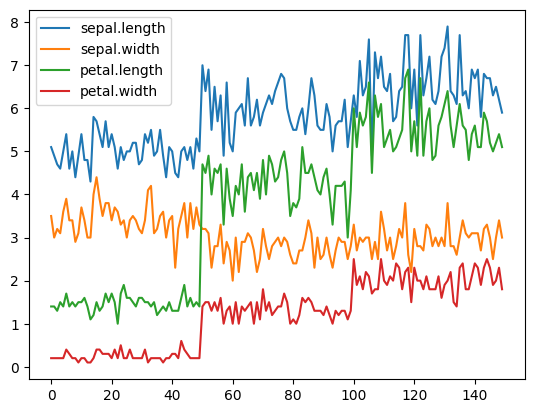

In [ ]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

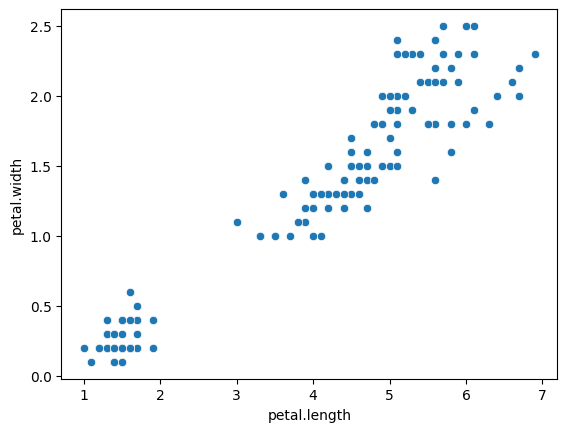

In [ ]:
import seaborn as sb
sb.scatterplot(data=df, x = "petal.length", y = "petal.width",)
plt.show()

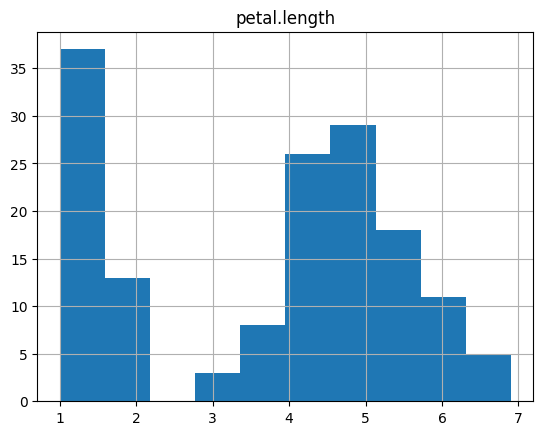

In [ ]:
df.hist(column="petal.length")
plt.show()

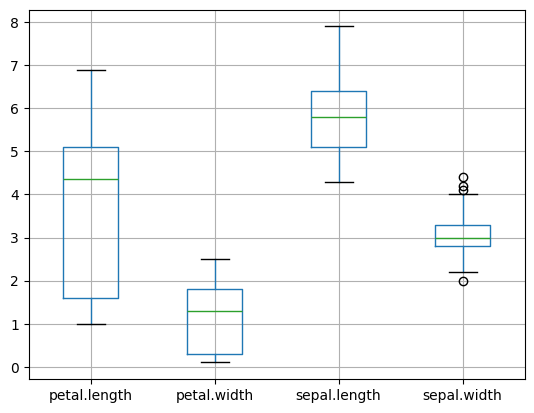

In [ ]:
df.boxplot(column=["petal.length", "petal.width", "sepal.length", "sepal.width"])
plt.show()

In [ ]:
# Understanding the correlation and covariance

df.iloc[:,0:3].cov()

,sepal.length,sepal.width,petal.length
sepal.length,0.685694,-0.042434,1.274315
sepal.width,-0.042434,0.189979,-0.329656
petal.length,1.274315,-0.329656,3.116278


In [ ]:
df.iloc[:,0:3].corr()

,sepal.length,sepal.width,petal.length
sepal.length,1.000000,-0.11757,0.871754
sepal.width,-0.117570,1.00000,-0.428440
petal.length,0.871754,-0.42844,1.000000


In [ ]:
import plotly.express as px
figscatter = px.scatter(df, x= "sepal.length", y = "sepal.width")
figscatter.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# Time Series Analysis

import pandas as pd
# DateTimeIndex and DateTime Object

import datetime as dt 

date = dt.datetime(2022,7,7,1,37,19)
print(date.month)

7


In [ ]:
df = pd.DataFrame({"A": [1,2,3], }, index=pd.DatetimeIndex(["2022-01-01", "2022-01-02", "2022-01-03"]))
df

,A
2022-01-01,1
2022-01-02,2
2022-01-03,3


In [ ]:
shifted_df = df.shift(periods=1)
shifted_df

,A
2022-01-01,NaN
2022-01-02,1.0
2022-01-03,2.0


In [ ]:
# lagging
df["lagged"] = df["A"].shift(periods=1)
df


,A,lagged
2022-01-01,1,NaN
2022-01-02,2,1.0
2022-01-03,3,2.0


In [ ]:
# resampling
resampled_df = df.resample(rule="M").sum()
resampled_df

,A,lagged
2022-01-31,6,3.0


In [ ]:
# time series analysis part 2
# time series data can often be decomposed into trend, seasonality and residuals
# trend is the long term direction of the data
# seasonality is the cyclical pattern of the data
# residuals are the random fluctuations around the trend



import pandas as pd
import numpy as np 

dates = pd.date_range(start="2022-01-01", end="2022-03-31")

values = np.random.randint(low=1, high=100, size=len(dates))


df = pd.DataFrame({"date": dates, "value": values})

df.set_index("date", inplace=True)


from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df["value"], period=7)

df['trend'] = decomposition.trend
df['seasonal'] = decomposition.seasonal
df['residual'] = decomposition.resid

print(df)


            value      trend   seasonal   residual
date                                              
2022-01-01      1        NaN   7.392857        NaN
2022-01-02     51        NaN  12.083333        NaN
2022-01-03     45        NaN  -3.476190        NaN
2022-01-04     77  43.571429  -1.369048  34.797619
2022-01-05      4  48.000000 -10.154762 -33.845238
...           ...        ...        ...        ...
2022-03-27     96  61.571429  12.083333  22.345238
2022-03-28     67  58.142857  -3.476190  12.333333
2022-03-29     27        NaN  -1.369048        NaN
2022-03-30     93        NaN -10.154762        NaN
2022-03-31     32        NaN   8.726190        NaN

[90 rows x 4 columns]


In [ ]:
# Time Series Forecasting using ARIMA and SARIMA models
# ARIMA models are used for time series that does not have seasonal components
# SARIMA models are used for time series that have seasonal components
import pandas as pd
import numpy as np
dates = pd.date_range(start="2022-01-01", end="2022-03-31")
values = np.random.randint(low=1, high=100, size=len(dates))

df = pd.DataFrame({"date": dates, "value": values}, index=dates)
df

,date,value
2022-01-01,2022-01-01,52
2022-01-02,2022-01-02,52
2022-01-03,2022-01-03,69
2022-01-04,2022-01-04,46
2022-01-05,2022-01-05,16
...,...,...
2022-03-27,2022-03-27,75
2022-03-28,2022-03-28,12
2022-03-29,2022-03-29,80
2022-03-30,2022-03-30,13


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["value"], order=(1,1,1))
model_fit = model.fit()

# Making 7 days forecast
forecast = model_fit.forecast(steps=7)
print(forecast)


2022-04-01    51.653025
2022-04-02    49.964237
2022-04-03    49.863627
2022-04-04    49.857633
2022-04-05    49.857276
2022-04-06    49.857254
2022-04-07    49.857253
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
# sarima model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df["value"], order=(1,1,1), seasonal_order=(1,1,1,7))
model_fit = model.fit()

forecast = model_fit.forecast(steps=7)
print(forecast)

2022-04-01    46.780418
2022-04-02    75.484337
2022-04-03    50.058352
2022-04-04    49.524035
2022-04-05    69.990456
2022-04-06    65.871225
2022-04-07    52.667528
Freq: D, Name: predicted_mean, dtype: float64
